In [1]:
from circle_utils import *
import numpy as np
import torch

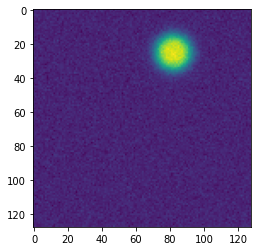

In [2]:
img1,img2,seg1,seg2 = generate_train_pair()
plt.imshow(img1)

In [7]:
alphas = [0.0005]
batch_sizes = [16]
iterations = 51200
vol_size=[128,128]

def run_gridsearch(mod_name, vol_s, nf_e, nf_d, alpha_list, batch_list, num_iters, conv_num=None, super_size=0, save_models=False):
    train_datas = []
    val_datas = []
    names = []
    for bs in batch_sizes:
        for al in alphas:
            if "sln" in mod_name:
                model = sln_cvpr2018_net(vol_s, nf_e, nf_d, superblock_size=super_size)
            elif "ae" in mod_name:
                model = sln_cvpr2018_net(vol_s, nf_e, nf_d, superblock_size=super_size, mode='ae')
            else:
                model = cvpr2018_net(vol_s, nf_e, nf_d, conv_num=conv_num, full_size=False)
            
            train_dice, val_dice = circle_train(mod=model,lr=al,n_iter=num_iters,batch_size=bs)
            train_datas.append(train_dice)
            val_datas.append(val_dice)
            
            name = mod_name + ",bs:" + str(bs) + ",al:" + str(al)
            
            if save_models: 
                torch.save(model.state_dict(), "saved_models/" + name)
                
            names.append(name)
    return train_datas, val_datas, names

In [3]:
nf_enc = [128, 128, 128]
nf_dec = [128, 128, 128]

train_datas1, val_datas1, names1 = run_gridsearch(mod_name="sln2d2u",
                                                   vol_s=vol_size, 
                                                   nf_e=nf_enc, 
                                                   nf_d=nf_dec,
                                                   alpha_list=alphas, 
                                                   batch_list=batch_sizes, 
                                                   num_iters=iterations,
                                                   super_size=256,
                                                   save_models=True)
np.save("griddata/sln2d2u-train-bs32",train_datas1)
np.save("griddata/sln2d2u-val-bs32",val_datas1)
np.save("griddata/sln2d2u-names-bs32",names1)

Train Epoch: 0 | Loss: 0.028406 | Reconstruction Loss: 0.028406 | Dice Score: 0.992804
Val Epoch: 0 | Dice Score: 0.999901


/nfs02/users/vib9/anaconda3/envs/sln/lib/python3.6/site-packages/torch/nn/functional.py:3226: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


Val Epoch: 1 | Dice Score: 0.999901
Val Epoch: 2 | Dice Score: 0.999901
Val Epoch: 3 | Dice Score: 0.999901
Val Epoch: 4 | Dice Score: 0.999901
Val Epoch: 5 | Dice Score: 0.999901
Val Epoch: 6 | Dice Score: 0.999901
Val Epoch: 7 | Dice Score: 0.999901
Val Epoch: 8 | Dice Score: 0.999901
Val Epoch: 9 | Dice Score: 0.999901
Val Epoch: 10 | Dice Score: 0.999901
Val Epoch: 11 | Dice Score: 0.999901
Val Epoch: 12 | Dice Score: 0.999901
Val Epoch: 13 | Dice Score: 0.999901
Val Epoch: 14 | Dice Score: 0.999901
Val Epoch: 15 | Dice Score: 0.999901
Val Epoch: 16 | Dice Score: 0.999901
Val Epoch: 17 | Dice Score: 0.999901
Val Epoch: 18 | Dice Score: 0.999901
Val Epoch: 19 | Dice Score: 0.999901
Val Epoch: 20 | Dice Score: 0.999901
Val Epoch: 21 | Dice Score: 0.999901
Val Epoch: 22 | Dice Score: 0.999901
Val Epoch: 23 | Dice Score: 0.999901
Val Epoch: 24 | Dice Score: 0.999901
Val Epoch: 25 | Dice Score: 0.999901
Val Epoch: 26 | Dice Score: 0.999901
Val Epoch: 27 | Dice Score: 0.999901
Val Epoch:

Train Epoch: 68 | Loss: 0.015385 | Reconstruction Loss: 0.014967 | Dice Score: 0.939311
Train Epoch: 69 | Loss: 0.015329 | Reconstruction Loss: 0.014955 | Dice Score: 0.932632
Train Epoch: 70 | Loss: 0.016104 | Reconstruction Loss: 0.015741 | Dice Score: 0.999810
Train Epoch: 71 | Loss: 0.015864 | Reconstruction Loss: 0.015505 | Dice Score: 0.997916
Train Epoch: 72 | Loss: 0.015163 | Reconstruction Loss: 0.014784 | Dice Score: 0.919205
Train Epoch: 73 | Loss: 0.014941 | Reconstruction Loss: 0.014533 | Dice Score: 0.909622
Train Epoch: 74 | Loss: 0.015224 | Reconstruction Loss: 0.014809 | Dice Score: 0.926503
Train Epoch: 75 | Loss: 0.014761 | Reconstruction Loss: 0.014381 | Dice Score: 0.930465
Train Epoch: 76 | Loss: 0.015164 | Reconstruction Loss: 0.014809 | Dice Score: 0.936540
Train Epoch: 77 | Loss: 0.016083 | Reconstruction Loss: 0.015735 | Dice Score: 0.999811
Train Epoch: 78 | Loss: 0.014610 | Reconstruction Loss: 0.014307 | Dice Score: 0.874127
Train Epoch: 79 | Loss: 0.014636

Train Epoch: 148 | Loss: 0.015061 | Reconstruction Loss: 0.014591 | Dice Score: 0.902470
Train Epoch: 149 | Loss: 0.014361 | Reconstruction Loss: 0.013874 | Dice Score: 0.841891
Train Epoch: 150 | Loss: 0.015146 | Reconstruction Loss: 0.014617 | Dice Score: 0.932352
Train Epoch: 151 | Loss: 0.014953 | Reconstruction Loss: 0.014395 | Dice Score: 0.914913
Train Epoch: 152 | Loss: 0.015637 | Reconstruction Loss: 0.015074 | Dice Score: 0.960068
Train Epoch: 153 | Loss: 0.015689 | Reconstruction Loss: 0.015161 | Dice Score: 0.978845
Train Epoch: 154 | Loss: 0.013964 | Reconstruction Loss: 0.013470 | Dice Score: 0.812941
Train Epoch: 155 | Loss: 0.014951 | Reconstruction Loss: 0.014444 | Dice Score: 0.873950
Train Epoch: 156 | Loss: 0.012964 | Reconstruction Loss: 0.012454 | Dice Score: 0.687300
Train Epoch: 157 | Loss: 0.014470 | Reconstruction Loss: 0.013971 | Dice Score: 0.852619
Train Epoch: 158 | Loss: 0.015638 | Reconstruction Loss: 0.015119 | Dice Score: 0.989754
Train Epoch: 159 | Lo

Train Epoch: 227 | Loss: 0.014392 | Reconstruction Loss: 0.013822 | Dice Score: 0.802986
Train Epoch: 228 | Loss: 0.012040 | Reconstruction Loss: 0.011464 | Dice Score: 0.581927
Train Epoch: 229 | Loss: 0.012384 | Reconstruction Loss: 0.011799 | Dice Score: 0.624773
Train Epoch: 230 | Loss: 0.013323 | Reconstruction Loss: 0.012864 | Dice Score: 0.700303
Train Epoch: 231 | Loss: 0.011198 | Reconstruction Loss: 0.010680 | Dice Score: 0.516147
Train Epoch: 232 | Loss: 0.012538 | Reconstruction Loss: 0.011938 | Dice Score: 0.632975
Train Epoch: 233 | Loss: 0.014622 | Reconstruction Loss: 0.014147 | Dice Score: 0.840984
Train Epoch: 234 | Loss: 0.014218 | Reconstruction Loss: 0.013767 | Dice Score: 0.792838
Train Epoch: 235 | Loss: 0.014502 | Reconstruction Loss: 0.013993 | Dice Score: 0.841720
Train Epoch: 236 | Loss: 0.012597 | Reconstruction Loss: 0.012020 | Dice Score: 0.654574
Train Epoch: 237 | Loss: 0.012377 | Reconstruction Loss: 0.011819 | Dice Score: 0.633174
Train Epoch: 238 | Lo

Train Epoch: 306 | Loss: 0.014118 | Reconstruction Loss: 0.013613 | Dice Score: 0.785899
Train Epoch: 307 | Loss: 0.008461 | Reconstruction Loss: 0.007864 | Dice Score: 0.337058
Train Epoch: 308 | Loss: 0.009215 | Reconstruction Loss: 0.008681 | Dice Score: 0.386978
Train Epoch: 309 | Loss: 0.011911 | Reconstruction Loss: 0.011336 | Dice Score: 0.545878
Train Epoch: 310 | Loss: 0.013964 | Reconstruction Loss: 0.013438 | Dice Score: 0.743721
Train Epoch: 311 | Loss: 0.013041 | Reconstruction Loss: 0.012551 | Dice Score: 0.662303
Train Epoch: 312 | Loss: 0.010602 | Reconstruction Loss: 0.009903 | Dice Score: 0.464221
Train Epoch: 313 | Loss: 0.010366 | Reconstruction Loss: 0.009512 | Dice Score: 0.433379
Train Epoch: 314 | Loss: 0.013499 | Reconstruction Loss: 0.012852 | Dice Score: 0.722595
Train Epoch: 315 | Loss: 0.012242 | Reconstruction Loss: 0.011558 | Dice Score: 0.610626
Train Epoch: 316 | Loss: 0.011573 | Reconstruction Loss: 0.010892 | Dice Score: 0.560928
Train Epoch: 317 | Lo

Val Epoch: 0 | Dice Score: 0.999804
Val Epoch: 1 | Dice Score: 0.999804
Val Epoch: 2 | Dice Score: 0.999804
Val Epoch: 3 | Dice Score: 0.999804
Val Epoch: 4 | Dice Score: 0.999804
Val Epoch: 5 | Dice Score: 0.999804
Val Epoch: 6 | Dice Score: 0.999804
Val Epoch: 7 | Dice Score: 0.999804
Val Epoch: 8 | Dice Score: 0.999804
Val Epoch: 9 | Dice Score: 0.999805
Val Epoch: 10 | Dice Score: 0.999805
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.999804
Val Epoch: 13 | Dice Score: 0.999804
Val Epoch: 14 | Dice Score: 0.999804
Val Epoch: 15 | Dice Score: 0.999804
Val Epoch: 16 | Dice Score: 0.999805
Val Epoch: 17 | Dice Score: 0.999804
Val Epoch: 18 | Dice Score: 0.999804
Val Epoch: 19 | Dice Score: 0.999804
Val Epoch: 20 | Dice Score: 0.999804
Val Epoch: 21 | Dice Score: 0.999804
Val Epoch: 22 | Dice Score: 0.999805
Val Epoch: 23 | Dice Score: 0.999805
Val Epoch: 24 | Dice Score: 0.999804
Val Epoch: 25 | Dice Score: 0.999804
Val Epoch: 26 | Dice Score: 0.999804
Val Epoch: 

Train Epoch: 451 | Loss: 0.007180 | Reconstruction Loss: 0.006319 | Dice Score: 0.254132
Train Epoch: 452 | Loss: 0.011550 | Reconstruction Loss: 0.010747 | Dice Score: 0.522754
Train Epoch: 453 | Loss: 0.010288 | Reconstruction Loss: 0.009722 | Dice Score: 0.459786
Train Epoch: 454 | Loss: 0.012073 | Reconstruction Loss: 0.011434 | Dice Score: 0.588964
Train Epoch: 455 | Loss: 0.011566 | Reconstruction Loss: 0.010823 | Dice Score: 0.545836
Train Epoch: 456 | Loss: 0.011685 | Reconstruction Loss: 0.010797 | Dice Score: 0.546716
Train Epoch: 457 | Loss: 0.011144 | Reconstruction Loss: 0.010277 | Dice Score: 0.488249
Train Epoch: 458 | Loss: 0.011698 | Reconstruction Loss: 0.011022 | Dice Score: 0.549650
Train Epoch: 459 | Loss: 0.006639 | Reconstruction Loss: 0.005926 | Dice Score: 0.247202
Train Epoch: 460 | Loss: 0.007805 | Reconstruction Loss: 0.007025 | Dice Score: 0.289857
Train Epoch: 461 | Loss: 0.013978 | Reconstruction Loss: 0.013121 | Dice Score: 0.759444
Train Epoch: 462 | Lo

Train Epoch: 530 | Loss: 0.009366 | Reconstruction Loss: 0.008567 | Dice Score: 0.367539
Train Epoch: 531 | Loss: 0.010487 | Reconstruction Loss: 0.009732 | Dice Score: 0.449933
Train Epoch: 532 | Loss: 0.008426 | Reconstruction Loss: 0.007693 | Dice Score: 0.395158
Train Epoch: 533 | Loss: 0.010312 | Reconstruction Loss: 0.009554 | Dice Score: 0.441694
Train Epoch: 534 | Loss: 0.013238 | Reconstruction Loss: 0.012415 | Dice Score: 0.657665
Train Epoch: 535 | Loss: 0.012375 | Reconstruction Loss: 0.011485 | Dice Score: 0.583485
Train Epoch: 536 | Loss: 0.009283 | Reconstruction Loss: 0.008411 | Dice Score: 0.379493
Train Epoch: 537 | Loss: 0.012270 | Reconstruction Loss: 0.011365 | Dice Score: 0.578382
Train Epoch: 538 | Loss: 0.012407 | Reconstruction Loss: 0.011517 | Dice Score: 0.596571
Train Epoch: 539 | Loss: 0.010303 | Reconstruction Loss: 0.009392 | Dice Score: 0.442169
Train Epoch: 540 | Loss: 0.010503 | Reconstruction Loss: 0.009805 | Dice Score: 0.463731
Train Epoch: 541 | Lo

Train Epoch: 609 | Loss: 0.012482 | Reconstruction Loss: 0.011231 | Dice Score: 0.573045
Train Epoch: 610 | Loss: 0.011584 | Reconstruction Loss: 0.010643 | Dice Score: 0.524348
Train Epoch: 611 | Loss: 0.009017 | Reconstruction Loss: 0.008208 | Dice Score: 0.348999
Train Epoch: 612 | Loss: 0.012738 | Reconstruction Loss: 0.012046 | Dice Score: 0.626433
Train Epoch: 613 | Loss: 0.010888 | Reconstruction Loss: 0.010287 | Dice Score: 0.518312
Train Epoch: 614 | Loss: 0.009942 | Reconstruction Loss: 0.009431 | Dice Score: 0.434353
Train Epoch: 615 | Loss: 0.009513 | Reconstruction Loss: 0.008995 | Dice Score: 0.404150
Train Epoch: 616 | Loss: 0.011208 | Reconstruction Loss: 0.010489 | Dice Score: 0.531718
Train Epoch: 617 | Loss: 0.010159 | Reconstruction Loss: 0.009336 | Dice Score: 0.428743
Train Epoch: 618 | Loss: 0.014621 | Reconstruction Loss: 0.013949 | Dice Score: 0.828405
Train Epoch: 619 | Loss: 0.012916 | Reconstruction Loss: 0.012171 | Dice Score: 0.628010
Train Epoch: 620 | Lo

Train Epoch: 688 | Loss: 0.009471 | Reconstruction Loss: 0.008586 | Dice Score: 0.370425
Train Epoch: 689 | Loss: 0.010509 | Reconstruction Loss: 0.009564 | Dice Score: 0.441509
Train Epoch: 690 | Loss: 0.009778 | Reconstruction Loss: 0.008930 | Dice Score: 0.420084
Train Epoch: 691 | Loss: 0.010275 | Reconstruction Loss: 0.009601 | Dice Score: 0.489802
Train Epoch: 692 | Loss: 0.010011 | Reconstruction Loss: 0.009264 | Dice Score: 0.410761
Train Epoch: 693 | Loss: 0.010305 | Reconstruction Loss: 0.009513 | Dice Score: 0.424933
Train Epoch: 694 | Loss: 0.010056 | Reconstruction Loss: 0.009336 | Dice Score: 0.428437
Train Epoch: 695 | Loss: 0.012031 | Reconstruction Loss: 0.011238 | Dice Score: 0.580747
Train Epoch: 696 | Loss: 0.010393 | Reconstruction Loss: 0.009565 | Dice Score: 0.451203
Train Epoch: 697 | Loss: 0.011874 | Reconstruction Loss: 0.010965 | Dice Score: 0.530834
Train Epoch: 698 | Loss: 0.009378 | Reconstruction Loss: 0.008487 | Dice Score: 0.395579
Train Epoch: 699 | Lo

Train Epoch: 767 | Loss: 0.012067 | Reconstruction Loss: 0.011364 | Dice Score: 0.571004
Train Epoch: 768 | Loss: 0.010697 | Reconstruction Loss: 0.009788 | Dice Score: 0.470841
Val Epoch: 0 | Dice Score: 0.999804
Val Epoch: 1 | Dice Score: 0.999804
Val Epoch: 2 | Dice Score: 0.999804
Val Epoch: 3 | Dice Score: 0.999804
Val Epoch: 4 | Dice Score: 0.999804
Val Epoch: 5 | Dice Score: 0.999804
Val Epoch: 6 | Dice Score: 0.999804
Val Epoch: 7 | Dice Score: 0.999804
Val Epoch: 8 | Dice Score: 0.999804
Val Epoch: 9 | Dice Score: 0.999804
Val Epoch: 10 | Dice Score: 0.999804
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.999804
Val Epoch: 13 | Dice Score: 0.999804
Val Epoch: 14 | Dice Score: 0.999804
Val Epoch: 15 | Dice Score: 0.999804
Val Epoch: 16 | Dice Score: 0.999804
Val Epoch: 17 | Dice Score: 0.999804
Val Epoch: 18 | Dice Score: 0.999804
Val Epoch: 19 | Dice Score: 0.999804
Val Epoch: 20 | Dice Score: 0.999804
Val Epoch: 21 | Dice Score: 0.999804
Val Epoch: 22 | Di

Train Epoch: 833 | Loss: 0.008177 | Reconstruction Loss: 0.007333 | Dice Score: 0.337701
Train Epoch: 834 | Loss: 0.008733 | Reconstruction Loss: 0.008054 | Dice Score: 0.357036
Train Epoch: 835 | Loss: 0.011635 | Reconstruction Loss: 0.010588 | Dice Score: 0.541185
Train Epoch: 836 | Loss: 0.010348 | Reconstruction Loss: 0.009354 | Dice Score: 0.431661
Train Epoch: 837 | Loss: 0.010969 | Reconstruction Loss: 0.010208 | Dice Score: 0.489460
Train Epoch: 838 | Loss: 0.012293 | Reconstruction Loss: 0.011222 | Dice Score: 0.582297
Train Epoch: 839 | Loss: 0.013926 | Reconstruction Loss: 0.012591 | Dice Score: 0.702271
Train Epoch: 840 | Loss: 0.007806 | Reconstruction Loss: 0.006669 | Dice Score: 0.299081
Train Epoch: 841 | Loss: 0.014485 | Reconstruction Loss: 0.013273 | Dice Score: 0.769257
Train Epoch: 842 | Loss: 0.010974 | Reconstruction Loss: 0.010026 | Dice Score: 0.505810
Train Epoch: 843 | Loss: 0.009995 | Reconstruction Loss: 0.009230 | Dice Score: 0.425368
Train Epoch: 844 | Lo

Train Epoch: 912 | Loss: 0.006964 | Reconstruction Loss: 0.006119 | Dice Score: 0.260613
Train Epoch: 913 | Loss: 0.009555 | Reconstruction Loss: 0.008745 | Dice Score: 0.388722
Train Epoch: 914 | Loss: 0.011686 | Reconstruction Loss: 0.010807 | Dice Score: 0.520977
Train Epoch: 915 | Loss: 0.010873 | Reconstruction Loss: 0.009978 | Dice Score: 0.468822
Train Epoch: 916 | Loss: 0.009848 | Reconstruction Loss: 0.008959 | Dice Score: 0.421563
Train Epoch: 917 | Loss: 0.010310 | Reconstruction Loss: 0.009654 | Dice Score: 0.456197
Train Epoch: 918 | Loss: 0.008154 | Reconstruction Loss: 0.007502 | Dice Score: 0.320667
Train Epoch: 919 | Loss: 0.011252 | Reconstruction Loss: 0.010418 | Dice Score: 0.501504
Train Epoch: 920 | Loss: 0.010604 | Reconstruction Loss: 0.009972 | Dice Score: 0.465933
Train Epoch: 921 | Loss: 0.011585 | Reconstruction Loss: 0.010740 | Dice Score: 0.527490
Train Epoch: 922 | Loss: 0.011363 | Reconstruction Loss: 0.010588 | Dice Score: 0.525130
Train Epoch: 923 | Lo

Train Epoch: 991 | Loss: 0.011368 | Reconstruction Loss: 0.010429 | Dice Score: 0.499084
Train Epoch: 992 | Loss: 0.009517 | Reconstruction Loss: 0.008546 | Dice Score: 0.383763
Train Epoch: 993 | Loss: 0.009901 | Reconstruction Loss: 0.009029 | Dice Score: 0.412417
Train Epoch: 994 | Loss: 0.010064 | Reconstruction Loss: 0.009115 | Dice Score: 0.424247
Train Epoch: 995 | Loss: 0.010775 | Reconstruction Loss: 0.009786 | Dice Score: 0.475035
Train Epoch: 996 | Loss: 0.009078 | Reconstruction Loss: 0.008357 | Dice Score: 0.368056
Train Epoch: 997 | Loss: 0.010507 | Reconstruction Loss: 0.009695 | Dice Score: 0.455135
Train Epoch: 998 | Loss: 0.012956 | Reconstruction Loss: 0.012081 | Dice Score: 0.655485
Train Epoch: 999 | Loss: 0.010883 | Reconstruction Loss: 0.010136 | Dice Score: 0.478389
Train Epoch: 1000 | Loss: 0.010186 | Reconstruction Loss: 0.009337 | Dice Score: 0.437458
Train Epoch: 1001 | Loss: 0.010162 | Reconstruction Loss: 0.009415 | Dice Score: 0.437627
Train Epoch: 1002 |

Train Epoch: 1070 | Loss: 0.008018 | Reconstruction Loss: 0.007298 | Dice Score: 0.305600
Train Epoch: 1071 | Loss: 0.010506 | Reconstruction Loss: 0.009562 | Dice Score: 0.459671
Train Epoch: 1072 | Loss: 0.010176 | Reconstruction Loss: 0.009310 | Dice Score: 0.428278
Train Epoch: 1073 | Loss: 0.008670 | Reconstruction Loss: 0.007721 | Dice Score: 0.327190
Train Epoch: 1074 | Loss: 0.008558 | Reconstruction Loss: 0.007648 | Dice Score: 0.317852
Train Epoch: 1075 | Loss: 0.009731 | Reconstruction Loss: 0.009011 | Dice Score: 0.393352
Train Epoch: 1076 | Loss: 0.007972 | Reconstruction Loss: 0.007208 | Dice Score: 0.297529
Train Epoch: 1077 | Loss: 0.011781 | Reconstruction Loss: 0.011025 | Dice Score: 0.545455
Train Epoch: 1078 | Loss: 0.012284 | Reconstruction Loss: 0.011425 | Dice Score: 0.587412
Train Epoch: 1079 | Loss: 0.013380 | Reconstruction Loss: 0.012587 | Dice Score: 0.699037
Train Epoch: 1080 | Loss: 0.012227 | Reconstruction Loss: 0.011537 | Dice Score: 0.607440
Train Epoc

Train Epoch: 1148 | Loss: 0.009971 | Reconstruction Loss: 0.009306 | Dice Score: 0.425816
Train Epoch: 1149 | Loss: 0.009928 | Reconstruction Loss: 0.009212 | Dice Score: 0.417970
Train Epoch: 1150 | Loss: 0.009161 | Reconstruction Loss: 0.008555 | Dice Score: 0.373186
Train Epoch: 1151 | Loss: 0.009200 | Reconstruction Loss: 0.008443 | Dice Score: 0.380934
Train Epoch: 1152 | Loss: 0.011149 | Reconstruction Loss: 0.010384 | Dice Score: 0.525597
Val Epoch: 0 | Dice Score: 0.999804
Val Epoch: 1 | Dice Score: 0.999804
Val Epoch: 2 | Dice Score: 0.999804
Val Epoch: 3 | Dice Score: 0.999804
Val Epoch: 4 | Dice Score: 0.999804
Val Epoch: 5 | Dice Score: 0.999804
Val Epoch: 6 | Dice Score: 0.999804
Val Epoch: 7 | Dice Score: 0.999804
Val Epoch: 8 | Dice Score: 0.999804
Val Epoch: 9 | Dice Score: 0.999804
Val Epoch: 10 | Dice Score: 0.999804
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.999804
Val Epoch: 13 | Dice Score: 0.999804
Val Epoch: 14 | Dice Score: 0.999804
Val E

Val Epoch: 23 | Dice Score: 0.999804
Val Epoch: 24 | Dice Score: 0.999804
Val Epoch: 25 | Dice Score: 0.999804
Val Epoch: 26 | Dice Score: 0.999804
Val Epoch: 27 | Dice Score: 0.999804
Val Epoch: 28 | Dice Score: 0.999804
Val Epoch: 29 | Dice Score: 0.999804
Val Epoch: 30 | Dice Score: 0.999804
Val Epoch: 31 | Dice Score: 0.999804
Train Epoch: 1217 | Loss: 0.011960 | Reconstruction Loss: 0.011177 | Dice Score: 0.576206
Train Epoch: 1218 | Loss: 0.011162 | Reconstruction Loss: 0.010210 | Dice Score: 0.501534
Train Epoch: 1219 | Loss: 0.009276 | Reconstruction Loss: 0.008261 | Dice Score: 0.367222
Train Epoch: 1220 | Loss: 0.007661 | Reconstruction Loss: 0.006696 | Dice Score: 0.272462
Train Epoch: 1221 | Loss: 0.010365 | Reconstruction Loss: 0.009704 | Dice Score: 0.446339
Train Epoch: 1222 | Loss: 0.010589 | Reconstruction Loss: 0.009778 | Dice Score: 0.461940
Train Epoch: 1223 | Loss: 0.011490 | Reconstruction Loss: 0.010637 | Dice Score: 0.538912
Train Epoch: 1224 | Loss: 0.010523 | 

Train Epoch: 1292 | Loss: 0.010623 | Reconstruction Loss: 0.009844 | Dice Score: 0.470062
Train Epoch: 1293 | Loss: 0.009524 | Reconstruction Loss: 0.008555 | Dice Score: 0.373109
Train Epoch: 1294 | Loss: 0.009932 | Reconstruction Loss: 0.009141 | Dice Score: 0.411603
Train Epoch: 1295 | Loss: 0.009765 | Reconstruction Loss: 0.008867 | Dice Score: 0.397589
Train Epoch: 1296 | Loss: 0.011472 | Reconstruction Loss: 0.010450 | Dice Score: 0.530120
Train Epoch: 1297 | Loss: 0.011212 | Reconstruction Loss: 0.010345 | Dice Score: 0.492924
Train Epoch: 1298 | Loss: 0.011752 | Reconstruction Loss: 0.010783 | Dice Score: 0.542081
Train Epoch: 1299 | Loss: 0.009497 | Reconstruction Loss: 0.008647 | Dice Score: 0.387666
Train Epoch: 1300 | Loss: 0.010309 | Reconstruction Loss: 0.009594 | Dice Score: 0.459208
Train Epoch: 1301 | Loss: 0.013778 | Reconstruction Loss: 0.012963 | Dice Score: 0.733054
Train Epoch: 1302 | Loss: 0.012097 | Reconstruction Loss: 0.011180 | Dice Score: 0.568266
Train Epoc

Train Epoch: 1370 | Loss: 0.011285 | Reconstruction Loss: 0.010355 | Dice Score: 0.513733
Train Epoch: 1371 | Loss: 0.011507 | Reconstruction Loss: 0.010482 | Dice Score: 0.519639
Train Epoch: 1372 | Loss: 0.009715 | Reconstruction Loss: 0.008625 | Dice Score: 0.383292
Train Epoch: 1373 | Loss: 0.010297 | Reconstruction Loss: 0.009374 | Dice Score: 0.431071
Train Epoch: 1374 | Loss: 0.010191 | Reconstruction Loss: 0.009448 | Dice Score: 0.443244
Train Epoch: 1375 | Loss: 0.009569 | Reconstruction Loss: 0.008702 | Dice Score: 0.414276
Train Epoch: 1376 | Loss: 0.011327 | Reconstruction Loss: 0.010573 | Dice Score: 0.538450
Train Epoch: 1377 | Loss: 0.008415 | Reconstruction Loss: 0.007805 | Dice Score: 0.332789
Train Epoch: 1378 | Loss: 0.010683 | Reconstruction Loss: 0.009776 | Dice Score: 0.454806
Train Epoch: 1379 | Loss: 0.010244 | Reconstruction Loss: 0.009509 | Dice Score: 0.436705
Train Epoch: 1380 | Loss: 0.010653 | Reconstruction Loss: 0.009771 | Dice Score: 0.471117
Train Epoc

Train Epoch: 1448 | Loss: 0.010037 | Reconstruction Loss: 0.009180 | Dice Score: 0.406529
Train Epoch: 1449 | Loss: 0.009094 | Reconstruction Loss: 0.008101 | Dice Score: 0.337715
Train Epoch: 1450 | Loss: 0.009431 | Reconstruction Loss: 0.008839 | Dice Score: 0.396794
Train Epoch: 1451 | Loss: 0.009149 | Reconstruction Loss: 0.008271 | Dice Score: 0.360964
Train Epoch: 1452 | Loss: 0.009713 | Reconstruction Loss: 0.008922 | Dice Score: 0.424351
Train Epoch: 1453 | Loss: 0.008433 | Reconstruction Loss: 0.007628 | Dice Score: 0.323250
Train Epoch: 1454 | Loss: 0.009515 | Reconstruction Loss: 0.008742 | Dice Score: 0.390742
Train Epoch: 1455 | Loss: 0.011574 | Reconstruction Loss: 0.010797 | Dice Score: 0.520624
Train Epoch: 1456 | Loss: 0.010636 | Reconstruction Loss: 0.009752 | Dice Score: 0.458322
Train Epoch: 1457 | Loss: 0.009818 | Reconstruction Loss: 0.008962 | Dice Score: 0.404129
Train Epoch: 1458 | Loss: 0.009807 | Reconstruction Loss: 0.008961 | Dice Score: 0.401833
Train Epoc

Train Epoch: 1526 | Loss: 0.008437 | Reconstruction Loss: 0.007455 | Dice Score: 0.320392
Train Epoch: 1527 | Loss: 0.010737 | Reconstruction Loss: 0.009963 | Dice Score: 0.467853
Train Epoch: 1528 | Loss: 0.008207 | Reconstruction Loss: 0.007084 | Dice Score: 0.291792
Train Epoch: 1529 | Loss: 0.010188 | Reconstruction Loss: 0.009433 | Dice Score: 0.433762
Train Epoch: 1530 | Loss: 0.014676 | Reconstruction Loss: 0.013899 | Dice Score: 0.839719
Train Epoch: 1531 | Loss: 0.012245 | Reconstruction Loss: 0.011331 | Dice Score: 0.625974
Train Epoch: 1532 | Loss: 0.011531 | Reconstruction Loss: 0.010635 | Dice Score: 0.546412
Train Epoch: 1533 | Loss: 0.008398 | Reconstruction Loss: 0.007524 | Dice Score: 0.328981
Train Epoch: 1534 | Loss: 0.010070 | Reconstruction Loss: 0.009150 | Dice Score: 0.395753
Train Epoch: 1535 | Loss: 0.010679 | Reconstruction Loss: 0.009951 | Dice Score: 0.458428
Train Epoch: 1536 | Loss: 0.010104 | Reconstruction Loss: 0.009194 | Dice Score: 0.413130
Val Epoch:

Val Epoch: 8 | Dice Score: 0.999804
Val Epoch: 9 | Dice Score: 0.999804
Val Epoch: 10 | Dice Score: 0.999804
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.999804
Val Epoch: 13 | Dice Score: 0.999804
Val Epoch: 14 | Dice Score: 0.999804
Val Epoch: 15 | Dice Score: 0.999804
Val Epoch: 16 | Dice Score: 0.999804
Val Epoch: 17 | Dice Score: 0.999804
Val Epoch: 18 | Dice Score: 0.999804
Val Epoch: 19 | Dice Score: 0.999804
Val Epoch: 20 | Dice Score: 0.999804
Val Epoch: 21 | Dice Score: 0.999804
Val Epoch: 22 | Dice Score: 0.999804
Val Epoch: 23 | Dice Score: 0.999804
Val Epoch: 24 | Dice Score: 0.999804
Val Epoch: 25 | Dice Score: 0.999804
Val Epoch: 26 | Dice Score: 0.999804
Val Epoch: 27 | Dice Score: 0.999804
Val Epoch: 28 | Dice Score: 0.999804
Val Epoch: 29 | Dice Score: 0.999804
Val Epoch: 30 | Dice Score: 0.999804
Val Epoch: 31 | Dice Score: 0.999804
Train Epoch: 1601 | Loss: 0.010402 | Reconstruction Loss: 0.009627 | Dice Score: 0.455111
Train Epoch: 1602 | Loss

Train Epoch: 1670 | Loss: 0.010263 | Reconstruction Loss: 0.009545 | Dice Score: 0.441948
Train Epoch: 1671 | Loss: 0.009551 | Reconstruction Loss: 0.008647 | Dice Score: 0.376781
Train Epoch: 1672 | Loss: 0.007587 | Reconstruction Loss: 0.006645 | Dice Score: 0.281254
Train Epoch: 1673 | Loss: 0.009764 | Reconstruction Loss: 0.008996 | Dice Score: 0.414035
Train Epoch: 1674 | Loss: 0.008750 | Reconstruction Loss: 0.007808 | Dice Score: 0.376730
Train Epoch: 1675 | Loss: 0.007417 | Reconstruction Loss: 0.006687 | Dice Score: 0.323747
Train Epoch: 1676 | Loss: 0.010125 | Reconstruction Loss: 0.009319 | Dice Score: 0.428745
Train Epoch: 1677 | Loss: 0.011949 | Reconstruction Loss: 0.011260 | Dice Score: 0.549756
Train Epoch: 1678 | Loss: 0.012081 | Reconstruction Loss: 0.011466 | Dice Score: 0.565299
Train Epoch: 1679 | Loss: 0.006920 | Reconstruction Loss: 0.006114 | Dice Score: 0.258318
Train Epoch: 1680 | Loss: 0.011105 | Reconstruction Loss: 0.010209 | Dice Score: 0.539611
Train Epoc

Train Epoch: 1748 | Loss: 0.011013 | Reconstruction Loss: 0.010105 | Dice Score: 0.502400
Train Epoch: 1749 | Loss: 0.010430 | Reconstruction Loss: 0.009680 | Dice Score: 0.451680
Train Epoch: 1750 | Loss: 0.010844 | Reconstruction Loss: 0.009814 | Dice Score: 0.473972
Train Epoch: 1751 | Loss: 0.011946 | Reconstruction Loss: 0.011334 | Dice Score: 0.576312
Train Epoch: 1752 | Loss: 0.011959 | Reconstruction Loss: 0.011192 | Dice Score: 0.564833
Train Epoch: 1753 | Loss: 0.008569 | Reconstruction Loss: 0.007866 | Dice Score: 0.331127
Train Epoch: 1754 | Loss: 0.009536 | Reconstruction Loss: 0.008767 | Dice Score: 0.391518
Train Epoch: 1755 | Loss: 0.010417 | Reconstruction Loss: 0.009727 | Dice Score: 0.471965
Train Epoch: 1756 | Loss: 0.010429 | Reconstruction Loss: 0.009609 | Dice Score: 0.450293
Train Epoch: 1757 | Loss: 0.007574 | Reconstruction Loss: 0.006749 | Dice Score: 0.274295
Train Epoch: 1758 | Loss: 0.010830 | Reconstruction Loss: 0.009934 | Dice Score: 0.461603
Train Epoc

Train Epoch: 1826 | Loss: 0.010930 | Reconstruction Loss: 0.010054 | Dice Score: 0.475076
Train Epoch: 1827 | Loss: 0.010684 | Reconstruction Loss: 0.009673 | Dice Score: 0.463211
Train Epoch: 1828 | Loss: 0.013127 | Reconstruction Loss: 0.012066 | Dice Score: 0.656486
Train Epoch: 1829 | Loss: 0.010954 | Reconstruction Loss: 0.010042 | Dice Score: 0.479038
Train Epoch: 1830 | Loss: 0.010253 | Reconstruction Loss: 0.009073 | Dice Score: 0.423300
Train Epoch: 1831 | Loss: 0.011189 | Reconstruction Loss: 0.010363 | Dice Score: 0.507946
Train Epoch: 1832 | Loss: 0.011316 | Reconstruction Loss: 0.010490 | Dice Score: 0.522276
Train Epoch: 1833 | Loss: 0.008637 | Reconstruction Loss: 0.007956 | Dice Score: 0.353455
Train Epoch: 1834 | Loss: 0.012102 | Reconstruction Loss: 0.011256 | Dice Score: 0.575781
Train Epoch: 1835 | Loss: 0.008844 | Reconstruction Loss: 0.008010 | Dice Score: 0.356708
Train Epoch: 1836 | Loss: 0.011795 | Reconstruction Loss: 0.010943 | Dice Score: 0.565986
Train Epoc

Train Epoch: 1904 | Loss: 0.011790 | Reconstruction Loss: 0.010902 | Dice Score: 0.536333
Train Epoch: 1905 | Loss: 0.009789 | Reconstruction Loss: 0.008998 | Dice Score: 0.404390
Train Epoch: 1906 | Loss: 0.011141 | Reconstruction Loss: 0.010262 | Dice Score: 0.497251
Train Epoch: 1907 | Loss: 0.011299 | Reconstruction Loss: 0.010412 | Dice Score: 0.505075
Train Epoch: 1908 | Loss: 0.009269 | Reconstruction Loss: 0.008360 | Dice Score: 0.367464
Train Epoch: 1909 | Loss: 0.010616 | Reconstruction Loss: 0.009767 | Dice Score: 0.464641
Train Epoch: 1910 | Loss: 0.011948 | Reconstruction Loss: 0.011085 | Dice Score: 0.558974
Train Epoch: 1911 | Loss: 0.007155 | Reconstruction Loss: 0.006070 | Dice Score: 0.244081
Train Epoch: 1912 | Loss: 0.009842 | Reconstruction Loss: 0.008851 | Dice Score: 0.400537
Train Epoch: 1913 | Loss: 0.010931 | Reconstruction Loss: 0.010006 | Dice Score: 0.477050
Train Epoch: 1914 | Loss: 0.007443 | Reconstruction Loss: 0.006392 | Dice Score: 0.262258
Train Epoc

Train Epoch: 1982 | Loss: 0.011579 | Reconstruction Loss: 0.010628 | Dice Score: 0.531370
Train Epoch: 1983 | Loss: 0.009720 | Reconstruction Loss: 0.009040 | Dice Score: 0.433434
Train Epoch: 1984 | Loss: 0.009670 | Reconstruction Loss: 0.008687 | Dice Score: 0.384138
Val Epoch: 0 | Dice Score: 0.999804
Val Epoch: 1 | Dice Score: 0.999804
Val Epoch: 2 | Dice Score: 0.999804
Val Epoch: 3 | Dice Score: 0.999804
Val Epoch: 4 | Dice Score: 0.999804
Val Epoch: 5 | Dice Score: 0.999804
Val Epoch: 6 | Dice Score: 0.999804
Val Epoch: 7 | Dice Score: 0.999804
Val Epoch: 8 | Dice Score: 0.999804
Val Epoch: 9 | Dice Score: 0.999804
Val Epoch: 10 | Dice Score: 0.999804
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.999804
Val Epoch: 13 | Dice Score: 0.999804
Val Epoch: 14 | Dice Score: 0.999804
Val Epoch: 15 | Dice Score: 0.999804
Val Epoch: 16 | Dice Score: 0.999804
Val Epoch: 17 | Dice Score: 0.999804
Val Epoch: 18 | Dice Score: 0.999804
Val Epoch: 19 | Dice Score: 0.999804


Val Epoch: 27 | Dice Score: 0.999804
Val Epoch: 28 | Dice Score: 0.999804
Val Epoch: 29 | Dice Score: 0.999804
Val Epoch: 30 | Dice Score: 0.999804
Val Epoch: 31 | Dice Score: 0.999804
Train Epoch: 2049 | Loss: 0.009643 | Reconstruction Loss: 0.008723 | Dice Score: 0.388317
Train Epoch: 2050 | Loss: 0.013948 | Reconstruction Loss: 0.013182 | Dice Score: 0.748640
Train Epoch: 2051 | Loss: 0.010630 | Reconstruction Loss: 0.009585 | Dice Score: 0.454078
Train Epoch: 2052 | Loss: 0.008605 | Reconstruction Loss: 0.007763 | Dice Score: 0.359337
Train Epoch: 2053 | Loss: 0.012829 | Reconstruction Loss: 0.012162 | Dice Score: 0.639316
Train Epoch: 2054 | Loss: 0.008771 | Reconstruction Loss: 0.007882 | Dice Score: 0.340393
Train Epoch: 2055 | Loss: 0.010110 | Reconstruction Loss: 0.009448 | Dice Score: 0.438943
Train Epoch: 2056 | Loss: 0.010260 | Reconstruction Loss: 0.009440 | Dice Score: 0.451158
Train Epoch: 2057 | Loss: 0.010631 | Reconstruction Loss: 0.009825 | Dice Score: 0.468615
Train

Train Epoch: 2125 | Loss: 0.007716 | Reconstruction Loss: 0.006926 | Dice Score: 0.291477
Train Epoch: 2126 | Loss: 0.007035 | Reconstruction Loss: 0.006274 | Dice Score: 0.255195
Train Epoch: 2127 | Loss: 0.007795 | Reconstruction Loss: 0.006936 | Dice Score: 0.297596
Train Epoch: 2128 | Loss: 0.010023 | Reconstruction Loss: 0.008887 | Dice Score: 0.412570
Train Epoch: 2129 | Loss: 0.007478 | Reconstruction Loss: 0.006389 | Dice Score: 0.265387
Train Epoch: 2130 | Loss: 0.010467 | Reconstruction Loss: 0.009651 | Dice Score: 0.449770
Train Epoch: 2131 | Loss: 0.009274 | Reconstruction Loss: 0.008425 | Dice Score: 0.383071
Train Epoch: 2132 | Loss: 0.009026 | Reconstruction Loss: 0.007888 | Dice Score: 0.342546
Train Epoch: 2133 | Loss: 0.010027 | Reconstruction Loss: 0.009240 | Dice Score: 0.428043
Train Epoch: 2134 | Loss: 0.009727 | Reconstruction Loss: 0.008862 | Dice Score: 0.424489
Train Epoch: 2135 | Loss: 0.008687 | Reconstruction Loss: 0.008011 | Dice Score: 0.351244
Train Epoc

Train Epoch: 2203 | Loss: 0.011043 | Reconstruction Loss: 0.010132 | Dice Score: 0.487367
Train Epoch: 2204 | Loss: 0.007455 | Reconstruction Loss: 0.006663 | Dice Score: 0.305035
Train Epoch: 2205 | Loss: 0.010026 | Reconstruction Loss: 0.009146 | Dice Score: 0.425752
Train Epoch: 2206 | Loss: 0.009024 | Reconstruction Loss: 0.008131 | Dice Score: 0.355707
Train Epoch: 2207 | Loss: 0.008601 | Reconstruction Loss: 0.007884 | Dice Score: 0.340103
Train Epoch: 2208 | Loss: 0.011881 | Reconstruction Loss: 0.011065 | Dice Score: 0.551299
Train Epoch: 2209 | Loss: 0.008024 | Reconstruction Loss: 0.007203 | Dice Score: 0.312313
Train Epoch: 2210 | Loss: 0.008298 | Reconstruction Loss: 0.007342 | Dice Score: 0.317756
Train Epoch: 2211 | Loss: 0.011501 | Reconstruction Loss: 0.010499 | Dice Score: 0.516903
Train Epoch: 2212 | Loss: 0.011214 | Reconstruction Loss: 0.010341 | Dice Score: 0.501524
Train Epoch: 2213 | Loss: 0.010306 | Reconstruction Loss: 0.009610 | Dice Score: 0.456558
Train Epoc

Train Epoch: 2281 | Loss: 0.007518 | Reconstruction Loss: 0.006288 | Dice Score: 0.254755
Train Epoch: 2282 | Loss: 0.008390 | Reconstruction Loss: 0.007643 | Dice Score: 0.321268
Train Epoch: 2283 | Loss: 0.010411 | Reconstruction Loss: 0.009434 | Dice Score: 0.436261
Train Epoch: 2284 | Loss: 0.011296 | Reconstruction Loss: 0.010429 | Dice Score: 0.503187
Train Epoch: 2285 | Loss: 0.011317 | Reconstruction Loss: 0.010670 | Dice Score: 0.524840
Train Epoch: 2286 | Loss: 0.008294 | Reconstruction Loss: 0.007373 | Dice Score: 0.316635
Train Epoch: 2287 | Loss: 0.009105 | Reconstruction Loss: 0.008190 | Dice Score: 0.350950
Train Epoch: 2288 | Loss: 0.008880 | Reconstruction Loss: 0.008365 | Dice Score: 0.365751
Train Epoch: 2289 | Loss: 0.011573 | Reconstruction Loss: 0.010798 | Dice Score: 0.529783
Train Epoch: 2290 | Loss: 0.012297 | Reconstruction Loss: 0.011669 | Dice Score: 0.611189
Train Epoch: 2291 | Loss: 0.009687 | Reconstruction Loss: 0.008785 | Dice Score: 0.392682
Train Epoc

Train Epoch: 2359 | Loss: 0.012323 | Reconstruction Loss: 0.011587 | Dice Score: 0.595936
Train Epoch: 2360 | Loss: 0.007802 | Reconstruction Loss: 0.006683 | Dice Score: 0.277004
Train Epoch: 2361 | Loss: 0.008101 | Reconstruction Loss: 0.007241 | Dice Score: 0.300399
Train Epoch: 2362 | Loss: 0.009001 | Reconstruction Loss: 0.008049 | Dice Score: 0.345066
Train Epoch: 2363 | Loss: 0.007449 | Reconstruction Loss: 0.006363 | Dice Score: 0.251825
Train Epoch: 2364 | Loss: 0.009185 | Reconstruction Loss: 0.008192 | Dice Score: 0.361090
Train Epoch: 2365 | Loss: 0.009225 | Reconstruction Loss: 0.008351 | Dice Score: 0.375263
Train Epoch: 2366 | Loss: 0.011490 | Reconstruction Loss: 0.010506 | Dice Score: 0.526744
Train Epoch: 2367 | Loss: 0.010219 | Reconstruction Loss: 0.009258 | Dice Score: 0.418433
Train Epoch: 2368 | Loss: 0.007318 | Reconstruction Loss: 0.006405 | Dice Score: 0.256534
Val Epoch: 0 | Dice Score: 0.999804
Val Epoch: 1 | Dice Score: 0.999804
Val Epoch: 2 | Dice Score: 0

Val Epoch: 10 | Dice Score: 0.999804
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.999804
Val Epoch: 13 | Dice Score: 0.999804
Val Epoch: 14 | Dice Score: 0.999804
Val Epoch: 15 | Dice Score: 0.999804
Val Epoch: 16 | Dice Score: 0.999804
Val Epoch: 17 | Dice Score: 0.999804
Val Epoch: 18 | Dice Score: 0.999804
Val Epoch: 19 | Dice Score: 0.999804
Val Epoch: 20 | Dice Score: 0.999804
Val Epoch: 21 | Dice Score: 0.999804
Val Epoch: 22 | Dice Score: 0.999804
Val Epoch: 23 | Dice Score: 0.999804
Val Epoch: 24 | Dice Score: 0.999804
Val Epoch: 25 | Dice Score: 0.999804
Val Epoch: 26 | Dice Score: 0.999804
Val Epoch: 27 | Dice Score: 0.999804
Val Epoch: 28 | Dice Score: 0.999804
Val Epoch: 29 | Dice Score: 0.999804
Val Epoch: 30 | Dice Score: 0.999804
Val Epoch: 31 | Dice Score: 0.999804
Train Epoch: 2433 | Loss: 0.009099 | Reconstruction Loss: 0.008295 | Dice Score: 0.379324
Train Epoch: 2434 | Loss: 0.008083 | Reconstruction Loss: 0.007153 | Dice Score: 0.306783
Train 

Train Epoch: 2502 | Loss: 0.008013 | Reconstruction Loss: 0.007181 | Dice Score: 0.299316
Train Epoch: 2503 | Loss: 0.009439 | Reconstruction Loss: 0.008572 | Dice Score: 0.378511
Train Epoch: 2504 | Loss: 0.008631 | Reconstruction Loss: 0.007627 | Dice Score: 0.323618
Train Epoch: 2505 | Loss: 0.010572 | Reconstruction Loss: 0.009952 | Dice Score: 0.470613
Train Epoch: 2506 | Loss: 0.008419 | Reconstruction Loss: 0.007732 | Dice Score: 0.341092
Train Epoch: 2507 | Loss: 0.009965 | Reconstruction Loss: 0.009067 | Dice Score: 0.422152
Train Epoch: 2508 | Loss: 0.009303 | Reconstruction Loss: 0.008530 | Dice Score: 0.371293
Train Epoch: 2509 | Loss: 0.008962 | Reconstruction Loss: 0.008088 | Dice Score: 0.345196
Train Epoch: 2510 | Loss: 0.012236 | Reconstruction Loss: 0.011334 | Dice Score: 0.571885
Train Epoch: 2511 | Loss: 0.010146 | Reconstruction Loss: 0.009207 | Dice Score: 0.424053
Train Epoch: 2512 | Loss: 0.008658 | Reconstruction Loss: 0.007608 | Dice Score: 0.341748
Train Epoc

Train Epoch: 2580 | Loss: 0.010672 | Reconstruction Loss: 0.009859 | Dice Score: 0.471690
Train Epoch: 2581 | Loss: 0.011770 | Reconstruction Loss: 0.010799 | Dice Score: 0.541790
Train Epoch: 2582 | Loss: 0.009162 | Reconstruction Loss: 0.008220 | Dice Score: 0.357910
Train Epoch: 2583 | Loss: 0.010725 | Reconstruction Loss: 0.009811 | Dice Score: 0.468447
Train Epoch: 2584 | Loss: 0.010160 | Reconstruction Loss: 0.009535 | Dice Score: 0.456917
Train Epoch: 2585 | Loss: 0.010290 | Reconstruction Loss: 0.009347 | Dice Score: 0.434848
Train Epoch: 2586 | Loss: 0.010551 | Reconstruction Loss: 0.009822 | Dice Score: 0.474221
Train Epoch: 2587 | Loss: 0.010910 | Reconstruction Loss: 0.009971 | Dice Score: 0.479737
Train Epoch: 2588 | Loss: 0.008853 | Reconstruction Loss: 0.007970 | Dice Score: 0.349133
Train Epoch: 2589 | Loss: 0.009197 | Reconstruction Loss: 0.008554 | Dice Score: 0.386382
Train Epoch: 2590 | Loss: 0.010189 | Reconstruction Loss: 0.009388 | Dice Score: 0.430754
Train Epoc

Train Epoch: 2658 | Loss: 0.009069 | Reconstruction Loss: 0.008165 | Dice Score: 0.366795
Train Epoch: 2659 | Loss: 0.007799 | Reconstruction Loss: 0.006945 | Dice Score: 0.298823
Train Epoch: 2660 | Loss: 0.007242 | Reconstruction Loss: 0.006712 | Dice Score: 0.276552
Train Epoch: 2661 | Loss: 0.011795 | Reconstruction Loss: 0.010935 | Dice Score: 0.547331
Train Epoch: 2662 | Loss: 0.011529 | Reconstruction Loss: 0.010570 | Dice Score: 0.513074
Train Epoch: 2663 | Loss: 0.009310 | Reconstruction Loss: 0.008569 | Dice Score: 0.380348
Train Epoch: 2664 | Loss: 0.010986 | Reconstruction Loss: 0.010338 | Dice Score: 0.507139
Train Epoch: 2665 | Loss: 0.010798 | Reconstruction Loss: 0.009859 | Dice Score: 0.480913
Train Epoch: 2666 | Loss: 0.011159 | Reconstruction Loss: 0.010317 | Dice Score: 0.535843
Train Epoch: 2667 | Loss: 0.011534 | Reconstruction Loss: 0.010762 | Dice Score: 0.542355
Train Epoch: 2668 | Loss: 0.009565 | Reconstruction Loss: 0.008697 | Dice Score: 0.382380
Train Epoc

Train Epoch: 2736 | Loss: 0.009373 | Reconstruction Loss: 0.008430 | Dice Score: 0.391182
Train Epoch: 2737 | Loss: 0.009524 | Reconstruction Loss: 0.008593 | Dice Score: 0.384686
Train Epoch: 2738 | Loss: 0.009278 | Reconstruction Loss: 0.008232 | Dice Score: 0.365453
Train Epoch: 2739 | Loss: 0.009738 | Reconstruction Loss: 0.008990 | Dice Score: 0.422581
Train Epoch: 2740 | Loss: 0.010558 | Reconstruction Loss: 0.009803 | Dice Score: 0.471889
Train Epoch: 2741 | Loss: 0.012380 | Reconstruction Loss: 0.011347 | Dice Score: 0.592911
Train Epoch: 2742 | Loss: 0.012596 | Reconstruction Loss: 0.011417 | Dice Score: 0.590414
Train Epoch: 2743 | Loss: 0.010062 | Reconstruction Loss: 0.009214 | Dice Score: 0.425139
Train Epoch: 2744 | Loss: 0.009191 | Reconstruction Loss: 0.008382 | Dice Score: 0.379101
Train Epoch: 2745 | Loss: 0.013530 | Reconstruction Loss: 0.012648 | Dice Score: 0.701117
Train Epoch: 2746 | Loss: 0.007997 | Reconstruction Loss: 0.007212 | Dice Score: 0.313716
Train Epoc

Train Epoch: 2814 | Loss: 0.008654 | Reconstruction Loss: 0.007905 | Dice Score: 0.338923
Train Epoch: 2815 | Loss: 0.008680 | Reconstruction Loss: 0.007948 | Dice Score: 0.346193
Train Epoch: 2816 | Loss: 0.008637 | Reconstruction Loss: 0.007879 | Dice Score: 0.371768
Val Epoch: 0 | Dice Score: 0.999803
Val Epoch: 1 | Dice Score: 0.999803
Val Epoch: 2 | Dice Score: 0.999803
Val Epoch: 3 | Dice Score: 0.999803
Val Epoch: 4 | Dice Score: 0.999803
Val Epoch: 5 | Dice Score: 0.999803
Val Epoch: 6 | Dice Score: 0.999803
Val Epoch: 7 | Dice Score: 0.999803
Val Epoch: 8 | Dice Score: 0.999803
Val Epoch: 9 | Dice Score: 0.999803
Val Epoch: 10 | Dice Score: 0.999803
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.999803
Val Epoch: 13 | Dice Score: 0.999803
Val Epoch: 14 | Dice Score: 0.999803
Val Epoch: 15 | Dice Score: 0.999803
Val Epoch: 16 | Dice Score: 0.999803
Val Epoch: 17 | Dice Score: 0.999803
Val Epoch: 18 | Dice Score: 0.999803
Val Epoch: 19 | Dice Score: 0.999803


Val Epoch: 27 | Dice Score: 0.999804
Val Epoch: 28 | Dice Score: 0.999804
Val Epoch: 29 | Dice Score: 0.999804
Val Epoch: 30 | Dice Score: 0.999804
Val Epoch: 31 | Dice Score: 0.999804
Train Epoch: 2881 | Loss: 0.009801 | Reconstruction Loss: 0.008630 | Dice Score: 0.406999
Train Epoch: 2882 | Loss: 0.009842 | Reconstruction Loss: 0.008730 | Dice Score: 0.393984
Train Epoch: 2883 | Loss: 0.012864 | Reconstruction Loss: 0.011917 | Dice Score: 0.628370
Train Epoch: 2884 | Loss: 0.013107 | Reconstruction Loss: 0.012195 | Dice Score: 0.673373
Train Epoch: 2885 | Loss: 0.010603 | Reconstruction Loss: 0.009760 | Dice Score: 0.460927
Train Epoch: 2886 | Loss: 0.010756 | Reconstruction Loss: 0.009776 | Dice Score: 0.465901
Train Epoch: 2887 | Loss: 0.010140 | Reconstruction Loss: 0.009235 | Dice Score: 0.419560
Train Epoch: 2888 | Loss: 0.010369 | Reconstruction Loss: 0.009279 | Dice Score: 0.434147
Train Epoch: 2889 | Loss: 0.008761 | Reconstruction Loss: 0.007579 | Dice Score: 0.334568
Train

Train Epoch: 2957 | Loss: 0.007735 | Reconstruction Loss: 0.006851 | Dice Score: 0.293980
Train Epoch: 2958 | Loss: 0.011531 | Reconstruction Loss: 0.010647 | Dice Score: 0.530113
Train Epoch: 2959 | Loss: 0.011249 | Reconstruction Loss: 0.010267 | Dice Score: 0.507555
Train Epoch: 2960 | Loss: 0.006693 | Reconstruction Loss: 0.005881 | Dice Score: 0.241749
Train Epoch: 2961 | Loss: 0.010622 | Reconstruction Loss: 0.009805 | Dice Score: 0.470070
Train Epoch: 2962 | Loss: 0.010262 | Reconstruction Loss: 0.009409 | Dice Score: 0.449738
Train Epoch: 2963 | Loss: 0.010830 | Reconstruction Loss: 0.009880 | Dice Score: 0.463861
Train Epoch: 2964 | Loss: 0.011589 | Reconstruction Loss: 0.010850 | Dice Score: 0.548914
Train Epoch: 2965 | Loss: 0.008188 | Reconstruction Loss: 0.007433 | Dice Score: 0.304581
Train Epoch: 2966 | Loss: 0.011210 | Reconstruction Loss: 0.010291 | Dice Score: 0.501665
Train Epoch: 2967 | Loss: 0.011676 | Reconstruction Loss: 0.010961 | Dice Score: 0.543439
Train Epoc

Train Epoch: 3035 | Loss: 0.007198 | Reconstruction Loss: 0.006501 | Dice Score: 0.271447
Train Epoch: 3036 | Loss: 0.007152 | Reconstruction Loss: 0.006195 | Dice Score: 0.263889
Train Epoch: 3037 | Loss: 0.008222 | Reconstruction Loss: 0.007432 | Dice Score: 0.339446
Train Epoch: 3038 | Loss: 0.012498 | Reconstruction Loss: 0.011447 | Dice Score: 0.601894
Train Epoch: 3039 | Loss: 0.007353 | Reconstruction Loss: 0.006584 | Dice Score: 0.271199
Train Epoch: 3040 | Loss: 0.011842 | Reconstruction Loss: 0.010937 | Dice Score: 0.543177
Train Epoch: 3041 | Loss: 0.010326 | Reconstruction Loss: 0.009460 | Dice Score: 0.427744
Train Epoch: 3042 | Loss: 0.011213 | Reconstruction Loss: 0.010370 | Dice Score: 0.515209
Train Epoch: 3043 | Loss: 0.009823 | Reconstruction Loss: 0.008902 | Dice Score: 0.406129
Train Epoch: 3044 | Loss: 0.008987 | Reconstruction Loss: 0.007910 | Dice Score: 0.369989
Train Epoch: 3045 | Loss: 0.010370 | Reconstruction Loss: 0.009476 | Dice Score: 0.457187
Train Epoc

Train Epoch: 3113 | Loss: 0.008688 | Reconstruction Loss: 0.007423 | Dice Score: 0.310699
Train Epoch: 3114 | Loss: 0.008248 | Reconstruction Loss: 0.007214 | Dice Score: 0.297923
Train Epoch: 3115 | Loss: 0.008357 | Reconstruction Loss: 0.007596 | Dice Score: 0.316368
Train Epoch: 3116 | Loss: 0.010931 | Reconstruction Loss: 0.010130 | Dice Score: 0.484272
Train Epoch: 3117 | Loss: 0.011725 | Reconstruction Loss: 0.010846 | Dice Score: 0.550128
Train Epoch: 3118 | Loss: 0.008942 | Reconstruction Loss: 0.008172 | Dice Score: 0.351917
Train Epoch: 3119 | Loss: 0.010197 | Reconstruction Loss: 0.009277 | Dice Score: 0.418289
Train Epoch: 3120 | Loss: 0.009999 | Reconstruction Loss: 0.008971 | Dice Score: 0.396411
Train Epoch: 3121 | Loss: 0.012464 | Reconstruction Loss: 0.011816 | Dice Score: 0.616423
Train Epoch: 3122 | Loss: 0.008264 | Reconstruction Loss: 0.007185 | Dice Score: 0.308974
Train Epoch: 3123 | Loss: 0.009327 | Reconstruction Loss: 0.008583 | Dice Score: 0.378732
Train Epoc

Train Epoch: 3191 | Loss: 0.007097 | Reconstruction Loss: 0.006280 | Dice Score: 0.253432
Train Epoch: 3192 | Loss: 0.007637 | Reconstruction Loss: 0.006700 | Dice Score: 0.274150
Train Epoch: 3193 | Loss: 0.009896 | Reconstruction Loss: 0.008977 | Dice Score: 0.411677
Train Epoch: 3194 | Loss: 0.011931 | Reconstruction Loss: 0.011046 | Dice Score: 0.578858
Train Epoch: 3195 | Loss: 0.007920 | Reconstruction Loss: 0.006980 | Dice Score: 0.300613
Train Epoch: 3196 | Loss: 0.009154 | Reconstruction Loss: 0.008244 | Dice Score: 0.353392
Train Epoch: 3197 | Loss: 0.011238 | Reconstruction Loss: 0.010355 | Dice Score: 0.494445
Train Epoch: 3198 | Loss: 0.008809 | Reconstruction Loss: 0.008088 | Dice Score: 0.346498
Train Epoch: 3199 | Loss: 0.008411 | Reconstruction Loss: 0.007520 | Dice Score: 0.315604


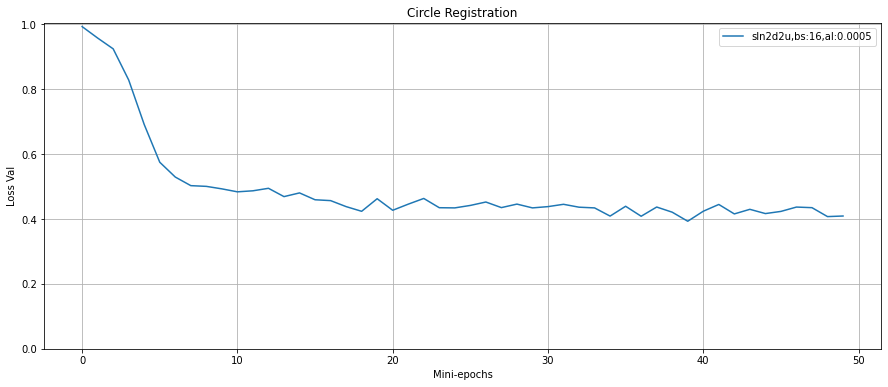

In [4]:
train_datas1 = np.load("griddata/sln2d2u-train-bs32.npy")
names1 = np.load("griddata/sln2d2u-names-bs32.npy")

compare_lines(train_datas1, names1)

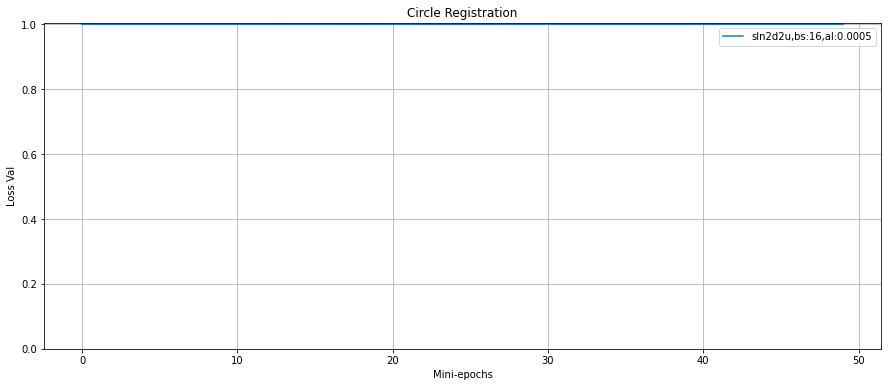

In [5]:
val_datas1 = np.load("griddata/sln2d2u-val-bs32.npy")

compare_lines(val_datas1, names1)

In [8]:
nf_enc = [256, 256, 256]
nf_dec = [256, 256, 256]

train_datas5, val_datas5, names5 = run_gridsearch(mod_name="ae2d2u",
                                                   vol_s=vol_size, 
                                                   nf_e=nf_enc, 
                                                   nf_d=nf_dec,
                                                   alpha_list=alphas, 
                                                   batch_list=batch_sizes, 
                                                   num_iters=iterations,
                                                   super_size=256,
                                                   save_models=True)
np.save("griddata/ae2d2u-train-bs32",train_datas5)
np.save("griddata/ae2d2u-val-bs32",val_datas5)
np.save("griddata/ae2d2u-names-bs32",names5)

Train Epoch: 0 | Loss: 0.027992 | Reconstruction Loss: 0.027992 | Dice Score: 0.990044
Val Epoch: 0 | Dice Score: 0.999901


/nfs02/users/vib9/anaconda3/envs/sln/lib/python3.6/site-packages/torch/nn/functional.py:3226: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


Val Epoch: 1 | Dice Score: 0.999901
Val Epoch: 2 | Dice Score: 0.999901
Val Epoch: 3 | Dice Score: 0.999901
Val Epoch: 4 | Dice Score: 0.999901
Val Epoch: 5 | Dice Score: 0.999901
Val Epoch: 6 | Dice Score: 0.999901
Val Epoch: 7 | Dice Score: 0.999901
Val Epoch: 8 | Dice Score: 0.999901
Val Epoch: 9 | Dice Score: 0.999901
Val Epoch: 10 | Dice Score: 0.999901
Val Epoch: 11 | Dice Score: 0.999901
Val Epoch: 12 | Dice Score: 0.999901
Val Epoch: 13 | Dice Score: 0.999901
Val Epoch: 14 | Dice Score: 0.999901
Val Epoch: 15 | Dice Score: 0.999901
Val Epoch: 16 | Dice Score: 0.999901
Val Epoch: 17 | Dice Score: 0.999901
Val Epoch: 18 | Dice Score: 0.999901
Val Epoch: 19 | Dice Score: 0.999901
Val Epoch: 20 | Dice Score: 0.999901
Val Epoch: 21 | Dice Score: 0.999901
Val Epoch: 22 | Dice Score: 0.999901
Val Epoch: 23 | Dice Score: 0.999901
Val Epoch: 24 | Dice Score: 0.999901
Val Epoch: 25 | Dice Score: 0.999901
Val Epoch: 26 | Dice Score: 0.999901
Val Epoch: 27 | Dice Score: 0.999901
Val Epoch:

Train Epoch: 68 | Loss: 0.016509 | Reconstruction Loss: 0.015907 | Dice Score: 0.980417
Train Epoch: 69 | Loss: 0.016311 | Reconstruction Loss: 0.015595 | Dice Score: 0.993452
Train Epoch: 70 | Loss: 0.016346 | Reconstruction Loss: 0.015566 | Dice Score: 0.985212
Train Epoch: 71 | Loss: 0.016033 | Reconstruction Loss: 0.015281 | Dice Score: 0.954186
Train Epoch: 72 | Loss: 0.016363 | Reconstruction Loss: 0.015671 | Dice Score: 0.999436
Train Epoch: 73 | Loss: 0.016414 | Reconstruction Loss: 0.015724 | Dice Score: 0.999811
Train Epoch: 74 | Loss: 0.015517 | Reconstruction Loss: 0.014957 | Dice Score: 0.892210
Train Epoch: 75 | Loss: 0.016183 | Reconstruction Loss: 0.015485 | Dice Score: 0.953450
Train Epoch: 76 | Loss: 0.014590 | Reconstruction Loss: 0.013906 | Dice Score: 0.841474
Train Epoch: 77 | Loss: 0.015993 | Reconstruction Loss: 0.015280 | Dice Score: 0.997533
Train Epoch: 78 | Loss: 0.016536 | Reconstruction Loss: 0.015943 | Dice Score: 0.999811
Train Epoch: 79 | Loss: 0.016317

Train Epoch: 148 | Loss: 0.012572 | Reconstruction Loss: 0.011765 | Dice Score: 0.683464
Train Epoch: 149 | Loss: 0.014692 | Reconstruction Loss: 0.014077 | Dice Score: 0.848334
Train Epoch: 150 | Loss: 0.015176 | Reconstruction Loss: 0.014721 | Dice Score: 0.916273
Train Epoch: 151 | Loss: 0.015058 | Reconstruction Loss: 0.014268 | Dice Score: 0.925586
Train Epoch: 152 | Loss: 0.013844 | Reconstruction Loss: 0.012997 | Dice Score: 0.827224
Train Epoch: 153 | Loss: 0.015719 | Reconstruction Loss: 0.015169 | Dice Score: 0.967638
Train Epoch: 154 | Loss: 0.014979 | Reconstruction Loss: 0.014587 | Dice Score: 0.848428
Train Epoch: 155 | Loss: 0.015705 | Reconstruction Loss: 0.014994 | Dice Score: 0.950633
Train Epoch: 156 | Loss: 0.013372 | Reconstruction Loss: 0.012329 | Dice Score: 0.741693
Train Epoch: 157 | Loss: 0.014290 | Reconstruction Loss: 0.013042 | Dice Score: 0.762127
Train Epoch: 158 | Loss: 0.014338 | Reconstruction Loss: 0.013376 | Dice Score: 0.807889
Train Epoch: 159 | Lo

Train Epoch: 227 | Loss: 0.012547 | Reconstruction Loss: 0.011897 | Dice Score: 0.661084
Train Epoch: 228 | Loss: 0.014457 | Reconstruction Loss: 0.013674 | Dice Score: 0.809814
Train Epoch: 229 | Loss: 0.015077 | Reconstruction Loss: 0.014265 | Dice Score: 0.864111
Train Epoch: 230 | Loss: 0.014491 | Reconstruction Loss: 0.013710 | Dice Score: 0.816416
Train Epoch: 231 | Loss: 0.010925 | Reconstruction Loss: 0.010135 | Dice Score: 0.550375
Train Epoch: 232 | Loss: 0.014276 | Reconstruction Loss: 0.013662 | Dice Score: 0.769708
Train Epoch: 233 | Loss: 0.012509 | Reconstruction Loss: 0.011859 | Dice Score: 0.626693
Train Epoch: 234 | Loss: 0.012943 | Reconstruction Loss: 0.012302 | Dice Score: 0.691541
Train Epoch: 235 | Loss: 0.012105 | Reconstruction Loss: 0.011305 | Dice Score: 0.598490
Train Epoch: 236 | Loss: 0.012850 | Reconstruction Loss: 0.012042 | Dice Score: 0.662049
Train Epoch: 237 | Loss: 0.011825 | Reconstruction Loss: 0.011138 | Dice Score: 0.641367
Train Epoch: 238 | Lo

Train Epoch: 306 | Loss: 0.012746 | Reconstruction Loss: 0.011877 | Dice Score: 0.641820
Train Epoch: 307 | Loss: 0.013812 | Reconstruction Loss: 0.012847 | Dice Score: 0.752360
Train Epoch: 308 | Loss: 0.015029 | Reconstruction Loss: 0.014146 | Dice Score: 0.876617
Train Epoch: 309 | Loss: 0.011409 | Reconstruction Loss: 0.010672 | Dice Score: 0.639727
Train Epoch: 310 | Loss: 0.011853 | Reconstruction Loss: 0.011060 | Dice Score: 0.629264
Train Epoch: 311 | Loss: 0.013104 | Reconstruction Loss: 0.012338 | Dice Score: 0.627682
Train Epoch: 312 | Loss: 0.013518 | Reconstruction Loss: 0.012412 | Dice Score: 0.612248
Train Epoch: 313 | Loss: 0.012707 | Reconstruction Loss: 0.011538 | Dice Score: 0.645680
Train Epoch: 314 | Loss: 0.013918 | Reconstruction Loss: 0.012685 | Dice Score: 0.764128
Train Epoch: 315 | Loss: 0.010568 | Reconstruction Loss: 0.009562 | Dice Score: 0.479493
Train Epoch: 316 | Loss: 0.011712 | Reconstruction Loss: 0.010987 | Dice Score: 0.531977
Train Epoch: 317 | Lo

Val Epoch: 0 | Dice Score: 0.999804
Val Epoch: 1 | Dice Score: 0.999804
Val Epoch: 2 | Dice Score: 0.999804
Val Epoch: 3 | Dice Score: 0.999804
Val Epoch: 4 | Dice Score: 0.999804
Val Epoch: 5 | Dice Score: 0.999804
Val Epoch: 6 | Dice Score: 0.999804
Val Epoch: 7 | Dice Score: 0.999804
Val Epoch: 8 | Dice Score: 0.999804
Val Epoch: 9 | Dice Score: 0.999804
Val Epoch: 10 | Dice Score: 0.999804
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.999804
Val Epoch: 13 | Dice Score: 0.999804
Val Epoch: 14 | Dice Score: 0.999804
Val Epoch: 15 | Dice Score: 0.999804
Val Epoch: 16 | Dice Score: 0.999804
Val Epoch: 17 | Dice Score: 0.999804
Val Epoch: 18 | Dice Score: 0.999804
Val Epoch: 19 | Dice Score: 0.999804
Val Epoch: 20 | Dice Score: 0.999804
Val Epoch: 21 | Dice Score: 0.999804
Val Epoch: 22 | Dice Score: 0.999804
Val Epoch: 23 | Dice Score: 0.999804
Val Epoch: 24 | Dice Score: 0.999804
Val Epoch: 25 | Dice Score: 0.999804
Val Epoch: 26 | Dice Score: 0.999804
Val Epoch: 

Train Epoch: 451 | Loss: 0.011217 | Reconstruction Loss: 0.010521 | Dice Score: 0.517057
Train Epoch: 452 | Loss: 0.012140 | Reconstruction Loss: 0.011543 | Dice Score: 0.563882
Train Epoch: 453 | Loss: 0.011235 | Reconstruction Loss: 0.010687 | Dice Score: 0.509024
Train Epoch: 454 | Loss: 0.012366 | Reconstruction Loss: 0.011861 | Dice Score: 0.662815
Train Epoch: 455 | Loss: 0.012878 | Reconstruction Loss: 0.012272 | Dice Score: 0.716552
Train Epoch: 456 | Loss: 0.010749 | Reconstruction Loss: 0.010144 | Dice Score: 0.573110
Train Epoch: 457 | Loss: 0.010075 | Reconstruction Loss: 0.009330 | Dice Score: 0.431661
Train Epoch: 458 | Loss: 0.015303 | Reconstruction Loss: 0.014570 | Dice Score: 0.889171
Train Epoch: 459 | Loss: 0.010945 | Reconstruction Loss: 0.010280 | Dice Score: 0.454619
Train Epoch: 460 | Loss: 0.011663 | Reconstruction Loss: 0.010940 | Dice Score: 0.570203
Train Epoch: 461 | Loss: 0.012946 | Reconstruction Loss: 0.012037 | Dice Score: 0.726108
Train Epoch: 462 | Lo

Train Epoch: 530 | Loss: 0.011205 | Reconstruction Loss: 0.010605 | Dice Score: 0.538067
Train Epoch: 531 | Loss: 0.010563 | Reconstruction Loss: 0.010049 | Dice Score: 0.502733
Train Epoch: 532 | Loss: 0.010553 | Reconstruction Loss: 0.009854 | Dice Score: 0.473264
Train Epoch: 533 | Loss: 0.013950 | Reconstruction Loss: 0.013202 | Dice Score: 0.720572
Train Epoch: 534 | Loss: 0.011491 | Reconstruction Loss: 0.010674 | Dice Score: 0.539741
Train Epoch: 535 | Loss: 0.011204 | Reconstruction Loss: 0.010413 | Dice Score: 0.512654
Train Epoch: 536 | Loss: 0.013700 | Reconstruction Loss: 0.012976 | Dice Score: 0.756696
Train Epoch: 537 | Loss: 0.010690 | Reconstruction Loss: 0.009902 | Dice Score: 0.548025
Train Epoch: 538 | Loss: 0.012007 | Reconstruction Loss: 0.011189 | Dice Score: 0.603968
Train Epoch: 539 | Loss: 0.012733 | Reconstruction Loss: 0.011977 | Dice Score: 0.610829
Train Epoch: 540 | Loss: 0.011971 | Reconstruction Loss: 0.011387 | Dice Score: 0.558030
Train Epoch: 541 | Lo

Train Epoch: 609 | Loss: 0.010895 | Reconstruction Loss: 0.010016 | Dice Score: 0.466557
Train Epoch: 610 | Loss: 0.009698 | Reconstruction Loss: 0.008962 | Dice Score: 0.447358
Train Epoch: 611 | Loss: 0.010337 | Reconstruction Loss: 0.009622 | Dice Score: 0.474842
Train Epoch: 612 | Loss: 0.010986 | Reconstruction Loss: 0.010283 | Dice Score: 0.572434
Train Epoch: 613 | Loss: 0.011566 | Reconstruction Loss: 0.010992 | Dice Score: 0.555958
Train Epoch: 614 | Loss: 0.013498 | Reconstruction Loss: 0.012893 | Dice Score: 0.677147
Train Epoch: 615 | Loss: 0.009883 | Reconstruction Loss: 0.008887 | Dice Score: 0.403199
Train Epoch: 616 | Loss: 0.011269 | Reconstruction Loss: 0.010313 | Dice Score: 0.504262
Train Epoch: 617 | Loss: 0.011100 | Reconstruction Loss: 0.010362 | Dice Score: 0.544864
Train Epoch: 618 | Loss: 0.011239 | Reconstruction Loss: 0.010579 | Dice Score: 0.587816
Train Epoch: 619 | Loss: 0.011836 | Reconstruction Loss: 0.011230 | Dice Score: 0.572904
Train Epoch: 620 | Lo

Train Epoch: 688 | Loss: 0.013118 | Reconstruction Loss: 0.012425 | Dice Score: 0.754443
Train Epoch: 689 | Loss: 0.013339 | Reconstruction Loss: 0.012573 | Dice Score: 0.670844
Train Epoch: 690 | Loss: 0.010589 | Reconstruction Loss: 0.009823 | Dice Score: 0.434564
Train Epoch: 691 | Loss: 0.009676 | Reconstruction Loss: 0.008925 | Dice Score: 0.434940
Train Epoch: 692 | Loss: 0.010471 | Reconstruction Loss: 0.009781 | Dice Score: 0.535110
Train Epoch: 693 | Loss: 0.011065 | Reconstruction Loss: 0.010240 | Dice Score: 0.533014
Train Epoch: 694 | Loss: 0.012829 | Reconstruction Loss: 0.012318 | Dice Score: 0.678696
Train Epoch: 695 | Loss: 0.010113 | Reconstruction Loss: 0.009366 | Dice Score: 0.412080
Train Epoch: 696 | Loss: 0.010807 | Reconstruction Loss: 0.010047 | Dice Score: 0.463586
Train Epoch: 697 | Loss: 0.009744 | Reconstruction Loss: 0.009075 | Dice Score: 0.451851
Train Epoch: 698 | Loss: 0.011456 | Reconstruction Loss: 0.010602 | Dice Score: 0.611830
Train Epoch: 699 | Lo

Train Epoch: 767 | Loss: 0.010758 | Reconstruction Loss: 0.009993 | Dice Score: 0.484070
Train Epoch: 768 | Loss: 0.012503 | Reconstruction Loss: 0.011598 | Dice Score: 0.594640
Val Epoch: 0 | Dice Score: 0.999804
Val Epoch: 1 | Dice Score: 0.999805
Val Epoch: 2 | Dice Score: 0.999805
Val Epoch: 3 | Dice Score: 0.999804
Val Epoch: 4 | Dice Score: 0.999805
Val Epoch: 5 | Dice Score: 0.999805
Val Epoch: 6 | Dice Score: 0.999804
Val Epoch: 7 | Dice Score: 0.999805
Val Epoch: 8 | Dice Score: 0.999805
Val Epoch: 9 | Dice Score: 0.999804
Val Epoch: 10 | Dice Score: 0.999804
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.999805
Val Epoch: 13 | Dice Score: 0.999804
Val Epoch: 14 | Dice Score: 0.999805
Val Epoch: 15 | Dice Score: 0.999805
Val Epoch: 16 | Dice Score: 0.999804
Val Epoch: 17 | Dice Score: 0.999804
Val Epoch: 18 | Dice Score: 0.999805
Val Epoch: 19 | Dice Score: 0.999804
Val Epoch: 20 | Dice Score: 0.999805
Val Epoch: 21 | Dice Score: 0.999804
Val Epoch: 22 | Di

Train Epoch: 833 | Loss: 0.010085 | Reconstruction Loss: 0.009523 | Dice Score: 0.488624
Train Epoch: 834 | Loss: 0.010101 | Reconstruction Loss: 0.009118 | Dice Score: 0.426698
Train Epoch: 835 | Loss: 0.011844 | Reconstruction Loss: 0.011048 | Dice Score: 0.524380
Train Epoch: 836 | Loss: 0.009765 | Reconstruction Loss: 0.009108 | Dice Score: 0.407899
Train Epoch: 837 | Loss: 0.012453 | Reconstruction Loss: 0.011791 | Dice Score: 0.655999
Train Epoch: 838 | Loss: 0.011403 | Reconstruction Loss: 0.010615 | Dice Score: 0.635040
Train Epoch: 839 | Loss: 0.008891 | Reconstruction Loss: 0.007929 | Dice Score: 0.399431
Train Epoch: 840 | Loss: 0.011949 | Reconstruction Loss: 0.010979 | Dice Score: 0.548683
Train Epoch: 841 | Loss: 0.011696 | Reconstruction Loss: 0.010786 | Dice Score: 0.512567
Train Epoch: 842 | Loss: 0.012069 | Reconstruction Loss: 0.011309 | Dice Score: 0.562117
Train Epoch: 843 | Loss: 0.010213 | Reconstruction Loss: 0.009394 | Dice Score: 0.476170
Train Epoch: 844 | Lo

Train Epoch: 912 | Loss: 0.007463 | Reconstruction Loss: 0.006612 | Dice Score: 0.292870
Train Epoch: 913 | Loss: 0.010960 | Reconstruction Loss: 0.010191 | Dice Score: 0.484706
Train Epoch: 914 | Loss: 0.012503 | Reconstruction Loss: 0.011719 | Dice Score: 0.599064
Train Epoch: 915 | Loss: 0.011268 | Reconstruction Loss: 0.010594 | Dice Score: 0.502179
Train Epoch: 916 | Loss: 0.009177 | Reconstruction Loss: 0.008533 | Dice Score: 0.375991
Train Epoch: 917 | Loss: 0.008377 | Reconstruction Loss: 0.007551 | Dice Score: 0.328851
Train Epoch: 918 | Loss: 0.011374 | Reconstruction Loss: 0.010422 | Dice Score: 0.560502
Train Epoch: 919 | Loss: 0.008429 | Reconstruction Loss: 0.007431 | Dice Score: 0.333808
Train Epoch: 920 | Loss: 0.010731 | Reconstruction Loss: 0.009946 | Dice Score: 0.476367
Train Epoch: 921 | Loss: 0.012375 | Reconstruction Loss: 0.011455 | Dice Score: 0.577951
Train Epoch: 922 | Loss: 0.010192 | Reconstruction Loss: 0.009491 | Dice Score: 0.440931
Train Epoch: 923 | Lo

Train Epoch: 991 | Loss: 0.010468 | Reconstruction Loss: 0.009752 | Dice Score: 0.451004
Train Epoch: 992 | Loss: 0.012440 | Reconstruction Loss: 0.011751 | Dice Score: 0.604669
Train Epoch: 993 | Loss: 0.009932 | Reconstruction Loss: 0.009299 | Dice Score: 0.446407
Train Epoch: 994 | Loss: 0.008824 | Reconstruction Loss: 0.008197 | Dice Score: 0.369135
Train Epoch: 995 | Loss: 0.008587 | Reconstruction Loss: 0.007852 | Dice Score: 0.361589
Train Epoch: 996 | Loss: 0.006459 | Reconstruction Loss: 0.005878 | Dice Score: 0.238319
Train Epoch: 997 | Loss: 0.011590 | Reconstruction Loss: 0.010855 | Dice Score: 0.524927
Train Epoch: 998 | Loss: 0.009883 | Reconstruction Loss: 0.009027 | Dice Score: 0.401184
Train Epoch: 999 | Loss: 0.008889 | Reconstruction Loss: 0.008166 | Dice Score: 0.355013
Train Epoch: 1000 | Loss: 0.009540 | Reconstruction Loss: 0.008722 | Dice Score: 0.398775
Train Epoch: 1001 | Loss: 0.011107 | Reconstruction Loss: 0.010246 | Dice Score: 0.514736
Train Epoch: 1002 |

Train Epoch: 1070 | Loss: 0.011682 | Reconstruction Loss: 0.010811 | Dice Score: 0.554399
Train Epoch: 1071 | Loss: 0.009581 | Reconstruction Loss: 0.008813 | Dice Score: 0.414706
Train Epoch: 1072 | Loss: 0.010051 | Reconstruction Loss: 0.009329 | Dice Score: 0.447928
Train Epoch: 1073 | Loss: 0.010616 | Reconstruction Loss: 0.009956 | Dice Score: 0.507089
Train Epoch: 1074 | Loss: 0.011123 | Reconstruction Loss: 0.010587 | Dice Score: 0.523106
Train Epoch: 1075 | Loss: 0.010582 | Reconstruction Loss: 0.009865 | Dice Score: 0.470124
Train Epoch: 1076 | Loss: 0.012655 | Reconstruction Loss: 0.011860 | Dice Score: 0.615030
Train Epoch: 1077 | Loss: 0.011939 | Reconstruction Loss: 0.011137 | Dice Score: 0.573465
Train Epoch: 1078 | Loss: 0.011296 | Reconstruction Loss: 0.010600 | Dice Score: 0.532988
Train Epoch: 1079 | Loss: 0.011929 | Reconstruction Loss: 0.011064 | Dice Score: 0.578520
Train Epoch: 1080 | Loss: 0.010607 | Reconstruction Loss: 0.009707 | Dice Score: 0.467823
Train Epoc

Train Epoch: 1148 | Loss: 0.011546 | Reconstruction Loss: 0.010720 | Dice Score: 0.534908
Train Epoch: 1149 | Loss: 0.010614 | Reconstruction Loss: 0.009715 | Dice Score: 0.453814
Train Epoch: 1150 | Loss: 0.013187 | Reconstruction Loss: 0.012218 | Dice Score: 0.641238
Train Epoch: 1151 | Loss: 0.012715 | Reconstruction Loss: 0.011969 | Dice Score: 0.616482
Train Epoch: 1152 | Loss: 0.011145 | Reconstruction Loss: 0.010402 | Dice Score: 0.528521
Val Epoch: 0 | Dice Score: 0.999804
Val Epoch: 1 | Dice Score: 0.999804
Val Epoch: 2 | Dice Score: 0.999804
Val Epoch: 3 | Dice Score: 0.999804
Val Epoch: 4 | Dice Score: 0.999805
Val Epoch: 5 | Dice Score: 0.999805
Val Epoch: 6 | Dice Score: 0.999804
Val Epoch: 7 | Dice Score: 0.999804
Val Epoch: 8 | Dice Score: 0.999805
Val Epoch: 9 | Dice Score: 0.999804
Val Epoch: 10 | Dice Score: 0.999804
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.999804
Val Epoch: 13 | Dice Score: 0.999804
Val Epoch: 14 | Dice Score: 0.999805
Val E

Val Epoch: 23 | Dice Score: 0.999805
Val Epoch: 24 | Dice Score: 0.999805
Val Epoch: 25 | Dice Score: 0.999805
Val Epoch: 26 | Dice Score: 0.999805
Val Epoch: 27 | Dice Score: 0.999804
Val Epoch: 28 | Dice Score: 0.999804
Val Epoch: 29 | Dice Score: 0.999804
Val Epoch: 30 | Dice Score: 0.999805
Val Epoch: 31 | Dice Score: 0.999805
Train Epoch: 1217 | Loss: 0.013391 | Reconstruction Loss: 0.012689 | Dice Score: 0.688850
Train Epoch: 1218 | Loss: 0.013168 | Reconstruction Loss: 0.012283 | Dice Score: 0.658073
Train Epoch: 1219 | Loss: 0.010116 | Reconstruction Loss: 0.009057 | Dice Score: 0.416442
Train Epoch: 1220 | Loss: 0.011310 | Reconstruction Loss: 0.010058 | Dice Score: 0.488961
Train Epoch: 1221 | Loss: 0.008233 | Reconstruction Loss: 0.007478 | Dice Score: 0.385620
Train Epoch: 1222 | Loss: 0.012750 | Reconstruction Loss: 0.012014 | Dice Score: 0.695422
Train Epoch: 1223 | Loss: 0.008632 | Reconstruction Loss: 0.007868 | Dice Score: 0.341011
Train Epoch: 1224 | Loss: 0.009896 | 

Train Epoch: 1292 | Loss: 0.013548 | Reconstruction Loss: 0.012746 | Dice Score: 0.726226
Train Epoch: 1293 | Loss: 0.010815 | Reconstruction Loss: 0.010129 | Dice Score: 0.530627
Train Epoch: 1294 | Loss: 0.009511 | Reconstruction Loss: 0.008744 | Dice Score: 0.389724
Train Epoch: 1295 | Loss: 0.009739 | Reconstruction Loss: 0.009086 | Dice Score: 0.455421
Train Epoch: 1296 | Loss: 0.010937 | Reconstruction Loss: 0.010312 | Dice Score: 0.489969
Train Epoch: 1297 | Loss: 0.012920 | Reconstruction Loss: 0.012154 | Dice Score: 0.673844
Train Epoch: 1298 | Loss: 0.009611 | Reconstruction Loss: 0.008641 | Dice Score: 0.416722
Train Epoch: 1299 | Loss: 0.009216 | Reconstruction Loss: 0.008370 | Dice Score: 0.382041
Train Epoch: 1300 | Loss: 0.010416 | Reconstruction Loss: 0.009601 | Dice Score: 0.446234
Train Epoch: 1301 | Loss: 0.009926 | Reconstruction Loss: 0.009191 | Dice Score: 0.440983
Train Epoch: 1302 | Loss: 0.009911 | Reconstruction Loss: 0.009124 | Dice Score: 0.444952
Train Epoc

Train Epoch: 1370 | Loss: 0.010896 | Reconstruction Loss: 0.010290 | Dice Score: 0.498594
Train Epoch: 1371 | Loss: 0.010643 | Reconstruction Loss: 0.009530 | Dice Score: 0.445810
Train Epoch: 1372 | Loss: 0.012902 | Reconstruction Loss: 0.012245 | Dice Score: 0.672186
Train Epoch: 1373 | Loss: 0.010649 | Reconstruction Loss: 0.009970 | Dice Score: 0.501145
Train Epoch: 1374 | Loss: 0.010215 | Reconstruction Loss: 0.009519 | Dice Score: 0.473217
Train Epoch: 1375 | Loss: 0.010137 | Reconstruction Loss: 0.009401 | Dice Score: 0.449697
Train Epoch: 1376 | Loss: 0.011642 | Reconstruction Loss: 0.010717 | Dice Score: 0.524731
Train Epoch: 1377 | Loss: 0.009451 | Reconstruction Loss: 0.008473 | Dice Score: 0.374984
Train Epoch: 1378 | Loss: 0.009478 | Reconstruction Loss: 0.008746 | Dice Score: 0.384746
Train Epoch: 1379 | Loss: 0.011390 | Reconstruction Loss: 0.010203 | Dice Score: 0.538103
Train Epoch: 1380 | Loss: 0.010759 | Reconstruction Loss: 0.009934 | Dice Score: 0.483950
Train Epoc

Train Epoch: 1448 | Loss: 0.011330 | Reconstruction Loss: 0.010470 | Dice Score: 0.515182
Train Epoch: 1449 | Loss: 0.010853 | Reconstruction Loss: 0.009966 | Dice Score: 0.492612
Train Epoch: 1450 | Loss: 0.008552 | Reconstruction Loss: 0.007797 | Dice Score: 0.367256
Train Epoch: 1451 | Loss: 0.008618 | Reconstruction Loss: 0.007969 | Dice Score: 0.350844
Train Epoch: 1452 | Loss: 0.010191 | Reconstruction Loss: 0.009550 | Dice Score: 0.431566
Train Epoch: 1453 | Loss: 0.012134 | Reconstruction Loss: 0.011511 | Dice Score: 0.578254
Train Epoch: 1454 | Loss: 0.010252 | Reconstruction Loss: 0.009403 | Dice Score: 0.437834
Train Epoch: 1455 | Loss: 0.010542 | Reconstruction Loss: 0.009873 | Dice Score: 0.489967
Train Epoch: 1456 | Loss: 0.011057 | Reconstruction Loss: 0.010225 | Dice Score: 0.538954
Train Epoch: 1457 | Loss: 0.007251 | Reconstruction Loss: 0.006377 | Dice Score: 0.281185
Train Epoch: 1458 | Loss: 0.012791 | Reconstruction Loss: 0.011586 | Dice Score: 0.600030
Train Epoc

Train Epoch: 1526 | Loss: 0.012053 | Reconstruction Loss: 0.010924 | Dice Score: 0.534471
Train Epoch: 1527 | Loss: 0.010380 | Reconstruction Loss: 0.009496 | Dice Score: 0.454435
Train Epoch: 1528 | Loss: 0.010894 | Reconstruction Loss: 0.009924 | Dice Score: 0.499495
Train Epoch: 1529 | Loss: 0.010625 | Reconstruction Loss: 0.009782 | Dice Score: 0.478046
Train Epoch: 1530 | Loss: 0.011852 | Reconstruction Loss: 0.011110 | Dice Score: 0.563709
Train Epoch: 1531 | Loss: 0.012273 | Reconstruction Loss: 0.011369 | Dice Score: 0.576976
Train Epoch: 1532 | Loss: 0.011746 | Reconstruction Loss: 0.010910 | Dice Score: 0.531711
Train Epoch: 1533 | Loss: 0.010089 | Reconstruction Loss: 0.009388 | Dice Score: 0.435445
Train Epoch: 1534 | Loss: 0.010503 | Reconstruction Loss: 0.009766 | Dice Score: 0.460333
Train Epoch: 1535 | Loss: 0.011343 | Reconstruction Loss: 0.010648 | Dice Score: 0.530669
Train Epoch: 1536 | Loss: 0.011511 | Reconstruction Loss: 0.010658 | Dice Score: 0.536788
Val Epoch:

Val Epoch: 8 | Dice Score: 0.999804
Val Epoch: 9 | Dice Score: 0.999804
Val Epoch: 10 | Dice Score: 0.999804
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.999804
Val Epoch: 13 | Dice Score: 0.999804
Val Epoch: 14 | Dice Score: 0.999804
Val Epoch: 15 | Dice Score: 0.999804
Val Epoch: 16 | Dice Score: 0.999804
Val Epoch: 17 | Dice Score: 0.999804
Val Epoch: 18 | Dice Score: 0.999804
Val Epoch: 19 | Dice Score: 0.999804
Val Epoch: 20 | Dice Score: 0.999804
Val Epoch: 21 | Dice Score: 0.999804
Val Epoch: 22 | Dice Score: 0.999804
Val Epoch: 23 | Dice Score: 0.999804
Val Epoch: 24 | Dice Score: 0.999804
Val Epoch: 25 | Dice Score: 0.999804
Val Epoch: 26 | Dice Score: 0.999804
Val Epoch: 27 | Dice Score: 0.999804
Val Epoch: 28 | Dice Score: 0.999804
Val Epoch: 29 | Dice Score: 0.999804
Val Epoch: 30 | Dice Score: 0.999804
Val Epoch: 31 | Dice Score: 0.999804
Train Epoch: 1601 | Loss: 0.012895 | Reconstruction Loss: 0.011920 | Dice Score: 0.640712
Train Epoch: 1602 | Loss

Train Epoch: 1670 | Loss: 0.011556 | Reconstruction Loss: 0.010662 | Dice Score: 0.514196
Train Epoch: 1671 | Loss: 0.009375 | Reconstruction Loss: 0.008370 | Dice Score: 0.380008
Train Epoch: 1672 | Loss: 0.009770 | Reconstruction Loss: 0.009066 | Dice Score: 0.449951
Train Epoch: 1673 | Loss: 0.009703 | Reconstruction Loss: 0.008789 | Dice Score: 0.397601
Train Epoch: 1674 | Loss: 0.008994 | Reconstruction Loss: 0.008075 | Dice Score: 0.349872
Train Epoch: 1675 | Loss: 0.011285 | Reconstruction Loss: 0.010532 | Dice Score: 0.516986
Train Epoch: 1676 | Loss: 0.008652 | Reconstruction Loss: 0.007902 | Dice Score: 0.370741
Train Epoch: 1677 | Loss: 0.012336 | Reconstruction Loss: 0.011433 | Dice Score: 0.600031
Train Epoch: 1678 | Loss: 0.007669 | Reconstruction Loss: 0.006886 | Dice Score: 0.309125
Train Epoch: 1679 | Loss: 0.009000 | Reconstruction Loss: 0.008049 | Dice Score: 0.342843
Train Epoch: 1680 | Loss: 0.009977 | Reconstruction Loss: 0.009193 | Dice Score: 0.414774
Train Epoc

Train Epoch: 1748 | Loss: 0.009527 | Reconstruction Loss: 0.008924 | Dice Score: 0.440425
Train Epoch: 1749 | Loss: 0.008867 | Reconstruction Loss: 0.008165 | Dice Score: 0.376416
Train Epoch: 1750 | Loss: 0.010324 | Reconstruction Loss: 0.009727 | Dice Score: 0.461560
Train Epoch: 1751 | Loss: 0.010438 | Reconstruction Loss: 0.009843 | Dice Score: 0.454204
Train Epoch: 1752 | Loss: 0.009663 | Reconstruction Loss: 0.008874 | Dice Score: 0.386609
Train Epoch: 1753 | Loss: 0.011526 | Reconstruction Loss: 0.010668 | Dice Score: 0.518545
Train Epoch: 1754 | Loss: 0.010332 | Reconstruction Loss: 0.009383 | Dice Score: 0.437234
Train Epoch: 1755 | Loss: 0.008927 | Reconstruction Loss: 0.008172 | Dice Score: 0.360589
Train Epoch: 1756 | Loss: 0.009172 | Reconstruction Loss: 0.008334 | Dice Score: 0.367414
Train Epoch: 1757 | Loss: 0.008204 | Reconstruction Loss: 0.007576 | Dice Score: 0.309420
Train Epoch: 1758 | Loss: 0.009324 | Reconstruction Loss: 0.008524 | Dice Score: 0.373694
Train Epoc

Train Epoch: 1826 | Loss: 0.013047 | Reconstruction Loss: 0.012248 | Dice Score: 0.712771
Train Epoch: 1827 | Loss: 0.010980 | Reconstruction Loss: 0.010203 | Dice Score: 0.507614
Train Epoch: 1828 | Loss: 0.010260 | Reconstruction Loss: 0.009495 | Dice Score: 0.440503
Train Epoch: 1829 | Loss: 0.008630 | Reconstruction Loss: 0.007972 | Dice Score: 0.347203
Train Epoch: 1830 | Loss: 0.013412 | Reconstruction Loss: 0.012601 | Dice Score: 0.674340
Train Epoch: 1831 | Loss: 0.010239 | Reconstruction Loss: 0.009531 | Dice Score: 0.441730
Train Epoch: 1832 | Loss: 0.009873 | Reconstruction Loss: 0.008741 | Dice Score: 0.399127
Train Epoch: 1833 | Loss: 0.011005 | Reconstruction Loss: 0.010195 | Dice Score: 0.518475
Train Epoch: 1834 | Loss: 0.010006 | Reconstruction Loss: 0.009258 | Dice Score: 0.432290
Train Epoch: 1835 | Loss: 0.010980 | Reconstruction Loss: 0.009982 | Dice Score: 0.505350
Train Epoch: 1836 | Loss: 0.009207 | Reconstruction Loss: 0.008201 | Dice Score: 0.361803
Train Epoc

Train Epoch: 1904 | Loss: 0.008463 | Reconstruction Loss: 0.007534 | Dice Score: 0.322370
Train Epoch: 1905 | Loss: 0.008839 | Reconstruction Loss: 0.008159 | Dice Score: 0.361188
Train Epoch: 1906 | Loss: 0.011820 | Reconstruction Loss: 0.010802 | Dice Score: 0.542033
Train Epoch: 1907 | Loss: 0.012351 | Reconstruction Loss: 0.011451 | Dice Score: 0.591061
Train Epoch: 1908 | Loss: 0.008089 | Reconstruction Loss: 0.007237 | Dice Score: 0.322140
Train Epoch: 1909 | Loss: 0.009444 | Reconstruction Loss: 0.008632 | Dice Score: 0.382721
Train Epoch: 1910 | Loss: 0.008874 | Reconstruction Loss: 0.007933 | Dice Score: 0.339274
Train Epoch: 1911 | Loss: 0.009786 | Reconstruction Loss: 0.008855 | Dice Score: 0.416261
Train Epoch: 1912 | Loss: 0.009581 | Reconstruction Loss: 0.008933 | Dice Score: 0.439336
Train Epoch: 1913 | Loss: 0.008161 | Reconstruction Loss: 0.007300 | Dice Score: 0.319746
Train Epoch: 1914 | Loss: 0.010347 | Reconstruction Loss: 0.009217 | Dice Score: 0.433568
Train Epoc

Train Epoch: 1982 | Loss: 0.010135 | Reconstruction Loss: 0.009503 | Dice Score: 0.422486
Train Epoch: 1983 | Loss: 0.011986 | Reconstruction Loss: 0.011155 | Dice Score: 0.590707
Train Epoch: 1984 | Loss: 0.007909 | Reconstruction Loss: 0.007100 | Dice Score: 0.302522
Val Epoch: 0 | Dice Score: 0.999804
Val Epoch: 1 | Dice Score: 0.999804
Val Epoch: 2 | Dice Score: 0.999804
Val Epoch: 3 | Dice Score: 0.999804
Val Epoch: 4 | Dice Score: 0.999804
Val Epoch: 5 | Dice Score: 0.999804
Val Epoch: 6 | Dice Score: 0.999804
Val Epoch: 7 | Dice Score: 0.999804
Val Epoch: 8 | Dice Score: 0.999804
Val Epoch: 9 | Dice Score: 0.999804
Val Epoch: 10 | Dice Score: 0.999804
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.999804
Val Epoch: 13 | Dice Score: 0.999804
Val Epoch: 14 | Dice Score: 0.999804
Val Epoch: 15 | Dice Score: 0.999804
Val Epoch: 16 | Dice Score: 0.999804
Val Epoch: 17 | Dice Score: 0.999804
Val Epoch: 18 | Dice Score: 0.999804
Val Epoch: 19 | Dice Score: 0.999804


Val Epoch: 27 | Dice Score: 0.999804
Val Epoch: 28 | Dice Score: 0.999804
Val Epoch: 29 | Dice Score: 0.999804
Val Epoch: 30 | Dice Score: 0.999804
Val Epoch: 31 | Dice Score: 0.999804
Train Epoch: 2049 | Loss: 0.009975 | Reconstruction Loss: 0.009294 | Dice Score: 0.463595
Train Epoch: 2050 | Loss: 0.009935 | Reconstruction Loss: 0.009163 | Dice Score: 0.435431
Train Epoch: 2051 | Loss: 0.009416 | Reconstruction Loss: 0.008454 | Dice Score: 0.377085
Train Epoch: 2052 | Loss: 0.012268 | Reconstruction Loss: 0.011264 | Dice Score: 0.564308
Train Epoch: 2053 | Loss: 0.008505 | Reconstruction Loss: 0.007623 | Dice Score: 0.329211
Train Epoch: 2054 | Loss: 0.012735 | Reconstruction Loss: 0.011943 | Dice Score: 0.641936
Train Epoch: 2055 | Loss: 0.012908 | Reconstruction Loss: 0.012059 | Dice Score: 0.659994
Train Epoch: 2056 | Loss: 0.009528 | Reconstruction Loss: 0.008697 | Dice Score: 0.458108
Train Epoch: 2057 | Loss: 0.010835 | Reconstruction Loss: 0.009748 | Dice Score: 0.462010
Train

Train Epoch: 2125 | Loss: 0.009838 | Reconstruction Loss: 0.008918 | Dice Score: 0.408818
Train Epoch: 2126 | Loss: 0.007588 | Reconstruction Loss: 0.006947 | Dice Score: 0.291708
Train Epoch: 2127 | Loss: 0.010935 | Reconstruction Loss: 0.010093 | Dice Score: 0.497122
Train Epoch: 2128 | Loss: 0.011087 | Reconstruction Loss: 0.010294 | Dice Score: 0.500071
Train Epoch: 2129 | Loss: 0.009313 | Reconstruction Loss: 0.008440 | Dice Score: 0.371006
Train Epoch: 2130 | Loss: 0.009813 | Reconstruction Loss: 0.008863 | Dice Score: 0.406901
Train Epoch: 2131 | Loss: 0.008463 | Reconstruction Loss: 0.007541 | Dice Score: 0.324794
Train Epoch: 2132 | Loss: 0.007716 | Reconstruction Loss: 0.006958 | Dice Score: 0.293557
Train Epoch: 2133 | Loss: 0.011016 | Reconstruction Loss: 0.009914 | Dice Score: 0.497675
Train Epoch: 2134 | Loss: 0.011706 | Reconstruction Loss: 0.010693 | Dice Score: 0.544733
Train Epoch: 2135 | Loss: 0.013056 | Reconstruction Loss: 0.012399 | Dice Score: 0.670177
Train Epoc

Train Epoch: 2203 | Loss: 0.011794 | Reconstruction Loss: 0.010949 | Dice Score: 0.557764
Train Epoch: 2204 | Loss: 0.010723 | Reconstruction Loss: 0.009844 | Dice Score: 0.494058
Train Epoch: 2205 | Loss: 0.009306 | Reconstruction Loss: 0.008324 | Dice Score: 0.390892
Train Epoch: 2206 | Loss: 0.008672 | Reconstruction Loss: 0.007983 | Dice Score: 0.346916
Train Epoch: 2207 | Loss: 0.010177 | Reconstruction Loss: 0.009267 | Dice Score: 0.417247
Train Epoch: 2208 | Loss: 0.010278 | Reconstruction Loss: 0.009425 | Dice Score: 0.435431
Train Epoch: 2209 | Loss: 0.008008 | Reconstruction Loss: 0.007316 | Dice Score: 0.318636
Train Epoch: 2210 | Loss: 0.010158 | Reconstruction Loss: 0.009576 | Dice Score: 0.467556
Train Epoch: 2211 | Loss: 0.013215 | Reconstruction Loss: 0.012624 | Dice Score: 0.694568
Train Epoch: 2212 | Loss: 0.010991 | Reconstruction Loss: 0.010242 | Dice Score: 0.494039
Train Epoch: 2213 | Loss: 0.012448 | Reconstruction Loss: 0.011442 | Dice Score: 0.576739
Train Epoc

Train Epoch: 2281 | Loss: 0.010125 | Reconstruction Loss: 0.009201 | Dice Score: 0.433007
Train Epoch: 2282 | Loss: 0.007927 | Reconstruction Loss: 0.007097 | Dice Score: 0.334412
Train Epoch: 2283 | Loss: 0.009412 | Reconstruction Loss: 0.008446 | Dice Score: 0.384564
Train Epoch: 2284 | Loss: 0.009702 | Reconstruction Loss: 0.008708 | Dice Score: 0.384567
Train Epoch: 2285 | Loss: 0.010096 | Reconstruction Loss: 0.009043 | Dice Score: 0.410885
Train Epoch: 2286 | Loss: 0.006910 | Reconstruction Loss: 0.006101 | Dice Score: 0.254904
Train Epoch: 2287 | Loss: 0.010601 | Reconstruction Loss: 0.009933 | Dice Score: 0.513091
Train Epoch: 2288 | Loss: 0.011836 | Reconstruction Loss: 0.011127 | Dice Score: 0.614814
Train Epoch: 2289 | Loss: 0.010590 | Reconstruction Loss: 0.009861 | Dice Score: 0.502266
Train Epoch: 2290 | Loss: 0.011534 | Reconstruction Loss: 0.010698 | Dice Score: 0.537208
Train Epoch: 2291 | Loss: 0.009180 | Reconstruction Loss: 0.008254 | Dice Score: 0.365465
Train Epoc

Train Epoch: 2359 | Loss: 0.010221 | Reconstruction Loss: 0.009285 | Dice Score: 0.445540
Train Epoch: 2360 | Loss: 0.010039 | Reconstruction Loss: 0.009330 | Dice Score: 0.436000
Train Epoch: 2361 | Loss: 0.009374 | Reconstruction Loss: 0.008463 | Dice Score: 0.369914
Train Epoch: 2362 | Loss: 0.011168 | Reconstruction Loss: 0.010348 | Dice Score: 0.484853
Train Epoch: 2363 | Loss: 0.010291 | Reconstruction Loss: 0.009308 | Dice Score: 0.422696
Train Epoch: 2364 | Loss: 0.010856 | Reconstruction Loss: 0.009970 | Dice Score: 0.512263
Train Epoch: 2365 | Loss: 0.012771 | Reconstruction Loss: 0.012063 | Dice Score: 0.645730
Train Epoch: 2366 | Loss: 0.010077 | Reconstruction Loss: 0.009214 | Dice Score: 0.443175
Train Epoch: 2367 | Loss: 0.012913 | Reconstruction Loss: 0.012261 | Dice Score: 0.674073
Train Epoch: 2368 | Loss: 0.010879 | Reconstruction Loss: 0.010034 | Dice Score: 0.483422
Val Epoch: 0 | Dice Score: 0.999804
Val Epoch: 1 | Dice Score: 0.999804
Val Epoch: 2 | Dice Score: 0

Val Epoch: 10 | Dice Score: 0.999804
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.999804
Val Epoch: 13 | Dice Score: 0.999804
Val Epoch: 14 | Dice Score: 0.999804
Val Epoch: 15 | Dice Score: 0.999804
Val Epoch: 16 | Dice Score: 0.999804
Val Epoch: 17 | Dice Score: 0.999804
Val Epoch: 18 | Dice Score: 0.999804
Val Epoch: 19 | Dice Score: 0.999804
Val Epoch: 20 | Dice Score: 0.999804
Val Epoch: 21 | Dice Score: 0.999804
Val Epoch: 22 | Dice Score: 0.999804
Val Epoch: 23 | Dice Score: 0.999804
Val Epoch: 24 | Dice Score: 0.999804
Val Epoch: 25 | Dice Score: 0.999804
Val Epoch: 26 | Dice Score: 0.999804
Val Epoch: 27 | Dice Score: 0.999804
Val Epoch: 28 | Dice Score: 0.999804
Val Epoch: 29 | Dice Score: 0.999804
Val Epoch: 30 | Dice Score: 0.999804
Val Epoch: 31 | Dice Score: 0.999804
Train Epoch: 2433 | Loss: 0.010627 | Reconstruction Loss: 0.009696 | Dice Score: 0.462561
Train Epoch: 2434 | Loss: 0.009740 | Reconstruction Loss: 0.009079 | Dice Score: 0.433908
Train 

Train Epoch: 2502 | Loss: 0.011487 | Reconstruction Loss: 0.010589 | Dice Score: 0.519441
Train Epoch: 2503 | Loss: 0.008680 | Reconstruction Loss: 0.007770 | Dice Score: 0.356124
Train Epoch: 2504 | Loss: 0.009449 | Reconstruction Loss: 0.008626 | Dice Score: 0.396806
Train Epoch: 2505 | Loss: 0.010692 | Reconstruction Loss: 0.009796 | Dice Score: 0.455860
Train Epoch: 2506 | Loss: 0.007577 | Reconstruction Loss: 0.006707 | Dice Score: 0.278774
Train Epoch: 2507 | Loss: 0.011537 | Reconstruction Loss: 0.010650 | Dice Score: 0.540898
Train Epoch: 2508 | Loss: 0.008790 | Reconstruction Loss: 0.007887 | Dice Score: 0.342387
Train Epoch: 2509 | Loss: 0.007614 | Reconstruction Loss: 0.006769 | Dice Score: 0.297603
Train Epoch: 2510 | Loss: 0.009870 | Reconstruction Loss: 0.009146 | Dice Score: 0.412026
Train Epoch: 2511 | Loss: 0.010379 | Reconstruction Loss: 0.009566 | Dice Score: 0.452878
Train Epoch: 2512 | Loss: 0.010772 | Reconstruction Loss: 0.010176 | Dice Score: 0.481850
Train Epoc

Train Epoch: 2580 | Loss: 0.008269 | Reconstruction Loss: 0.007500 | Dice Score: 0.326671
Train Epoch: 2581 | Loss: 0.008360 | Reconstruction Loss: 0.007354 | Dice Score: 0.316782
Train Epoch: 2582 | Loss: 0.009498 | Reconstruction Loss: 0.008686 | Dice Score: 0.383147
Train Epoch: 2583 | Loss: 0.011784 | Reconstruction Loss: 0.010816 | Dice Score: 0.530101
Train Epoch: 2584 | Loss: 0.011359 | Reconstruction Loss: 0.010371 | Dice Score: 0.512256
Train Epoch: 2585 | Loss: 0.010478 | Reconstruction Loss: 0.009678 | Dice Score: 0.458812
Train Epoch: 2586 | Loss: 0.008788 | Reconstruction Loss: 0.007508 | Dice Score: 0.322761
Train Epoch: 2587 | Loss: 0.008818 | Reconstruction Loss: 0.007850 | Dice Score: 0.337107
Train Epoch: 2588 | Loss: 0.007564 | Reconstruction Loss: 0.006690 | Dice Score: 0.274115
Train Epoch: 2589 | Loss: 0.008962 | Reconstruction Loss: 0.008110 | Dice Score: 0.368168
Train Epoch: 2590 | Loss: 0.007146 | Reconstruction Loss: 0.006349 | Dice Score: 0.263911
Train Epoc

Train Epoch: 2658 | Loss: 0.011476 | Reconstruction Loss: 0.010525 | Dice Score: 0.503956
Train Epoch: 2659 | Loss: 0.008987 | Reconstruction Loss: 0.008261 | Dice Score: 0.393714
Train Epoch: 2660 | Loss: 0.012532 | Reconstruction Loss: 0.011743 | Dice Score: 0.633725
Train Epoch: 2661 | Loss: 0.009998 | Reconstruction Loss: 0.009195 | Dice Score: 0.448140
Train Epoch: 2662 | Loss: 0.012079 | Reconstruction Loss: 0.011270 | Dice Score: 0.580762
Train Epoch: 2663 | Loss: 0.010111 | Reconstruction Loss: 0.009195 | Dice Score: 0.417544
Train Epoch: 2664 | Loss: 0.010053 | Reconstruction Loss: 0.008901 | Dice Score: 0.414068
Train Epoch: 2665 | Loss: 0.009482 | Reconstruction Loss: 0.008388 | Dice Score: 0.390218
Train Epoch: 2666 | Loss: 0.009551 | Reconstruction Loss: 0.008519 | Dice Score: 0.405955
Train Epoch: 2667 | Loss: 0.008754 | Reconstruction Loss: 0.007818 | Dice Score: 0.338518
Train Epoch: 2668 | Loss: 0.007962 | Reconstruction Loss: 0.007072 | Dice Score: 0.306018
Train Epoc

Train Epoch: 2736 | Loss: 0.009214 | Reconstruction Loss: 0.008224 | Dice Score: 0.377273
Train Epoch: 2737 | Loss: 0.008223 | Reconstruction Loss: 0.007499 | Dice Score: 0.334141
Train Epoch: 2738 | Loss: 0.011533 | Reconstruction Loss: 0.010845 | Dice Score: 0.535578
Train Epoch: 2739 | Loss: 0.008977 | Reconstruction Loss: 0.008035 | Dice Score: 0.373983
Train Epoch: 2740 | Loss: 0.011162 | Reconstruction Loss: 0.010160 | Dice Score: 0.484186
Train Epoch: 2741 | Loss: 0.011240 | Reconstruction Loss: 0.010364 | Dice Score: 0.488255
Train Epoch: 2742 | Loss: 0.011943 | Reconstruction Loss: 0.011006 | Dice Score: 0.548707
Train Epoch: 2743 | Loss: 0.009146 | Reconstruction Loss: 0.008385 | Dice Score: 0.400406
Train Epoch: 2744 | Loss: 0.008664 | Reconstruction Loss: 0.007941 | Dice Score: 0.359490
Train Epoch: 2745 | Loss: 0.011221 | Reconstruction Loss: 0.010415 | Dice Score: 0.514970
Train Epoch: 2746 | Loss: 0.008515 | Reconstruction Loss: 0.007563 | Dice Score: 0.326587
Train Epoc

Train Epoch: 2814 | Loss: 0.011640 | Reconstruction Loss: 0.010850 | Dice Score: 0.553420
Train Epoch: 2815 | Loss: 0.010478 | Reconstruction Loss: 0.009725 | Dice Score: 0.468439
Train Epoch: 2816 | Loss: 0.011251 | Reconstruction Loss: 0.010236 | Dice Score: 0.511808
Val Epoch: 0 | Dice Score: 0.999804
Val Epoch: 1 | Dice Score: 0.999804
Val Epoch: 2 | Dice Score: 0.999804
Val Epoch: 3 | Dice Score: 0.999804
Val Epoch: 4 | Dice Score: 0.999804
Val Epoch: 5 | Dice Score: 0.999804
Val Epoch: 6 | Dice Score: 0.999804
Val Epoch: 7 | Dice Score: 0.999804
Val Epoch: 8 | Dice Score: 0.999803
Val Epoch: 9 | Dice Score: 0.999804
Val Epoch: 10 | Dice Score: 0.999804
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.999804
Val Epoch: 13 | Dice Score: 0.999804
Val Epoch: 14 | Dice Score: 0.999804
Val Epoch: 15 | Dice Score: 0.999804
Val Epoch: 16 | Dice Score: 0.999804
Val Epoch: 17 | Dice Score: 0.999804
Val Epoch: 18 | Dice Score: 0.999804
Val Epoch: 19 | Dice Score: 0.999804


Val Epoch: 27 | Dice Score: 0.999803
Val Epoch: 28 | Dice Score: 0.999803
Val Epoch: 29 | Dice Score: 0.999804
Val Epoch: 30 | Dice Score: 0.999804
Val Epoch: 31 | Dice Score: 0.999803
Train Epoch: 2881 | Loss: 0.009466 | Reconstruction Loss: 0.008559 | Dice Score: 0.390044
Train Epoch: 2882 | Loss: 0.013205 | Reconstruction Loss: 0.012160 | Dice Score: 0.652894
Train Epoch: 2883 | Loss: 0.011075 | Reconstruction Loss: 0.010163 | Dice Score: 0.485552
Train Epoch: 2884 | Loss: 0.010205 | Reconstruction Loss: 0.009088 | Dice Score: 0.411589
Train Epoch: 2885 | Loss: 0.009351 | Reconstruction Loss: 0.008220 | Dice Score: 0.375266
Train Epoch: 2886 | Loss: 0.010647 | Reconstruction Loss: 0.009890 | Dice Score: 0.509266
Train Epoch: 2887 | Loss: 0.011944 | Reconstruction Loss: 0.010960 | Dice Score: 0.575725
Train Epoch: 2888 | Loss: 0.010404 | Reconstruction Loss: 0.009458 | Dice Score: 0.476264
Train Epoch: 2889 | Loss: 0.010295 | Reconstruction Loss: 0.009448 | Dice Score: 0.446315
Train

Train Epoch: 2957 | Loss: 0.009841 | Reconstruction Loss: 0.008609 | Dice Score: 0.385421
Train Epoch: 2958 | Loss: 0.008849 | Reconstruction Loss: 0.007875 | Dice Score: 0.343320
Train Epoch: 2959 | Loss: 0.007855 | Reconstruction Loss: 0.006745 | Dice Score: 0.305146
Train Epoch: 2960 | Loss: 0.007551 | Reconstruction Loss: 0.006712 | Dice Score: 0.279075
Train Epoch: 2961 | Loss: 0.009422 | Reconstruction Loss: 0.008386 | Dice Score: 0.364987
Train Epoch: 2962 | Loss: 0.011759 | Reconstruction Loss: 0.011177 | Dice Score: 0.567302
Train Epoch: 2963 | Loss: 0.009236 | Reconstruction Loss: 0.008335 | Dice Score: 0.388127
Train Epoch: 2964 | Loss: 0.013369 | Reconstruction Loss: 0.012491 | Dice Score: 0.691085
Train Epoch: 2965 | Loss: 0.010921 | Reconstruction Loss: 0.009901 | Dice Score: 0.467443
Train Epoch: 2966 | Loss: 0.010773 | Reconstruction Loss: 0.010012 | Dice Score: 0.478099
Train Epoch: 2967 | Loss: 0.007524 | Reconstruction Loss: 0.006645 | Dice Score: 0.264005
Train Epoc

Train Epoch: 3035 | Loss: 0.013011 | Reconstruction Loss: 0.012361 | Dice Score: 0.687357
Train Epoch: 3036 | Loss: 0.009428 | Reconstruction Loss: 0.008455 | Dice Score: 0.390948
Train Epoch: 3037 | Loss: 0.010132 | Reconstruction Loss: 0.009371 | Dice Score: 0.444490
Train Epoch: 3038 | Loss: 0.009002 | Reconstruction Loss: 0.008119 | Dice Score: 0.354328
Train Epoch: 3039 | Loss: 0.006857 | Reconstruction Loss: 0.005525 | Dice Score: 0.224462
Train Epoch: 3040 | Loss: 0.009929 | Reconstruction Loss: 0.009210 | Dice Score: 0.447435
Train Epoch: 3041 | Loss: 0.009546 | Reconstruction Loss: 0.008914 | Dice Score: 0.456373
Train Epoch: 3042 | Loss: 0.010425 | Reconstruction Loss: 0.009738 | Dice Score: 0.518469
Train Epoch: 3043 | Loss: 0.009312 | Reconstruction Loss: 0.008623 | Dice Score: 0.418160
Train Epoch: 3044 | Loss: 0.009002 | Reconstruction Loss: 0.008286 | Dice Score: 0.375972
Train Epoch: 3045 | Loss: 0.009508 | Reconstruction Loss: 0.008309 | Dice Score: 0.357578
Train Epoc

Train Epoch: 3113 | Loss: 0.010571 | Reconstruction Loss: 0.009531 | Dice Score: 0.491533
Train Epoch: 3114 | Loss: 0.009457 | Reconstruction Loss: 0.008494 | Dice Score: 0.379098
Train Epoch: 3115 | Loss: 0.009463 | Reconstruction Loss: 0.008505 | Dice Score: 0.376307
Train Epoch: 3116 | Loss: 0.010328 | Reconstruction Loss: 0.009360 | Dice Score: 0.429380
Train Epoch: 3117 | Loss: 0.011542 | Reconstruction Loss: 0.010529 | Dice Score: 0.519821
Train Epoch: 3118 | Loss: 0.010571 | Reconstruction Loss: 0.009619 | Dice Score: 0.464427
Train Epoch: 3119 | Loss: 0.009446 | Reconstruction Loss: 0.008732 | Dice Score: 0.447883
Train Epoch: 3120 | Loss: 0.010903 | Reconstruction Loss: 0.010233 | Dice Score: 0.521969
Train Epoch: 3121 | Loss: 0.007853 | Reconstruction Loss: 0.006804 | Dice Score: 0.283746
Train Epoch: 3122 | Loss: 0.009593 | Reconstruction Loss: 0.008766 | Dice Score: 0.385378
Train Epoch: 3123 | Loss: 0.011901 | Reconstruction Loss: 0.011038 | Dice Score: 0.566224
Train Epoc

Train Epoch: 3191 | Loss: 0.012157 | Reconstruction Loss: 0.011328 | Dice Score: 0.576479
Train Epoch: 3192 | Loss: 0.008093 | Reconstruction Loss: 0.007117 | Dice Score: 0.298394
Train Epoch: 3193 | Loss: 0.009210 | Reconstruction Loss: 0.008079 | Dice Score: 0.357134
Train Epoch: 3194 | Loss: 0.007273 | Reconstruction Loss: 0.005977 | Dice Score: 0.247967
Train Epoch: 3195 | Loss: 0.011890 | Reconstruction Loss: 0.011101 | Dice Score: 0.577320
Train Epoch: 3196 | Loss: 0.008121 | Reconstruction Loss: 0.007424 | Dice Score: 0.341270
Train Epoch: 3197 | Loss: 0.006766 | Reconstruction Loss: 0.006222 | Dice Score: 0.252687
Train Epoch: 3198 | Loss: 0.010171 | Reconstruction Loss: 0.009278 | Dice Score: 0.417086
Train Epoch: 3199 | Loss: 0.009159 | Reconstruction Loss: 0.008307 | Dice Score: 0.362171


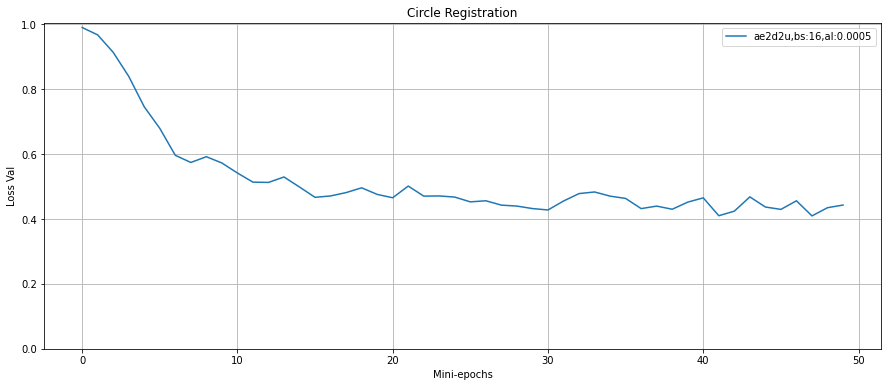

In [9]:
train_datas1 = np.load("griddata/ae2d2u-train-bs32.npy")
names1 = np.load("griddata/ae2d2u-names-bs32.npy")

compare_lines(train_datas1, names1)

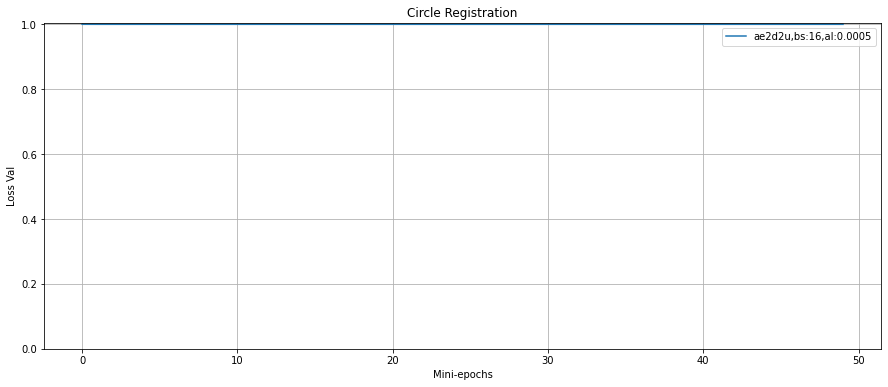

In [10]:
val_datas1 = np.load("griddata/ae2d2u-val-bs32.npy")

compare_lines(val_datas1, names1)

In [7]:
nf_enc = [128, 128, 128, 128, 128]
nf_dec = [256, 256, 256, 256, 128, 128]

train_datas2, val_datas2, names2 = run_gridsearch(mod_name="vox4d4u",
                                                   vol_s=vol_size, 
                                                   nf_e=nf_enc, 
                                                   nf_d=nf_dec,
                                                   alpha_list=alphas, 
                                                   batch_list=batch_sizes, 
                                                   num_iters=iterations)

np.save("griddata/vox4d4u-train-bs32",train_datas2)
np.save("griddata/vox4d4u-val-bs32",val_datas2)
np.save("griddata/vox4d4u-names-bs32",names2)

Train Epoch: 0 | Loss: 0.027121 | Reconstruction Loss: 0.027121 | Dice Score: 0.964416
Val Epoch: 0 | Dice Score: 0.999901
Val Epoch: 1 | Dice Score: 0.999901


/nfs02/users/vib9/anaconda3/envs/sln/lib/python3.6/site-packages/torch/nn/functional.py:3226: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


Val Epoch: 2 | Dice Score: 0.999901
Val Epoch: 3 | Dice Score: 0.999901
Val Epoch: 4 | Dice Score: 0.999901
Val Epoch: 5 | Dice Score: 0.999901
Val Epoch: 6 | Dice Score: 0.999901
Val Epoch: 7 | Dice Score: 0.999901
Val Epoch: 8 | Dice Score: 0.999901
Val Epoch: 9 | Dice Score: 0.999901
Val Epoch: 10 | Dice Score: 0.999901
Val Epoch: 11 | Dice Score: 0.999901
Val Epoch: 12 | Dice Score: 0.999901
Val Epoch: 13 | Dice Score: 0.999901
Val Epoch: 14 | Dice Score: 0.999901
Val Epoch: 15 | Dice Score: 0.999901
Val Epoch: 16 | Dice Score: 0.999901
Val Epoch: 17 | Dice Score: 0.999901
Val Epoch: 18 | Dice Score: 0.999901
Val Epoch: 19 | Dice Score: 0.999901
Val Epoch: 20 | Dice Score: 0.999901
Val Epoch: 21 | Dice Score: 0.999901
Val Epoch: 22 | Dice Score: 0.999901
Val Epoch: 23 | Dice Score: 0.999901
Val Epoch: 24 | Dice Score: 0.999901
Val Epoch: 25 | Dice Score: 0.999901
Val Epoch: 26 | Dice Score: 0.999901
Val Epoch: 27 | Dice Score: 0.999901
Val Epoch: 28 | Dice Score: 0.999901
Val Epoch

Train Epoch: 69 | Loss: 0.014536 | Reconstruction Loss: 0.014163 | Dice Score: 0.897110
Train Epoch: 70 | Loss: 0.015241 | Reconstruction Loss: 0.014844 | Dice Score: 0.961378
Train Epoch: 71 | Loss: 0.015185 | Reconstruction Loss: 0.014797 | Dice Score: 0.958270
Train Epoch: 72 | Loss: 0.014779 | Reconstruction Loss: 0.014438 | Dice Score: 0.943432
Train Epoch: 73 | Loss: 0.013683 | Reconstruction Loss: 0.013399 | Dice Score: 0.844377
Train Epoch: 74 | Loss: 0.015014 | Reconstruction Loss: 0.014667 | Dice Score: 0.917302
Train Epoch: 75 | Loss: 0.014058 | Reconstruction Loss: 0.013700 | Dice Score: 0.862498
Train Epoch: 76 | Loss: 0.015388 | Reconstruction Loss: 0.015014 | Dice Score: 0.976392
Train Epoch: 77 | Loss: 0.014487 | Reconstruction Loss: 0.014143 | Dice Score: 0.891012
Train Epoch: 78 | Loss: 0.014442 | Reconstruction Loss: 0.014040 | Dice Score: 0.869028
Train Epoch: 79 | Loss: 0.013370 | Reconstruction Loss: 0.012938 | Dice Score: 0.767375
Train Epoch: 80 | Loss: 0.013534

Train Epoch: 149 | Loss: 0.015771 | Reconstruction Loss: 0.015135 | Dice Score: 0.950801
Train Epoch: 150 | Loss: 0.013633 | Reconstruction Loss: 0.013042 | Dice Score: 0.868996
Train Epoch: 151 | Loss: 0.013218 | Reconstruction Loss: 0.012627 | Dice Score: 0.700791
Train Epoch: 152 | Loss: 0.011195 | Reconstruction Loss: 0.010491 | Dice Score: 0.543615
Train Epoch: 153 | Loss: 0.014099 | Reconstruction Loss: 0.013073 | Dice Score: 0.711920
Train Epoch: 154 | Loss: 0.011729 | Reconstruction Loss: 0.010695 | Dice Score: 0.601029
Train Epoch: 155 | Loss: 0.012457 | Reconstruction Loss: 0.011707 | Dice Score: 0.649551
Train Epoch: 156 | Loss: 0.011305 | Reconstruction Loss: 0.010606 | Dice Score: 0.608331
Train Epoch: 157 | Loss: 0.012418 | Reconstruction Loss: 0.011845 | Dice Score: 0.602787
Train Epoch: 158 | Loss: 0.011554 | Reconstruction Loss: 0.010503 | Dice Score: 0.560847
Train Epoch: 159 | Loss: 0.009466 | Reconstruction Loss: 0.008516 | Dice Score: 0.460810
Train Epoch: 160 | Lo

Train Epoch: 228 | Loss: 0.008835 | Reconstruction Loss: 0.007884 | Dice Score: 0.374630
Train Epoch: 229 | Loss: 0.012725 | Reconstruction Loss: 0.011618 | Dice Score: 0.735314
Train Epoch: 230 | Loss: 0.010083 | Reconstruction Loss: 0.009119 | Dice Score: 0.464592
Train Epoch: 231 | Loss: 0.009706 | Reconstruction Loss: 0.008640 | Dice Score: 0.458703
Train Epoch: 232 | Loss: 0.011918 | Reconstruction Loss: 0.010719 | Dice Score: 0.637643
Train Epoch: 233 | Loss: 0.008263 | Reconstruction Loss: 0.007117 | Dice Score: 0.329820
Train Epoch: 234 | Loss: 0.012081 | Reconstruction Loss: 0.010684 | Dice Score: 0.640219
Train Epoch: 235 | Loss: 0.007746 | Reconstruction Loss: 0.006542 | Dice Score: 0.298638
Train Epoch: 236 | Loss: 0.010751 | Reconstruction Loss: 0.009261 | Dice Score: 0.476157
Train Epoch: 237 | Loss: 0.009576 | Reconstruction Loss: 0.008212 | Dice Score: 0.417621
Train Epoch: 238 | Loss: 0.013732 | Reconstruction Loss: 0.012592 | Dice Score: 0.767015
Train Epoch: 239 | Lo

Train Epoch: 307 | Loss: 0.007420 | Reconstruction Loss: 0.006167 | Dice Score: 0.310567
Train Epoch: 308 | Loss: 0.007715 | Reconstruction Loss: 0.006162 | Dice Score: 0.272366
Train Epoch: 309 | Loss: 0.006736 | Reconstruction Loss: 0.005560 | Dice Score: 0.276562
Train Epoch: 310 | Loss: 0.009722 | Reconstruction Loss: 0.008329 | Dice Score: 0.398941
Train Epoch: 311 | Loss: 0.009379 | Reconstruction Loss: 0.008046 | Dice Score: 0.427528
Train Epoch: 312 | Loss: 0.008985 | Reconstruction Loss: 0.007403 | Dice Score: 0.316402
Train Epoch: 313 | Loss: 0.007219 | Reconstruction Loss: 0.006209 | Dice Score: 0.252325
Train Epoch: 314 | Loss: 0.008888 | Reconstruction Loss: 0.007789 | Dice Score: 0.388262
Train Epoch: 315 | Loss: 0.009213 | Reconstruction Loss: 0.008060 | Dice Score: 0.416498
Train Epoch: 316 | Loss: 0.009307 | Reconstruction Loss: 0.008007 | Dice Score: 0.440856
Train Epoch: 317 | Loss: 0.008304 | Reconstruction Loss: 0.006658 | Dice Score: 0.313723
Train Epoch: 318 | Lo

Val Epoch: 3 | Dice Score: 0.999804
Val Epoch: 4 | Dice Score: 0.999804
Val Epoch: 5 | Dice Score: 0.962949
Val Epoch: 6 | Dice Score: 0.917103
Val Epoch: 7 | Dice Score: 0.893188
Val Epoch: 8 | Dice Score: 0.902979
Val Epoch: 9 | Dice Score: 0.999804
Val Epoch: 10 | Dice Score: 0.944698
Val Epoch: 11 | Dice Score: 0.873378
Val Epoch: 12 | Dice Score: 0.999804
Val Epoch: 13 | Dice Score: 0.999804
Val Epoch: 14 | Dice Score: 0.999804
Val Epoch: 15 | Dice Score: 0.999804
Val Epoch: 16 | Dice Score: 0.999804
Val Epoch: 17 | Dice Score: 0.999804
Val Epoch: 18 | Dice Score: 0.999804
Val Epoch: 19 | Dice Score: 0.853336
Val Epoch: 20 | Dice Score: 0.999804
Val Epoch: 21 | Dice Score: 0.999804
Val Epoch: 22 | Dice Score: 0.954285
Val Epoch: 23 | Dice Score: 0.925556
Val Epoch: 24 | Dice Score: 0.973557
Val Epoch: 25 | Dice Score: 0.963703
Val Epoch: 26 | Dice Score: 0.999804
Val Epoch: 27 | Dice Score: 0.999804
Val Epoch: 28 | Dice Score: 0.963312
Val Epoch: 29 | Dice Score: 0.978135
Val Epoc

Train Epoch: 452 | Loss: 0.008060 | Reconstruction Loss: 0.006887 | Dice Score: 0.319197
Train Epoch: 453 | Loss: 0.009374 | Reconstruction Loss: 0.007978 | Dice Score: 0.349226
Train Epoch: 454 | Loss: 0.008636 | Reconstruction Loss: 0.007252 | Dice Score: 0.322036
Train Epoch: 455 | Loss: 0.006791 | Reconstruction Loss: 0.005493 | Dice Score: 0.253746
Train Epoch: 456 | Loss: 0.008103 | Reconstruction Loss: 0.007092 | Dice Score: 0.365711
Train Epoch: 457 | Loss: 0.009354 | Reconstruction Loss: 0.008259 | Dice Score: 0.454204
Train Epoch: 458 | Loss: 0.007943 | Reconstruction Loss: 0.006954 | Dice Score: 0.356087
Train Epoch: 459 | Loss: 0.007658 | Reconstruction Loss: 0.006506 | Dice Score: 0.283635
Train Epoch: 460 | Loss: 0.009171 | Reconstruction Loss: 0.007546 | Dice Score: 0.406769
Train Epoch: 461 | Loss: 0.008105 | Reconstruction Loss: 0.007026 | Dice Score: 0.351382
Train Epoch: 462 | Loss: 0.007021 | Reconstruction Loss: 0.005714 | Dice Score: 0.247911
Train Epoch: 463 | Lo

Train Epoch: 531 | Loss: 0.006355 | Reconstruction Loss: 0.005222 | Dice Score: 0.233468
Train Epoch: 532 | Loss: 0.004415 | Reconstruction Loss: 0.003192 | Dice Score: 0.106240
Train Epoch: 533 | Loss: 0.005147 | Reconstruction Loss: 0.003723 | Dice Score: 0.172852
Train Epoch: 534 | Loss: 0.005451 | Reconstruction Loss: 0.003824 | Dice Score: 0.159883
Train Epoch: 535 | Loss: 0.004788 | Reconstruction Loss: 0.003557 | Dice Score: 0.144760
Train Epoch: 536 | Loss: 0.005735 | Reconstruction Loss: 0.004711 | Dice Score: 0.271642
Train Epoch: 537 | Loss: 0.004092 | Reconstruction Loss: 0.003142 | Dice Score: 0.152816
Train Epoch: 538 | Loss: 0.004124 | Reconstruction Loss: 0.003051 | Dice Score: 0.139549
Train Epoch: 539 | Loss: 0.005894 | Reconstruction Loss: 0.004215 | Dice Score: 0.178659
Train Epoch: 540 | Loss: 0.006965 | Reconstruction Loss: 0.005626 | Dice Score: 0.264990
Train Epoch: 541 | Loss: 0.004468 | Reconstruction Loss: 0.003468 | Dice Score: 0.155714
Train Epoch: 542 | Lo

Train Epoch: 610 | Loss: 0.004369 | Reconstruction Loss: 0.003196 | Dice Score: 0.136260
Train Epoch: 611 | Loss: 0.005339 | Reconstruction Loss: 0.004204 | Dice Score: 0.161144
Train Epoch: 612 | Loss: 0.006101 | Reconstruction Loss: 0.004536 | Dice Score: 0.195887
Train Epoch: 613 | Loss: 0.005302 | Reconstruction Loss: 0.003754 | Dice Score: 0.148921
Train Epoch: 614 | Loss: 0.004389 | Reconstruction Loss: 0.003219 | Dice Score: 0.129632
Train Epoch: 615 | Loss: 0.004063 | Reconstruction Loss: 0.003116 | Dice Score: 0.123609
Train Epoch: 616 | Loss: 0.004302 | Reconstruction Loss: 0.003421 | Dice Score: 0.155391
Train Epoch: 617 | Loss: 0.006133 | Reconstruction Loss: 0.004936 | Dice Score: 0.238756
Train Epoch: 618 | Loss: 0.004587 | Reconstruction Loss: 0.003246 | Dice Score: 0.127662
Train Epoch: 619 | Loss: 0.008934 | Reconstruction Loss: 0.007139 | Dice Score: 0.310387
Train Epoch: 620 | Loss: 0.006608 | Reconstruction Loss: 0.005260 | Dice Score: 0.232416
Train Epoch: 621 | Lo

Train Epoch: 689 | Loss: 0.007062 | Reconstruction Loss: 0.005647 | Dice Score: 0.281990
Train Epoch: 690 | Loss: 0.005168 | Reconstruction Loss: 0.003910 | Dice Score: 0.167865
Train Epoch: 691 | Loss: 0.005791 | Reconstruction Loss: 0.004178 | Dice Score: 0.161378
Train Epoch: 692 | Loss: 0.006490 | Reconstruction Loss: 0.005246 | Dice Score: 0.261344
Train Epoch: 693 | Loss: 0.006346 | Reconstruction Loss: 0.005068 | Dice Score: 0.202537
Train Epoch: 694 | Loss: 0.007157 | Reconstruction Loss: 0.005427 | Dice Score: 0.248223
Train Epoch: 695 | Loss: 0.005892 | Reconstruction Loss: 0.004680 | Dice Score: 0.203365
Train Epoch: 696 | Loss: 0.005236 | Reconstruction Loss: 0.004000 | Dice Score: 0.180546
Train Epoch: 697 | Loss: 0.005755 | Reconstruction Loss: 0.004254 | Dice Score: 0.163534
Train Epoch: 698 | Loss: 0.005908 | Reconstruction Loss: 0.004739 | Dice Score: 0.199768
Train Epoch: 699 | Loss: 0.006758 | Reconstruction Loss: 0.005515 | Dice Score: 0.261072
Train Epoch: 700 | Lo

Train Epoch: 768 | Loss: 0.005396 | Reconstruction Loss: 0.003672 | Dice Score: 0.163975
Val Epoch: 0 | Dice Score: 0.736815
Val Epoch: 1 | Dice Score: 0.756423
Val Epoch: 2 | Dice Score: 0.754769
Val Epoch: 3 | Dice Score: 0.735044
Val Epoch: 4 | Dice Score: 0.608064
Val Epoch: 5 | Dice Score: 0.788542
Val Epoch: 6 | Dice Score: 0.638255
Val Epoch: 7 | Dice Score: 0.806903
Val Epoch: 8 | Dice Score: 0.785873
Val Epoch: 9 | Dice Score: 0.832673
Val Epoch: 10 | Dice Score: 0.656726
Val Epoch: 11 | Dice Score: 0.714076
Val Epoch: 12 | Dice Score: 0.828914
Val Epoch: 13 | Dice Score: 0.702356
Val Epoch: 14 | Dice Score: 0.807594
Val Epoch: 15 | Dice Score: 0.733432
Val Epoch: 16 | Dice Score: 0.756236
Val Epoch: 17 | Dice Score: 0.660556
Val Epoch: 18 | Dice Score: 0.787603
Val Epoch: 19 | Dice Score: 0.606888
Val Epoch: 20 | Dice Score: 0.822149
Val Epoch: 21 | Dice Score: 0.755976
Val Epoch: 22 | Dice Score: 0.678227
Val Epoch: 23 | Dice Score: 0.704053
Val Epoch: 24 | Dice Score: 0.695

Train Epoch: 834 | Loss: 0.005874 | Reconstruction Loss: 0.004510 | Dice Score: 0.208283
Train Epoch: 835 | Loss: 0.003906 | Reconstruction Loss: 0.002809 | Dice Score: 0.113053
Train Epoch: 836 | Loss: 0.005182 | Reconstruction Loss: 0.003860 | Dice Score: 0.149115
Train Epoch: 837 | Loss: 0.004349 | Reconstruction Loss: 0.002964 | Dice Score: 0.114089
Train Epoch: 838 | Loss: 0.004047 | Reconstruction Loss: 0.002981 | Dice Score: 0.115193
Train Epoch: 839 | Loss: 0.007029 | Reconstruction Loss: 0.005749 | Dice Score: 0.254581
Train Epoch: 840 | Loss: 0.004853 | Reconstruction Loss: 0.003631 | Dice Score: 0.148782
Train Epoch: 841 | Loss: 0.006095 | Reconstruction Loss: 0.004782 | Dice Score: 0.194474
Train Epoch: 842 | Loss: 0.004098 | Reconstruction Loss: 0.002816 | Dice Score: 0.121092
Train Epoch: 843 | Loss: 0.004292 | Reconstruction Loss: 0.003226 | Dice Score: 0.172357
Train Epoch: 844 | Loss: 0.004183 | Reconstruction Loss: 0.002820 | Dice Score: 0.114224
Train Epoch: 845 | Lo

Train Epoch: 913 | Loss: 0.005219 | Reconstruction Loss: 0.003393 | Dice Score: 0.118512
Train Epoch: 914 | Loss: 0.004132 | Reconstruction Loss: 0.002784 | Dice Score: 0.090883
Train Epoch: 915 | Loss: 0.004446 | Reconstruction Loss: 0.003235 | Dice Score: 0.131499
Train Epoch: 916 | Loss: 0.003662 | Reconstruction Loss: 0.002659 | Dice Score: 0.087390
Train Epoch: 917 | Loss: 0.005611 | Reconstruction Loss: 0.004333 | Dice Score: 0.178458
Train Epoch: 918 | Loss: 0.004964 | Reconstruction Loss: 0.003675 | Dice Score: 0.152185
Train Epoch: 919 | Loss: 0.004215 | Reconstruction Loss: 0.002724 | Dice Score: 0.091100
Train Epoch: 920 | Loss: 0.005420 | Reconstruction Loss: 0.003743 | Dice Score: 0.154958
Train Epoch: 921 | Loss: 0.003426 | Reconstruction Loss: 0.002313 | Dice Score: 0.081245
Train Epoch: 922 | Loss: 0.003856 | Reconstruction Loss: 0.002563 | Dice Score: 0.087888
Train Epoch: 923 | Loss: 0.005024 | Reconstruction Loss: 0.003545 | Dice Score: 0.146379
Train Epoch: 924 | Lo

Train Epoch: 992 | Loss: 0.005626 | Reconstruction Loss: 0.004092 | Dice Score: 0.190154
Train Epoch: 993 | Loss: 0.004714 | Reconstruction Loss: 0.003363 | Dice Score: 0.143462
Train Epoch: 994 | Loss: 0.005616 | Reconstruction Loss: 0.004577 | Dice Score: 0.244815
Train Epoch: 995 | Loss: 0.004696 | Reconstruction Loss: 0.003526 | Dice Score: 0.193792
Train Epoch: 996 | Loss: 0.004736 | Reconstruction Loss: 0.003380 | Dice Score: 0.192729
Train Epoch: 997 | Loss: 0.006050 | Reconstruction Loss: 0.004601 | Dice Score: 0.213584
Train Epoch: 998 | Loss: 0.005877 | Reconstruction Loss: 0.004480 | Dice Score: 0.201875
Train Epoch: 999 | Loss: 0.004574 | Reconstruction Loss: 0.003269 | Dice Score: 0.147900
Train Epoch: 1000 | Loss: 0.004527 | Reconstruction Loss: 0.003160 | Dice Score: 0.138236
Train Epoch: 1001 | Loss: 0.004530 | Reconstruction Loss: 0.003385 | Dice Score: 0.149569
Train Epoch: 1002 | Loss: 0.004247 | Reconstruction Loss: 0.003014 | Dice Score: 0.127738
Train Epoch: 1003 

Train Epoch: 1071 | Loss: 0.003558 | Reconstruction Loss: 0.002338 | Dice Score: 0.083997
Train Epoch: 1072 | Loss: 0.003850 | Reconstruction Loss: 0.002378 | Dice Score: 0.082278
Train Epoch: 1073 | Loss: 0.004316 | Reconstruction Loss: 0.003034 | Dice Score: 0.132389
Train Epoch: 1074 | Loss: 0.003630 | Reconstruction Loss: 0.002334 | Dice Score: 0.077172
Train Epoch: 1075 | Loss: 0.004033 | Reconstruction Loss: 0.002779 | Dice Score: 0.103888
Train Epoch: 1076 | Loss: 0.003107 | Reconstruction Loss: 0.001974 | Dice Score: 0.054963
Train Epoch: 1077 | Loss: 0.004018 | Reconstruction Loss: 0.002841 | Dice Score: 0.086097
Train Epoch: 1078 | Loss: 0.003022 | Reconstruction Loss: 0.002057 | Dice Score: 0.063418
Train Epoch: 1079 | Loss: 0.004009 | Reconstruction Loss: 0.002529 | Dice Score: 0.097838
Train Epoch: 1080 | Loss: 0.003489 | Reconstruction Loss: 0.002484 | Dice Score: 0.105408
Train Epoch: 1081 | Loss: 0.003554 | Reconstruction Loss: 0.002210 | Dice Score: 0.069875
Train Epoc

Train Epoch: 1149 | Loss: 0.004446 | Reconstruction Loss: 0.003101 | Dice Score: 0.128729
Train Epoch: 1150 | Loss: 0.005637 | Reconstruction Loss: 0.004265 | Dice Score: 0.193265
Train Epoch: 1151 | Loss: 0.005808 | Reconstruction Loss: 0.004196 | Dice Score: 0.197782
Train Epoch: 1152 | Loss: 0.003828 | Reconstruction Loss: 0.002535 | Dice Score: 0.095310
Val Epoch: 0 | Dice Score: 0.788547
Val Epoch: 1 | Dice Score: 0.688472
Val Epoch: 2 | Dice Score: 0.822557
Val Epoch: 3 | Dice Score: 0.807699
Val Epoch: 4 | Dice Score: 0.804092
Val Epoch: 5 | Dice Score: 0.695093
Val Epoch: 6 | Dice Score: 0.674109
Val Epoch: 7 | Dice Score: 0.829494
Val Epoch: 8 | Dice Score: 0.918519
Val Epoch: 9 | Dice Score: 0.683538
Val Epoch: 10 | Dice Score: 0.666473
Val Epoch: 11 | Dice Score: 0.812480
Val Epoch: 12 | Dice Score: 0.660055
Val Epoch: 13 | Dice Score: 0.644989
Val Epoch: 14 | Dice Score: 0.646998
Val Epoch: 15 | Dice Score: 0.720312
Val Epoch: 16 | Dice Score: 0.579085
Val Epoch: 17 | Dice 

Val Epoch: 25 | Dice Score: 0.410141
Val Epoch: 26 | Dice Score: 0.270399
Val Epoch: 27 | Dice Score: 0.308471
Val Epoch: 28 | Dice Score: 0.395938
Val Epoch: 29 | Dice Score: 0.354953
Val Epoch: 30 | Dice Score: 0.289965
Val Epoch: 31 | Dice Score: 0.536611
Train Epoch: 1217 | Loss: 0.003572 | Reconstruction Loss: 0.002366 | Dice Score: 0.100482
Train Epoch: 1218 | Loss: 0.003947 | Reconstruction Loss: 0.002698 | Dice Score: 0.119357
Train Epoch: 1219 | Loss: 0.003645 | Reconstruction Loss: 0.002393 | Dice Score: 0.084104
Train Epoch: 1220 | Loss: 0.004197 | Reconstruction Loss: 0.002787 | Dice Score: 0.117229
Train Epoch: 1221 | Loss: 0.003900 | Reconstruction Loss: 0.002364 | Dice Score: 0.076945
Train Epoch: 1222 | Loss: 0.003027 | Reconstruction Loss: 0.002055 | Dice Score: 0.071001
Train Epoch: 1223 | Loss: 0.003805 | Reconstruction Loss: 0.002458 | Dice Score: 0.091460
Train Epoch: 1224 | Loss: 0.003848 | Reconstruction Loss: 0.002671 | Dice Score: 0.112062
Train Epoch: 1225 | L

Train Epoch: 1293 | Loss: 0.005255 | Reconstruction Loss: 0.003969 | Dice Score: 0.188133
Train Epoch: 1294 | Loss: 0.004870 | Reconstruction Loss: 0.003823 | Dice Score: 0.217627
Train Epoch: 1295 | Loss: 0.004853 | Reconstruction Loss: 0.003404 | Dice Score: 0.128001
Train Epoch: 1296 | Loss: 0.003591 | Reconstruction Loss: 0.002508 | Dice Score: 0.105851
Train Epoch: 1297 | Loss: 0.004239 | Reconstruction Loss: 0.003061 | Dice Score: 0.136434
Train Epoch: 1298 | Loss: 0.003593 | Reconstruction Loss: 0.002640 | Dice Score: 0.117934
Train Epoch: 1299 | Loss: 0.005656 | Reconstruction Loss: 0.004633 | Dice Score: 0.228283
Train Epoch: 1300 | Loss: 0.003913 | Reconstruction Loss: 0.003002 | Dice Score: 0.147364
Train Epoch: 1301 | Loss: 0.007523 | Reconstruction Loss: 0.006314 | Dice Score: 0.335036
Train Epoch: 1302 | Loss: 0.005696 | Reconstruction Loss: 0.004554 | Dice Score: 0.239112
Train Epoch: 1303 | Loss: 0.005663 | Reconstruction Loss: 0.004254 | Dice Score: 0.201422
Train Epoc

Train Epoch: 1371 | Loss: 0.003680 | Reconstruction Loss: 0.002463 | Dice Score: 0.095111
Train Epoch: 1372 | Loss: 0.003713 | Reconstruction Loss: 0.002200 | Dice Score: 0.080791
Train Epoch: 1373 | Loss: 0.003485 | Reconstruction Loss: 0.002281 | Dice Score: 0.103610
Train Epoch: 1374 | Loss: 0.003923 | Reconstruction Loss: 0.002776 | Dice Score: 0.139123
Train Epoch: 1375 | Loss: 0.003195 | Reconstruction Loss: 0.002106 | Dice Score: 0.076413
Train Epoch: 1376 | Loss: 0.003147 | Reconstruction Loss: 0.002030 | Dice Score: 0.072622
Train Epoch: 1377 | Loss: 0.003426 | Reconstruction Loss: 0.002248 | Dice Score: 0.076519
Train Epoch: 1378 | Loss: 0.002923 | Reconstruction Loss: 0.001936 | Dice Score: 0.064825
Train Epoch: 1379 | Loss: 0.003534 | Reconstruction Loss: 0.002315 | Dice Score: 0.090787
Train Epoch: 1380 | Loss: 0.003982 | Reconstruction Loss: 0.002344 | Dice Score: 0.081457
Train Epoch: 1381 | Loss: 0.002849 | Reconstruction Loss: 0.001921 | Dice Score: 0.070281
Train Epoc

Train Epoch: 1449 | Loss: 0.003326 | Reconstruction Loss: 0.002167 | Dice Score: 0.062873
Train Epoch: 1450 | Loss: 0.004051 | Reconstruction Loss: 0.002517 | Dice Score: 0.075974
Train Epoch: 1451 | Loss: 0.004078 | Reconstruction Loss: 0.002721 | Dice Score: 0.102690
Train Epoch: 1452 | Loss: 0.004079 | Reconstruction Loss: 0.002822 | Dice Score: 0.104007
Train Epoch: 1453 | Loss: 0.003832 | Reconstruction Loss: 0.002638 | Dice Score: 0.105920
Train Epoch: 1454 | Loss: 0.004076 | Reconstruction Loss: 0.002778 | Dice Score: 0.118269
Train Epoch: 1455 | Loss: 0.003548 | Reconstruction Loss: 0.002324 | Dice Score: 0.081073
Train Epoch: 1456 | Loss: 0.002750 | Reconstruction Loss: 0.001938 | Dice Score: 0.063211
Train Epoch: 1457 | Loss: 0.004047 | Reconstruction Loss: 0.002514 | Dice Score: 0.085085
Train Epoch: 1458 | Loss: 0.003713 | Reconstruction Loss: 0.002625 | Dice Score: 0.104396
Train Epoch: 1459 | Loss: 0.003820 | Reconstruction Loss: 0.002619 | Dice Score: 0.111010
Train Epoc

Train Epoch: 1527 | Loss: 0.003196 | Reconstruction Loss: 0.002046 | Dice Score: 0.075081
Train Epoch: 1528 | Loss: 0.003431 | Reconstruction Loss: 0.002246 | Dice Score: 0.084592
Train Epoch: 1529 | Loss: 0.003508 | Reconstruction Loss: 0.002225 | Dice Score: 0.083606
Train Epoch: 1530 | Loss: 0.003496 | Reconstruction Loss: 0.002219 | Dice Score: 0.075487
Train Epoch: 1531 | Loss: 0.002960 | Reconstruction Loss: 0.001979 | Dice Score: 0.070977
Train Epoch: 1532 | Loss: 0.003741 | Reconstruction Loss: 0.002440 | Dice Score: 0.100738
Train Epoch: 1533 | Loss: 0.003330 | Reconstruction Loss: 0.002245 | Dice Score: 0.088265
Train Epoch: 1534 | Loss: 0.003288 | Reconstruction Loss: 0.002096 | Dice Score: 0.069466
Train Epoch: 1535 | Loss: 0.002833 | Reconstruction Loss: 0.001976 | Dice Score: 0.074928
Train Epoch: 1536 | Loss: 0.004356 | Reconstruction Loss: 0.002932 | Dice Score: 0.104062
Val Epoch: 0 | Dice Score: 0.585060
Val Epoch: 1 | Dice Score: 0.452825
Val Epoch: 2 | Dice Score: 0

Val Epoch: 10 | Dice Score: 0.908938
Val Epoch: 11 | Dice Score: 0.750593
Val Epoch: 12 | Dice Score: 0.812150
Val Epoch: 13 | Dice Score: 0.708743
Val Epoch: 14 | Dice Score: 0.668188
Val Epoch: 15 | Dice Score: 0.774952
Val Epoch: 16 | Dice Score: 0.816265
Val Epoch: 17 | Dice Score: 0.719218
Val Epoch: 18 | Dice Score: 0.999804
Val Epoch: 19 | Dice Score: 0.802927
Val Epoch: 20 | Dice Score: 0.617085
Val Epoch: 21 | Dice Score: 0.593823
Val Epoch: 22 | Dice Score: 0.823750
Val Epoch: 23 | Dice Score: 0.829434
Val Epoch: 24 | Dice Score: 0.823896
Val Epoch: 25 | Dice Score: 0.792274
Val Epoch: 26 | Dice Score: 0.802003
Val Epoch: 27 | Dice Score: 0.738260
Val Epoch: 28 | Dice Score: 0.686949
Val Epoch: 29 | Dice Score: 0.721138
Val Epoch: 30 | Dice Score: 0.870962
Val Epoch: 31 | Dice Score: 0.866703
Train Epoch: 1601 | Loss: 0.003567 | Reconstruction Loss: 0.002487 | Dice Score: 0.093962
Train Epoch: 1602 | Loss: 0.004020 | Reconstruction Loss: 0.002893 | Dice Score: 0.128644
Train 

Train Epoch: 1670 | Loss: 0.003821 | Reconstruction Loss: 0.002534 | Dice Score: 0.106907
Train Epoch: 1671 | Loss: 0.003471 | Reconstruction Loss: 0.002242 | Dice Score: 0.085313
Train Epoch: 1672 | Loss: 0.003250 | Reconstruction Loss: 0.002095 | Dice Score: 0.070835
Train Epoch: 1673 | Loss: 0.004236 | Reconstruction Loss: 0.002900 | Dice Score: 0.131590
Train Epoch: 1674 | Loss: 0.003776 | Reconstruction Loss: 0.002614 | Dice Score: 0.110128
Train Epoch: 1675 | Loss: 0.003824 | Reconstruction Loss: 0.002613 | Dice Score: 0.109464
Train Epoch: 1676 | Loss: 0.003859 | Reconstruction Loss: 0.002924 | Dice Score: 0.130566
Train Epoch: 1677 | Loss: 0.005448 | Reconstruction Loss: 0.004126 | Dice Score: 0.192609
Train Epoch: 1678 | Loss: 0.003245 | Reconstruction Loss: 0.002303 | Dice Score: 0.096290
Train Epoch: 1679 | Loss: 0.004072 | Reconstruction Loss: 0.003018 | Dice Score: 0.155882
Train Epoch: 1680 | Loss: 0.003528 | Reconstruction Loss: 0.002609 | Dice Score: 0.120174
Train Epoc

Train Epoch: 1748 | Loss: 0.003641 | Reconstruction Loss: 0.002436 | Dice Score: 0.091188
Train Epoch: 1749 | Loss: 0.002847 | Reconstruction Loss: 0.001912 | Dice Score: 0.058627
Train Epoch: 1750 | Loss: 0.003473 | Reconstruction Loss: 0.002215 | Dice Score: 0.065826
Train Epoch: 1751 | Loss: 0.004116 | Reconstruction Loss: 0.002699 | Dice Score: 0.117920
Train Epoch: 1752 | Loss: 0.003100 | Reconstruction Loss: 0.002038 | Dice Score: 0.061807
Train Epoch: 1753 | Loss: 0.003416 | Reconstruction Loss: 0.002265 | Dice Score: 0.091805
Train Epoch: 1754 | Loss: 0.003662 | Reconstruction Loss: 0.002530 | Dice Score: 0.111984
Train Epoch: 1755 | Loss: 0.003419 | Reconstruction Loss: 0.002322 | Dice Score: 0.099675
Train Epoch: 1756 | Loss: 0.003015 | Reconstruction Loss: 0.001994 | Dice Score: 0.069819
Train Epoch: 1757 | Loss: 0.003214 | Reconstruction Loss: 0.002114 | Dice Score: 0.068760
Train Epoch: 1758 | Loss: 0.003459 | Reconstruction Loss: 0.002424 | Dice Score: 0.110371
Train Epoc

Train Epoch: 1826 | Loss: 0.004007 | Reconstruction Loss: 0.002780 | Dice Score: 0.131134
Train Epoch: 1827 | Loss: 0.003293 | Reconstruction Loss: 0.002191 | Dice Score: 0.085567
Train Epoch: 1828 | Loss: 0.003213 | Reconstruction Loss: 0.002155 | Dice Score: 0.081352
Train Epoch: 1829 | Loss: 0.003479 | Reconstruction Loss: 0.002504 | Dice Score: 0.121142
Train Epoch: 1830 | Loss: 0.003596 | Reconstruction Loss: 0.002311 | Dice Score: 0.096181
Train Epoch: 1831 | Loss: 0.004068 | Reconstruction Loss: 0.002787 | Dice Score: 0.099342
Train Epoch: 1832 | Loss: 0.003588 | Reconstruction Loss: 0.002222 | Dice Score: 0.089294
Train Epoch: 1833 | Loss: 0.004653 | Reconstruction Loss: 0.003536 | Dice Score: 0.179916
Train Epoch: 1834 | Loss: 0.003493 | Reconstruction Loss: 0.002560 | Dice Score: 0.113139
Train Epoch: 1835 | Loss: 0.002460 | Reconstruction Loss: 0.001780 | Dice Score: 0.064561
Train Epoch: 1836 | Loss: 0.002745 | Reconstruction Loss: 0.001855 | Dice Score: 0.061032
Train Epoc

Train Epoch: 1904 | Loss: 0.003524 | Reconstruction Loss: 0.002532 | Dice Score: 0.099465
Train Epoch: 1905 | Loss: 0.004152 | Reconstruction Loss: 0.002874 | Dice Score: 0.109802
Train Epoch: 1906 | Loss: 0.003026 | Reconstruction Loss: 0.002118 | Dice Score: 0.094206
Train Epoch: 1907 | Loss: 0.003685 | Reconstruction Loss: 0.002570 | Dice Score: 0.117430
Train Epoch: 1908 | Loss: 0.003511 | Reconstruction Loss: 0.002449 | Dice Score: 0.104032
Train Epoch: 1909 | Loss: 0.003385 | Reconstruction Loss: 0.002588 | Dice Score: 0.106947
Train Epoch: 1910 | Loss: 0.003568 | Reconstruction Loss: 0.002693 | Dice Score: 0.116701
Train Epoch: 1911 | Loss: 0.003622 | Reconstruction Loss: 0.002649 | Dice Score: 0.115501
Train Epoch: 1912 | Loss: 0.005128 | Reconstruction Loss: 0.003776 | Dice Score: 0.142171
Train Epoch: 1913 | Loss: 0.003863 | Reconstruction Loss: 0.002561 | Dice Score: 0.110586
Train Epoch: 1914 | Loss: 0.003528 | Reconstruction Loss: 0.002266 | Dice Score: 0.087853
Train Epoc

Train Epoch: 1982 | Loss: 0.004015 | Reconstruction Loss: 0.002776 | Dice Score: 0.113609
Train Epoch: 1983 | Loss: 0.004207 | Reconstruction Loss: 0.003181 | Dice Score: 0.159179
Train Epoch: 1984 | Loss: 0.002829 | Reconstruction Loss: 0.001944 | Dice Score: 0.064800
Val Epoch: 0 | Dice Score: 0.257200
Val Epoch: 1 | Dice Score: 0.349599
Val Epoch: 2 | Dice Score: 0.310140
Val Epoch: 3 | Dice Score: 0.221205
Val Epoch: 4 | Dice Score: 0.357455
Val Epoch: 5 | Dice Score: 0.239262
Val Epoch: 6 | Dice Score: 0.355145
Val Epoch: 7 | Dice Score: 0.309854
Val Epoch: 8 | Dice Score: 0.261945
Val Epoch: 9 | Dice Score: 0.359230
Val Epoch: 10 | Dice Score: 0.239686
Val Epoch: 11 | Dice Score: 0.319022
Val Epoch: 12 | Dice Score: 0.246942
Val Epoch: 13 | Dice Score: 0.302024
Val Epoch: 14 | Dice Score: 0.290699
Val Epoch: 15 | Dice Score: 0.285052
Val Epoch: 16 | Dice Score: 0.225524
Val Epoch: 17 | Dice Score: 0.204968
Val Epoch: 18 | Dice Score: 0.172544
Val Epoch: 19 | Dice Score: 0.172433


Val Epoch: 27 | Dice Score: 0.316293
Val Epoch: 28 | Dice Score: 0.494484
Val Epoch: 29 | Dice Score: 0.350011
Val Epoch: 30 | Dice Score: 0.294008
Val Epoch: 31 | Dice Score: 0.412476
Train Epoch: 2049 | Loss: 0.003616 | Reconstruction Loss: 0.002354 | Dice Score: 0.099216
Train Epoch: 2050 | Loss: 0.004219 | Reconstruction Loss: 0.002944 | Dice Score: 0.136466
Train Epoch: 2051 | Loss: 0.003463 | Reconstruction Loss: 0.002410 | Dice Score: 0.107277
Train Epoch: 2052 | Loss: 0.002862 | Reconstruction Loss: 0.001996 | Dice Score: 0.077936
Train Epoch: 2053 | Loss: 0.003692 | Reconstruction Loss: 0.002551 | Dice Score: 0.104775
Train Epoch: 2054 | Loss: 0.004034 | Reconstruction Loss: 0.002763 | Dice Score: 0.115705
Train Epoch: 2055 | Loss: 0.003892 | Reconstruction Loss: 0.002859 | Dice Score: 0.132731
Train Epoch: 2056 | Loss: 0.004772 | Reconstruction Loss: 0.003654 | Dice Score: 0.223215
Train Epoch: 2057 | Loss: 0.003107 | Reconstruction Loss: 0.002052 | Dice Score: 0.075873
Train

Train Epoch: 2125 | Loss: 0.002928 | Reconstruction Loss: 0.001956 | Dice Score: 0.069611
Train Epoch: 2126 | Loss: 0.003235 | Reconstruction Loss: 0.002053 | Dice Score: 0.072726
Train Epoch: 2127 | Loss: 0.002851 | Reconstruction Loss: 0.001929 | Dice Score: 0.063256
Train Epoch: 2128 | Loss: 0.002897 | Reconstruction Loss: 0.002096 | Dice Score: 0.087501
Train Epoch: 2129 | Loss: 0.003561 | Reconstruction Loss: 0.002316 | Dice Score: 0.089032
Train Epoch: 2130 | Loss: 0.003179 | Reconstruction Loss: 0.002067 | Dice Score: 0.073211
Train Epoch: 2131 | Loss: 0.003077 | Reconstruction Loss: 0.002008 | Dice Score: 0.076000
Train Epoch: 2132 | Loss: 0.003922 | Reconstruction Loss: 0.002681 | Dice Score: 0.118386
Train Epoch: 2133 | Loss: 0.002879 | Reconstruction Loss: 0.002063 | Dice Score: 0.088386
Train Epoch: 2134 | Loss: 0.003210 | Reconstruction Loss: 0.002331 | Dice Score: 0.103159
Train Epoch: 2135 | Loss: 0.003010 | Reconstruction Loss: 0.001972 | Dice Score: 0.064878
Train Epoc

Train Epoch: 2203 | Loss: 0.006081 | Reconstruction Loss: 0.004793 | Dice Score: 0.234809
Train Epoch: 2204 | Loss: 0.003737 | Reconstruction Loss: 0.002742 | Dice Score: 0.115249
Train Epoch: 2205 | Loss: 0.004368 | Reconstruction Loss: 0.003189 | Dice Score: 0.158542
Train Epoch: 2206 | Loss: 0.002981 | Reconstruction Loss: 0.002242 | Dice Score: 0.097007
Train Epoch: 2207 | Loss: 0.003801 | Reconstruction Loss: 0.002636 | Dice Score: 0.108609
Train Epoch: 2208 | Loss: 0.004024 | Reconstruction Loss: 0.002856 | Dice Score: 0.118963
Train Epoch: 2209 | Loss: 0.003793 | Reconstruction Loss: 0.002612 | Dice Score: 0.100623
Train Epoch: 2210 | Loss: 0.004436 | Reconstruction Loss: 0.003371 | Dice Score: 0.180980
Train Epoch: 2211 | Loss: 0.003389 | Reconstruction Loss: 0.002271 | Dice Score: 0.072462
Train Epoch: 2212 | Loss: 0.003245 | Reconstruction Loss: 0.002263 | Dice Score: 0.092740
Train Epoch: 2213 | Loss: 0.004222 | Reconstruction Loss: 0.003049 | Dice Score: 0.140385
Train Epoc

Train Epoch: 2281 | Loss: 0.003358 | Reconstruction Loss: 0.002253 | Dice Score: 0.076485
Train Epoch: 2282 | Loss: 0.003201 | Reconstruction Loss: 0.002228 | Dice Score: 0.071225
Train Epoch: 2283 | Loss: 0.004472 | Reconstruction Loss: 0.003021 | Dice Score: 0.128882
Train Epoch: 2284 | Loss: 0.003246 | Reconstruction Loss: 0.002247 | Dice Score: 0.087076
Train Epoch: 2285 | Loss: 0.004237 | Reconstruction Loss: 0.003284 | Dice Score: 0.169733
Train Epoch: 2286 | Loss: 0.003315 | Reconstruction Loss: 0.002254 | Dice Score: 0.080206
Train Epoch: 2287 | Loss: 0.003470 | Reconstruction Loss: 0.002313 | Dice Score: 0.084519
Train Epoch: 2288 | Loss: 0.003216 | Reconstruction Loss: 0.002243 | Dice Score: 0.087890
Train Epoch: 2289 | Loss: 0.003213 | Reconstruction Loss: 0.002279 | Dice Score: 0.101987
Train Epoch: 2290 | Loss: 0.003215 | Reconstruction Loss: 0.002152 | Dice Score: 0.075911
Train Epoch: 2291 | Loss: 0.003323 | Reconstruction Loss: 0.002236 | Dice Score: 0.077814
Train Epoc

Train Epoch: 2359 | Loss: 0.003102 | Reconstruction Loss: 0.002146 | Dice Score: 0.078702
Train Epoch: 2360 | Loss: 0.003353 | Reconstruction Loss: 0.002291 | Dice Score: 0.076803
Train Epoch: 2361 | Loss: 0.003399 | Reconstruction Loss: 0.002351 | Dice Score: 0.095545
Train Epoch: 2362 | Loss: 0.003644 | Reconstruction Loss: 0.002702 | Dice Score: 0.117131
Train Epoch: 2363 | Loss: 0.004500 | Reconstruction Loss: 0.003005 | Dice Score: 0.134271
Train Epoch: 2364 | Loss: 0.003391 | Reconstruction Loss: 0.002272 | Dice Score: 0.092690
Train Epoch: 2365 | Loss: 0.003825 | Reconstruction Loss: 0.002582 | Dice Score: 0.121913
Train Epoch: 2366 | Loss: 0.003648 | Reconstruction Loss: 0.002615 | Dice Score: 0.125239
Train Epoch: 2367 | Loss: 0.003516 | Reconstruction Loss: 0.002551 | Dice Score: 0.116998
Train Epoch: 2368 | Loss: 0.003528 | Reconstruction Loss: 0.002540 | Dice Score: 0.106527
Val Epoch: 0 | Dice Score: 0.253281
Val Epoch: 1 | Dice Score: 0.438262
Val Epoch: 2 | Dice Score: 0

Val Epoch: 10 | Dice Score: 0.293329
Val Epoch: 11 | Dice Score: 0.393397
Val Epoch: 12 | Dice Score: 0.329147
Val Epoch: 13 | Dice Score: 0.320455
Val Epoch: 14 | Dice Score: 0.297778
Val Epoch: 15 | Dice Score: 0.204412
Val Epoch: 16 | Dice Score: 0.330042
Val Epoch: 17 | Dice Score: 0.211331
Val Epoch: 18 | Dice Score: 0.351322
Val Epoch: 19 | Dice Score: 0.327554
Val Epoch: 20 | Dice Score: 0.341178
Val Epoch: 21 | Dice Score: 0.423834
Val Epoch: 22 | Dice Score: 0.301130
Val Epoch: 23 | Dice Score: 0.292209
Val Epoch: 24 | Dice Score: 0.359036
Val Epoch: 25 | Dice Score: 0.434879
Val Epoch: 26 | Dice Score: 0.237710
Val Epoch: 27 | Dice Score: 0.233658
Val Epoch: 28 | Dice Score: 0.386367
Val Epoch: 29 | Dice Score: 0.314296
Val Epoch: 30 | Dice Score: 0.320039
Val Epoch: 31 | Dice Score: 0.282370
Train Epoch: 2433 | Loss: 0.003275 | Reconstruction Loss: 0.002113 | Dice Score: 0.081550
Train Epoch: 2434 | Loss: 0.003477 | Reconstruction Loss: 0.002273 | Dice Score: 0.100779
Train 

Train Epoch: 2502 | Loss: 0.004836 | Reconstruction Loss: 0.003894 | Dice Score: 0.210893
Train Epoch: 2503 | Loss: 0.004251 | Reconstruction Loss: 0.003493 | Dice Score: 0.177128
Train Epoch: 2504 | Loss: 0.006795 | Reconstruction Loss: 0.005699 | Dice Score: 0.298244
Train Epoch: 2505 | Loss: 0.006496 | Reconstruction Loss: 0.005137 | Dice Score: 0.246282
Train Epoch: 2506 | Loss: 0.004170 | Reconstruction Loss: 0.003161 | Dice Score: 0.153721
Train Epoch: 2507 | Loss: 0.004475 | Reconstruction Loss: 0.003227 | Dice Score: 0.128694
Train Epoch: 2508 | Loss: 0.004164 | Reconstruction Loss: 0.002897 | Dice Score: 0.136986
Train Epoch: 2509 | Loss: 0.003720 | Reconstruction Loss: 0.002548 | Dice Score: 0.105494
Train Epoch: 2510 | Loss: 0.003380 | Reconstruction Loss: 0.002462 | Dice Score: 0.100632
Train Epoch: 2511 | Loss: 0.003556 | Reconstruction Loss: 0.002590 | Dice Score: 0.107150
Train Epoch: 2512 | Loss: 0.004919 | Reconstruction Loss: 0.003886 | Dice Score: 0.174140
Train Epoc

Train Epoch: 2580 | Loss: 0.003383 | Reconstruction Loss: 0.002301 | Dice Score: 0.076409
Train Epoch: 2581 | Loss: 0.003364 | Reconstruction Loss: 0.002449 | Dice Score: 0.088084
Train Epoch: 2582 | Loss: 0.004634 | Reconstruction Loss: 0.003292 | Dice Score: 0.126053
Train Epoch: 2583 | Loss: 0.003316 | Reconstruction Loss: 0.002405 | Dice Score: 0.097800
Train Epoch: 2584 | Loss: 0.004566 | Reconstruction Loss: 0.003331 | Dice Score: 0.172899
Train Epoch: 2585 | Loss: 0.004002 | Reconstruction Loss: 0.002837 | Dice Score: 0.104152
Train Epoch: 2586 | Loss: 0.002639 | Reconstruction Loss: 0.001840 | Dice Score: 0.061211
Train Epoch: 2587 | Loss: 0.003682 | Reconstruction Loss: 0.002498 | Dice Score: 0.102447
Train Epoch: 2588 | Loss: 0.003106 | Reconstruction Loss: 0.002231 | Dice Score: 0.072513
Train Epoch: 2589 | Loss: 0.004144 | Reconstruction Loss: 0.003001 | Dice Score: 0.122556
Train Epoch: 2590 | Loss: 0.003457 | Reconstruction Loss: 0.002354 | Dice Score: 0.083342
Train Epoc

Train Epoch: 2658 | Loss: 0.003253 | Reconstruction Loss: 0.002142 | Dice Score: 0.087551
Train Epoch: 2659 | Loss: 0.003184 | Reconstruction Loss: 0.002129 | Dice Score: 0.093949
Train Epoch: 2660 | Loss: 0.003268 | Reconstruction Loss: 0.002041 | Dice Score: 0.060325
Train Epoch: 2661 | Loss: 0.003238 | Reconstruction Loss: 0.002345 | Dice Score: 0.103408
Train Epoch: 2662 | Loss: 0.004445 | Reconstruction Loss: 0.003261 | Dice Score: 0.186728
Train Epoch: 2663 | Loss: 0.003729 | Reconstruction Loss: 0.002409 | Dice Score: 0.098512
Train Epoch: 2664 | Loss: 0.003101 | Reconstruction Loss: 0.002007 | Dice Score: 0.073505
Train Epoch: 2665 | Loss: 0.003273 | Reconstruction Loss: 0.002325 | Dice Score: 0.100583
Train Epoch: 2666 | Loss: 0.003295 | Reconstruction Loss: 0.002357 | Dice Score: 0.113641
Train Epoch: 2667 | Loss: 0.004086 | Reconstruction Loss: 0.002966 | Dice Score: 0.151463
Train Epoch: 2668 | Loss: 0.003262 | Reconstruction Loss: 0.002246 | Dice Score: 0.096784
Train Epoc

Train Epoch: 2736 | Loss: 0.002393 | Reconstruction Loss: 0.001750 | Dice Score: 0.054660
Train Epoch: 2737 | Loss: 0.003339 | Reconstruction Loss: 0.002283 | Dice Score: 0.090534
Train Epoch: 2738 | Loss: 0.003511 | Reconstruction Loss: 0.002411 | Dice Score: 0.097385
Train Epoch: 2739 | Loss: 0.003493 | Reconstruction Loss: 0.002274 | Dice Score: 0.080111
Train Epoch: 2740 | Loss: 0.002658 | Reconstruction Loss: 0.001828 | Dice Score: 0.055947
Train Epoch: 2741 | Loss: 0.003125 | Reconstruction Loss: 0.002214 | Dice Score: 0.092509
Train Epoch: 2742 | Loss: 0.003084 | Reconstruction Loss: 0.002081 | Dice Score: 0.071642
Train Epoch: 2743 | Loss: 0.003110 | Reconstruction Loss: 0.002028 | Dice Score: 0.070939
Train Epoch: 2744 | Loss: 0.003507 | Reconstruction Loss: 0.002375 | Dice Score: 0.091530
Train Epoch: 2745 | Loss: 0.002836 | Reconstruction Loss: 0.001917 | Dice Score: 0.069896
Train Epoch: 2746 | Loss: 0.003167 | Reconstruction Loss: 0.002170 | Dice Score: 0.090743
Train Epoc

Train Epoch: 2814 | Loss: 0.003618 | Reconstruction Loss: 0.002712 | Dice Score: 0.130730
Train Epoch: 2815 | Loss: 0.003547 | Reconstruction Loss: 0.002642 | Dice Score: 0.114477
Train Epoch: 2816 | Loss: 0.004468 | Reconstruction Loss: 0.003426 | Dice Score: 0.179321
Val Epoch: 0 | Dice Score: 0.109553
Val Epoch: 1 | Dice Score: 0.199386
Val Epoch: 2 | Dice Score: 0.163202
Val Epoch: 3 | Dice Score: 0.153571
Val Epoch: 4 | Dice Score: 0.182067
Val Epoch: 5 | Dice Score: 0.177058
Val Epoch: 6 | Dice Score: 0.076048
Val Epoch: 7 | Dice Score: 0.165470
Val Epoch: 8 | Dice Score: 0.078223
Val Epoch: 9 | Dice Score: 0.168528
Val Epoch: 10 | Dice Score: 0.181859
Val Epoch: 11 | Dice Score: 0.163615
Val Epoch: 12 | Dice Score: 0.126414
Val Epoch: 13 | Dice Score: 0.129973
Val Epoch: 14 | Dice Score: 0.111429
Val Epoch: 15 | Dice Score: 0.139401
Val Epoch: 16 | Dice Score: 0.148490
Val Epoch: 17 | Dice Score: 0.200473
Val Epoch: 18 | Dice Score: 0.185826
Val Epoch: 19 | Dice Score: 0.133376


Val Epoch: 27 | Dice Score: 0.677393
Val Epoch: 28 | Dice Score: 0.434365
Val Epoch: 29 | Dice Score: 0.555404
Val Epoch: 30 | Dice Score: 0.524907
Val Epoch: 31 | Dice Score: 0.601705
Train Epoch: 2881 | Loss: 0.004020 | Reconstruction Loss: 0.003034 | Dice Score: 0.152256
Train Epoch: 2882 | Loss: 0.003712 | Reconstruction Loss: 0.002639 | Dice Score: 0.116826
Train Epoch: 2883 | Loss: 0.003363 | Reconstruction Loss: 0.002347 | Dice Score: 0.100962
Train Epoch: 2884 | Loss: 0.003626 | Reconstruction Loss: 0.002373 | Dice Score: 0.092311
Train Epoch: 2885 | Loss: 0.002852 | Reconstruction Loss: 0.002021 | Dice Score: 0.079913
Train Epoch: 2886 | Loss: 0.004319 | Reconstruction Loss: 0.003379 | Dice Score: 0.150445
Train Epoch: 2887 | Loss: 0.003524 | Reconstruction Loss: 0.002414 | Dice Score: 0.090051
Train Epoch: 2888 | Loss: 0.003331 | Reconstruction Loss: 0.002128 | Dice Score: 0.071379
Train Epoch: 2889 | Loss: 0.002915 | Reconstruction Loss: 0.001914 | Dice Score: 0.056321
Train

Train Epoch: 2957 | Loss: 0.003828 | Reconstruction Loss: 0.002711 | Dice Score: 0.106724
Train Epoch: 2958 | Loss: 0.004241 | Reconstruction Loss: 0.003147 | Dice Score: 0.128264
Train Epoch: 2959 | Loss: 0.004309 | Reconstruction Loss: 0.003062 | Dice Score: 0.130636
Train Epoch: 2960 | Loss: 0.004655 | Reconstruction Loss: 0.003765 | Dice Score: 0.206262
Train Epoch: 2961 | Loss: 0.004470 | Reconstruction Loss: 0.003303 | Dice Score: 0.165716
Train Epoch: 2962 | Loss: 0.003820 | Reconstruction Loss: 0.002647 | Dice Score: 0.122960
Train Epoch: 2963 | Loss: 0.003471 | Reconstruction Loss: 0.002502 | Dice Score: 0.111594
Train Epoch: 2964 | Loss: 0.005111 | Reconstruction Loss: 0.003957 | Dice Score: 0.193619
Train Epoch: 2965 | Loss: 0.003728 | Reconstruction Loss: 0.002688 | Dice Score: 0.121884
Train Epoch: 2966 | Loss: 0.003738 | Reconstruction Loss: 0.002644 | Dice Score: 0.112548
Train Epoch: 2967 | Loss: 0.003758 | Reconstruction Loss: 0.002768 | Dice Score: 0.126888
Train Epoc

Train Epoch: 3035 | Loss: 0.003234 | Reconstruction Loss: 0.002167 | Dice Score: 0.081456
Train Epoch: 3036 | Loss: 0.003091 | Reconstruction Loss: 0.002092 | Dice Score: 0.081616
Train Epoch: 3037 | Loss: 0.002693 | Reconstruction Loss: 0.001784 | Dice Score: 0.050378
Train Epoch: 3038 | Loss: 0.002892 | Reconstruction Loss: 0.002032 | Dice Score: 0.076759
Train Epoch: 3039 | Loss: 0.003562 | Reconstruction Loss: 0.002337 | Dice Score: 0.095998
Train Epoch: 3040 | Loss: 0.003684 | Reconstruction Loss: 0.002607 | Dice Score: 0.117324
Train Epoch: 3041 | Loss: 0.003952 | Reconstruction Loss: 0.002829 | Dice Score: 0.110055
Train Epoch: 3042 | Loss: 0.002824 | Reconstruction Loss: 0.002044 | Dice Score: 0.084188
Train Epoch: 3043 | Loss: 0.003358 | Reconstruction Loss: 0.002320 | Dice Score: 0.101453
Train Epoch: 3044 | Loss: 0.003701 | Reconstruction Loss: 0.002736 | Dice Score: 0.145532
Train Epoch: 3045 | Loss: 0.003101 | Reconstruction Loss: 0.002002 | Dice Score: 0.072916
Train Epoc

Train Epoch: 3113 | Loss: 0.003823 | Reconstruction Loss: 0.002790 | Dice Score: 0.126010
Train Epoch: 3114 | Loss: 0.004443 | Reconstruction Loss: 0.003230 | Dice Score: 0.151645
Train Epoch: 3115 | Loss: 0.003005 | Reconstruction Loss: 0.002155 | Dice Score: 0.090045
Train Epoch: 3116 | Loss: 0.004876 | Reconstruction Loss: 0.003594 | Dice Score: 0.186450
Train Epoch: 3117 | Loss: 0.002785 | Reconstruction Loss: 0.001965 | Dice Score: 0.072105
Train Epoch: 3118 | Loss: 0.003332 | Reconstruction Loss: 0.002253 | Dice Score: 0.095138
Train Epoch: 3119 | Loss: 0.003294 | Reconstruction Loss: 0.002160 | Dice Score: 0.078843
Train Epoch: 3120 | Loss: 0.003289 | Reconstruction Loss: 0.002126 | Dice Score: 0.067815
Train Epoch: 3121 | Loss: 0.003574 | Reconstruction Loss: 0.002273 | Dice Score: 0.078245
Train Epoch: 3122 | Loss: 0.003073 | Reconstruction Loss: 0.002147 | Dice Score: 0.086917
Train Epoch: 3123 | Loss: 0.004755 | Reconstruction Loss: 0.003551 | Dice Score: 0.157017
Train Epoc

Train Epoch: 3191 | Loss: 0.003241 | Reconstruction Loss: 0.002295 | Dice Score: 0.088543
Train Epoch: 3192 | Loss: 0.003453 | Reconstruction Loss: 0.002588 | Dice Score: 0.129311
Train Epoch: 3193 | Loss: 0.003310 | Reconstruction Loss: 0.002354 | Dice Score: 0.110128
Train Epoch: 3194 | Loss: 0.003314 | Reconstruction Loss: 0.002230 | Dice Score: 0.077507
Train Epoch: 3195 | Loss: 0.002850 | Reconstruction Loss: 0.001919 | Dice Score: 0.065325
Train Epoch: 3196 | Loss: 0.002799 | Reconstruction Loss: 0.001944 | Dice Score: 0.072690
Train Epoch: 3197 | Loss: 0.003302 | Reconstruction Loss: 0.002240 | Dice Score: 0.090629
Train Epoch: 3198 | Loss: 0.003253 | Reconstruction Loss: 0.002187 | Dice Score: 0.078151
Train Epoch: 3199 | Loss: 0.003267 | Reconstruction Loss: 0.002094 | Dice Score: 0.073932


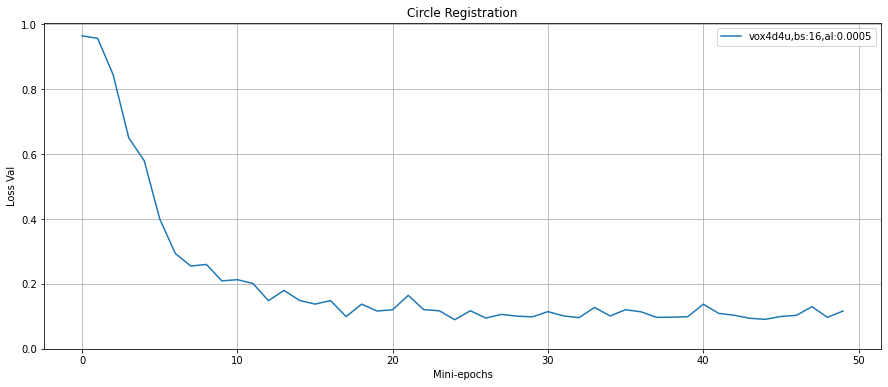

In [8]:
train_datas2 = np.load("griddata/vox4d4u-train-bs32.npy")
names2 = np.load("griddata/vox4d4u-names-bs32.npy")

compare_lines(train_datas2, names2)

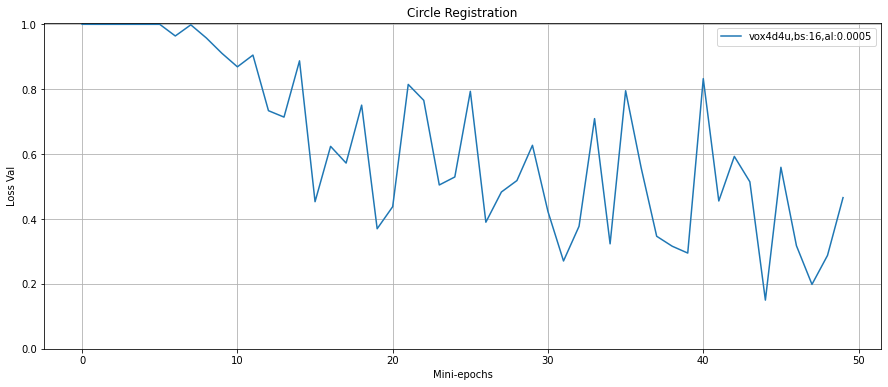

In [9]:
val_datas2 = np.load("griddata/vox4d4u-val-bs32.npy")

compare_lines(val_datas2, names2)

In [10]:
nf_enc = [128, 128, 128]
nf_dec = [256, 256, 128 ,128]

train_datas3, val_datas3, names3 = run_gridsearch(mod_name="vox2d2u",
                                                   vol_s=vol_size, 
                                                   nf_e=nf_enc, 
                                                   nf_d=nf_dec, 
                                                   alpha_list=alphas, 
                                                   batch_list=batch_sizes, 
                                                   num_iters=iterations)

np.save("griddata/vox2d2u-train-bs32",train_datas3)
np.save("griddata/vox2d2u-val-bs32",val_datas3)
np.save("griddata/vox2d2u-names-bs32",names3)

Train Epoch: 0 | Loss: 0.025630 | Reconstruction Loss: 0.025630 | Dice Score: 0.930113
Val Epoch: 0 | Dice Score: 0.999901
Val Epoch: 1 | Dice Score: 0.999901


/nfs02/users/vib9/anaconda3/envs/sln/lib/python3.6/site-packages/torch/nn/functional.py:3226: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


Val Epoch: 2 | Dice Score: 0.999901
Val Epoch: 3 | Dice Score: 0.999901
Val Epoch: 4 | Dice Score: 0.999901
Val Epoch: 5 | Dice Score: 0.999901
Val Epoch: 6 | Dice Score: 0.999901
Val Epoch: 7 | Dice Score: 0.999901
Val Epoch: 8 | Dice Score: 0.999901
Val Epoch: 9 | Dice Score: 0.999901
Val Epoch: 10 | Dice Score: 0.999901
Val Epoch: 11 | Dice Score: 0.999901
Val Epoch: 12 | Dice Score: 0.999901
Val Epoch: 13 | Dice Score: 0.999901
Val Epoch: 14 | Dice Score: 0.999901
Val Epoch: 15 | Dice Score: 0.999901
Val Epoch: 16 | Dice Score: 0.999901
Val Epoch: 17 | Dice Score: 0.999901
Val Epoch: 18 | Dice Score: 0.999901
Val Epoch: 19 | Dice Score: 0.999901
Val Epoch: 20 | Dice Score: 0.999901
Val Epoch: 21 | Dice Score: 0.999901
Val Epoch: 22 | Dice Score: 0.999901
Val Epoch: 23 | Dice Score: 0.999901
Val Epoch: 24 | Dice Score: 0.999901
Val Epoch: 25 | Dice Score: 0.999901
Val Epoch: 26 | Dice Score: 0.999901
Val Epoch: 27 | Dice Score: 0.999901
Val Epoch: 28 | Dice Score: 0.999901
Val Epoch

Train Epoch: 69 | Loss: 0.015555 | Reconstruction Loss: 0.015210 | Dice Score: 0.967558
Train Epoch: 70 | Loss: 0.015086 | Reconstruction Loss: 0.014711 | Dice Score: 0.980291
Train Epoch: 71 | Loss: 0.015714 | Reconstruction Loss: 0.015321 | Dice Score: 0.999807
Train Epoch: 72 | Loss: 0.015782 | Reconstruction Loss: 0.015405 | Dice Score: 0.999806
Train Epoch: 73 | Loss: 0.015451 | Reconstruction Loss: 0.015113 | Dice Score: 0.984014
Train Epoch: 74 | Loss: 0.014055 | Reconstruction Loss: 0.013776 | Dice Score: 0.846682
Train Epoch: 75 | Loss: 0.014363 | Reconstruction Loss: 0.014056 | Dice Score: 0.855359
Train Epoch: 76 | Loss: 0.014219 | Reconstruction Loss: 0.013885 | Dice Score: 0.868488
Train Epoch: 77 | Loss: 0.015824 | Reconstruction Loss: 0.015423 | Dice Score: 0.999805
Train Epoch: 78 | Loss: 0.015321 | Reconstruction Loss: 0.014955 | Dice Score: 0.955342
Train Epoch: 79 | Loss: 0.015116 | Reconstruction Loss: 0.014784 | Dice Score: 0.958349
Train Epoch: 80 | Loss: 0.015880

Train Epoch: 149 | Loss: 0.013700 | Reconstruction Loss: 0.013243 | Dice Score: 0.772423
Train Epoch: 150 | Loss: 0.013621 | Reconstruction Loss: 0.013117 | Dice Score: 0.745966
Train Epoch: 151 | Loss: 0.014645 | Reconstruction Loss: 0.014026 | Dice Score: 0.853803
Train Epoch: 152 | Loss: 0.010132 | Reconstruction Loss: 0.009543 | Dice Score: 0.495216
Train Epoch: 153 | Loss: 0.014114 | Reconstruction Loss: 0.013596 | Dice Score: 0.792192
Train Epoch: 154 | Loss: 0.014449 | Reconstruction Loss: 0.014002 | Dice Score: 0.828337
Train Epoch: 155 | Loss: 0.015317 | Reconstruction Loss: 0.014735 | Dice Score: 0.932422
Train Epoch: 156 | Loss: 0.014868 | Reconstruction Loss: 0.014178 | Dice Score: 0.882705
Train Epoch: 157 | Loss: 0.014091 | Reconstruction Loss: 0.013404 | Dice Score: 0.795206
Train Epoch: 158 | Loss: 0.014485 | Reconstruction Loss: 0.013850 | Dice Score: 0.851022
Train Epoch: 159 | Loss: 0.015335 | Reconstruction Loss: 0.014802 | Dice Score: 0.909862
Train Epoch: 160 | Lo

Train Epoch: 228 | Loss: 0.014237 | Reconstruction Loss: 0.013670 | Dice Score: 0.792223
Train Epoch: 229 | Loss: 0.011570 | Reconstruction Loss: 0.011083 | Dice Score: 0.558025
Train Epoch: 230 | Loss: 0.014670 | Reconstruction Loss: 0.014138 | Dice Score: 0.840333
Train Epoch: 231 | Loss: 0.013411 | Reconstruction Loss: 0.012740 | Dice Score: 0.730441
Train Epoch: 232 | Loss: 0.012113 | Reconstruction Loss: 0.011384 | Dice Score: 0.615903
Train Epoch: 233 | Loss: 0.013268 | Reconstruction Loss: 0.012643 | Dice Score: 0.706114
Train Epoch: 234 | Loss: 0.012108 | Reconstruction Loss: 0.011536 | Dice Score: 0.605350
Train Epoch: 235 | Loss: 0.012004 | Reconstruction Loss: 0.011431 | Dice Score: 0.559281
Train Epoch: 236 | Loss: 0.013473 | Reconstruction Loss: 0.012881 | Dice Score: 0.715225
Train Epoch: 237 | Loss: 0.012875 | Reconstruction Loss: 0.012141 | Dice Score: 0.670896
Train Epoch: 238 | Loss: 0.015008 | Reconstruction Loss: 0.014427 | Dice Score: 0.871786
Train Epoch: 239 | Lo

Train Epoch: 307 | Loss: 0.010359 | Reconstruction Loss: 0.009754 | Dice Score: 0.465503
Train Epoch: 308 | Loss: 0.013759 | Reconstruction Loss: 0.013178 | Dice Score: 0.740459
Train Epoch: 309 | Loss: 0.013238 | Reconstruction Loss: 0.012736 | Dice Score: 0.686463
Train Epoch: 310 | Loss: 0.010321 | Reconstruction Loss: 0.009738 | Dice Score: 0.462507
Train Epoch: 311 | Loss: 0.013185 | Reconstruction Loss: 0.012633 | Dice Score: 0.722288
Train Epoch: 312 | Loss: 0.011822 | Reconstruction Loss: 0.011250 | Dice Score: 0.573922
Train Epoch: 313 | Loss: 0.012119 | Reconstruction Loss: 0.011446 | Dice Score: 0.588102
Train Epoch: 314 | Loss: 0.011111 | Reconstruction Loss: 0.010350 | Dice Score: 0.520218
Train Epoch: 315 | Loss: 0.013882 | Reconstruction Loss: 0.013161 | Dice Score: 0.759828
Train Epoch: 316 | Loss: 0.012303 | Reconstruction Loss: 0.011647 | Dice Score: 0.636492
Train Epoch: 317 | Loss: 0.013988 | Reconstruction Loss: 0.013391 | Dice Score: 0.738060
Train Epoch: 318 | Lo

Val Epoch: 3 | Dice Score: 0.999804
Val Epoch: 4 | Dice Score: 0.999804
Val Epoch: 5 | Dice Score: 0.999804
Val Epoch: 6 | Dice Score: 0.999804
Val Epoch: 7 | Dice Score: 0.999804
Val Epoch: 8 | Dice Score: 0.999804
Val Epoch: 9 | Dice Score: 0.999804
Val Epoch: 10 | Dice Score: 0.999804
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.999804
Val Epoch: 13 | Dice Score: 0.999804
Val Epoch: 14 | Dice Score: 0.999804
Val Epoch: 15 | Dice Score: 0.999804
Val Epoch: 16 | Dice Score: 0.999804
Val Epoch: 17 | Dice Score: 0.999804
Val Epoch: 18 | Dice Score: 0.999804
Val Epoch: 19 | Dice Score: 0.999804
Val Epoch: 20 | Dice Score: 0.999804
Val Epoch: 21 | Dice Score: 0.999804
Val Epoch: 22 | Dice Score: 0.999804
Val Epoch: 23 | Dice Score: 0.999804
Val Epoch: 24 | Dice Score: 0.999804
Val Epoch: 25 | Dice Score: 0.999804
Val Epoch: 26 | Dice Score: 0.999804
Val Epoch: 27 | Dice Score: 0.999804
Val Epoch: 28 | Dice Score: 0.999804
Val Epoch: 29 | Dice Score: 0.999804
Val Epoc

Train Epoch: 452 | Loss: 0.011617 | Reconstruction Loss: 0.010847 | Dice Score: 0.538721
Train Epoch: 453 | Loss: 0.011821 | Reconstruction Loss: 0.011199 | Dice Score: 0.557407
Train Epoch: 454 | Loss: 0.011875 | Reconstruction Loss: 0.011125 | Dice Score: 0.569676
Train Epoch: 455 | Loss: 0.011545 | Reconstruction Loss: 0.010842 | Dice Score: 0.534757
Train Epoch: 456 | Loss: 0.009655 | Reconstruction Loss: 0.009035 | Dice Score: 0.403985
Train Epoch: 457 | Loss: 0.012563 | Reconstruction Loss: 0.011826 | Dice Score: 0.619397
Train Epoch: 458 | Loss: 0.012822 | Reconstruction Loss: 0.012032 | Dice Score: 0.642345
Train Epoch: 459 | Loss: 0.013829 | Reconstruction Loss: 0.013125 | Dice Score: 0.738071
Train Epoch: 460 | Loss: 0.011517 | Reconstruction Loss: 0.010872 | Dice Score: 0.532379
Train Epoch: 461 | Loss: 0.012579 | Reconstruction Loss: 0.011901 | Dice Score: 0.634349
Train Epoch: 462 | Loss: 0.008677 | Reconstruction Loss: 0.008047 | Dice Score: 0.400246
Train Epoch: 463 | Lo

Train Epoch: 531 | Loss: 0.013942 | Reconstruction Loss: 0.013414 | Dice Score: 0.775658
Train Epoch: 532 | Loss: 0.010283 | Reconstruction Loss: 0.009671 | Dice Score: 0.454132
Train Epoch: 533 | Loss: 0.011598 | Reconstruction Loss: 0.010960 | Dice Score: 0.555572
Train Epoch: 534 | Loss: 0.011198 | Reconstruction Loss: 0.010360 | Dice Score: 0.513747
Train Epoch: 535 | Loss: 0.010424 | Reconstruction Loss: 0.009766 | Dice Score: 0.460288
Train Epoch: 536 | Loss: 0.010517 | Reconstruction Loss: 0.009797 | Dice Score: 0.456955
Train Epoch: 537 | Loss: 0.014034 | Reconstruction Loss: 0.013321 | Dice Score: 0.756748
Train Epoch: 538 | Loss: 0.011880 | Reconstruction Loss: 0.011186 | Dice Score: 0.563564
Train Epoch: 539 | Loss: 0.010348 | Reconstruction Loss: 0.009606 | Dice Score: 0.451436
Train Epoch: 540 | Loss: 0.014248 | Reconstruction Loss: 0.013588 | Dice Score: 0.810290
Train Epoch: 541 | Loss: 0.010322 | Reconstruction Loss: 0.009565 | Dice Score: 0.479146
Train Epoch: 542 | Lo

Train Epoch: 610 | Loss: 0.012208 | Reconstruction Loss: 0.011620 | Dice Score: 0.601142
Train Epoch: 611 | Loss: 0.009698 | Reconstruction Loss: 0.009025 | Dice Score: 0.425875
Train Epoch: 612 | Loss: 0.012876 | Reconstruction Loss: 0.012230 | Dice Score: 0.652000
Train Epoch: 613 | Loss: 0.012612 | Reconstruction Loss: 0.011929 | Dice Score: 0.616330
Train Epoch: 614 | Loss: 0.009962 | Reconstruction Loss: 0.009268 | Dice Score: 0.434650
Train Epoch: 615 | Loss: 0.010234 | Reconstruction Loss: 0.009606 | Dice Score: 0.456431
Train Epoch: 616 | Loss: 0.013162 | Reconstruction Loss: 0.012460 | Dice Score: 0.682470
Train Epoch: 617 | Loss: 0.010452 | Reconstruction Loss: 0.009837 | Dice Score: 0.466130
Train Epoch: 618 | Loss: 0.010999 | Reconstruction Loss: 0.010293 | Dice Score: 0.489719
Train Epoch: 619 | Loss: 0.011869 | Reconstruction Loss: 0.011070 | Dice Score: 0.561834
Train Epoch: 620 | Loss: 0.012080 | Reconstruction Loss: 0.011171 | Dice Score: 0.557072
Train Epoch: 621 | Lo

Train Epoch: 689 | Loss: 0.012599 | Reconstruction Loss: 0.012039 | Dice Score: 0.661433
Train Epoch: 690 | Loss: 0.011594 | Reconstruction Loss: 0.010887 | Dice Score: 0.530043
Train Epoch: 691 | Loss: 0.013229 | Reconstruction Loss: 0.012492 | Dice Score: 0.672696
Train Epoch: 692 | Loss: 0.014679 | Reconstruction Loss: 0.014111 | Dice Score: 0.844177
Train Epoch: 693 | Loss: 0.010558 | Reconstruction Loss: 0.009944 | Dice Score: 0.479026
Train Epoch: 694 | Loss: 0.012037 | Reconstruction Loss: 0.011398 | Dice Score: 0.589022
Train Epoch: 695 | Loss: 0.009761 | Reconstruction Loss: 0.008972 | Dice Score: 0.408072
Train Epoch: 696 | Loss: 0.011584 | Reconstruction Loss: 0.010947 | Dice Score: 0.539968
Train Epoch: 697 | Loss: 0.012927 | Reconstruction Loss: 0.012295 | Dice Score: 0.653055
Train Epoch: 698 | Loss: 0.012640 | Reconstruction Loss: 0.012028 | Dice Score: 0.635276
Train Epoch: 699 | Loss: 0.012340 | Reconstruction Loss: 0.011625 | Dice Score: 0.617031
Train Epoch: 700 | Lo

Train Epoch: 768 | Loss: 0.008376 | Reconstruction Loss: 0.007688 | Dice Score: 0.329291
Val Epoch: 0 | Dice Score: 0.999805
Val Epoch: 1 | Dice Score: 0.999805
Val Epoch: 2 | Dice Score: 0.999805
Val Epoch: 3 | Dice Score: 0.999805
Val Epoch: 4 | Dice Score: 0.999805
Val Epoch: 5 | Dice Score: 0.999805
Val Epoch: 6 | Dice Score: 0.999805
Val Epoch: 7 | Dice Score: 0.999805
Val Epoch: 8 | Dice Score: 0.999804
Val Epoch: 9 | Dice Score: 0.999805
Val Epoch: 10 | Dice Score: 0.999805
Val Epoch: 11 | Dice Score: 0.999805
Val Epoch: 12 | Dice Score: 0.999805
Val Epoch: 13 | Dice Score: 0.999805
Val Epoch: 14 | Dice Score: 0.999805
Val Epoch: 15 | Dice Score: 0.999805
Val Epoch: 16 | Dice Score: 0.999805
Val Epoch: 17 | Dice Score: 0.999805
Val Epoch: 18 | Dice Score: 0.999805
Val Epoch: 19 | Dice Score: 0.999805
Val Epoch: 20 | Dice Score: 0.999805
Val Epoch: 21 | Dice Score: 0.999805
Val Epoch: 22 | Dice Score: 0.999805
Val Epoch: 23 | Dice Score: 0.999805
Val Epoch: 24 | Dice Score: 0.999

Train Epoch: 834 | Loss: 0.011232 | Reconstruction Loss: 0.010508 | Dice Score: 0.505356
Train Epoch: 835 | Loss: 0.010832 | Reconstruction Loss: 0.010165 | Dice Score: 0.483676
Train Epoch: 836 | Loss: 0.011307 | Reconstruction Loss: 0.010503 | Dice Score: 0.513432
Train Epoch: 837 | Loss: 0.012410 | Reconstruction Loss: 0.012010 | Dice Score: 0.632953
Train Epoch: 838 | Loss: 0.009330 | Reconstruction Loss: 0.008478 | Dice Score: 0.380502
Train Epoch: 839 | Loss: 0.011561 | Reconstruction Loss: 0.010791 | Dice Score: 0.527583
Train Epoch: 840 | Loss: 0.010883 | Reconstruction Loss: 0.010190 | Dice Score: 0.501458
Train Epoch: 841 | Loss: 0.011549 | Reconstruction Loss: 0.010987 | Dice Score: 0.549602
Train Epoch: 842 | Loss: 0.011530 | Reconstruction Loss: 0.010667 | Dice Score: 0.526972
Train Epoch: 843 | Loss: 0.011547 | Reconstruction Loss: 0.010855 | Dice Score: 0.557244
Train Epoch: 844 | Loss: 0.013929 | Reconstruction Loss: 0.013346 | Dice Score: 0.759762
Train Epoch: 845 | Lo

Train Epoch: 913 | Loss: 0.009093 | Reconstruction Loss: 0.008495 | Dice Score: 0.395482
Train Epoch: 914 | Loss: 0.013399 | Reconstruction Loss: 0.012746 | Dice Score: 0.727058
Train Epoch: 915 | Loss: 0.010284 | Reconstruction Loss: 0.009645 | Dice Score: 0.476719
Train Epoch: 916 | Loss: 0.010770 | Reconstruction Loss: 0.010011 | Dice Score: 0.506488
Train Epoch: 917 | Loss: 0.011057 | Reconstruction Loss: 0.010141 | Dice Score: 0.496501
Train Epoch: 918 | Loss: 0.008795 | Reconstruction Loss: 0.008106 | Dice Score: 0.355407
Train Epoch: 919 | Loss: 0.009356 | Reconstruction Loss: 0.008555 | Dice Score: 0.382280
Train Epoch: 920 | Loss: 0.011323 | Reconstruction Loss: 0.010413 | Dice Score: 0.542956
Train Epoch: 921 | Loss: 0.012634 | Reconstruction Loss: 0.011950 | Dice Score: 0.681833
Train Epoch: 922 | Loss: 0.010979 | Reconstruction Loss: 0.010313 | Dice Score: 0.517347
Train Epoch: 923 | Loss: 0.010924 | Reconstruction Loss: 0.010186 | Dice Score: 0.469464
Train Epoch: 924 | Lo

Train Epoch: 992 | Loss: 0.012951 | Reconstruction Loss: 0.012366 | Dice Score: 0.676201
Train Epoch: 993 | Loss: 0.007247 | Reconstruction Loss: 0.006481 | Dice Score: 0.283925
Train Epoch: 994 | Loss: 0.010919 | Reconstruction Loss: 0.010180 | Dice Score: 0.489341
Train Epoch: 995 | Loss: 0.013446 | Reconstruction Loss: 0.012824 | Dice Score: 0.706445
Train Epoch: 996 | Loss: 0.012689 | Reconstruction Loss: 0.012185 | Dice Score: 0.644627
Train Epoch: 997 | Loss: 0.009325 | Reconstruction Loss: 0.008520 | Dice Score: 0.378855
Train Epoch: 998 | Loss: 0.011205 | Reconstruction Loss: 0.010414 | Dice Score: 0.523802
Train Epoch: 999 | Loss: 0.008021 | Reconstruction Loss: 0.007247 | Dice Score: 0.320849
Train Epoch: 1000 | Loss: 0.009900 | Reconstruction Loss: 0.009145 | Dice Score: 0.425646
Train Epoch: 1001 | Loss: 0.009436 | Reconstruction Loss: 0.008718 | Dice Score: 0.378514
Train Epoch: 1002 | Loss: 0.013022 | Reconstruction Loss: 0.012317 | Dice Score: 0.660022
Train Epoch: 1003 

Train Epoch: 1071 | Loss: 0.010348 | Reconstruction Loss: 0.009706 | Dice Score: 0.464996
Train Epoch: 1072 | Loss: 0.009971 | Reconstruction Loss: 0.009345 | Dice Score: 0.434459
Train Epoch: 1073 | Loss: 0.007849 | Reconstruction Loss: 0.007039 | Dice Score: 0.298252
Train Epoch: 1074 | Loss: 0.009637 | Reconstruction Loss: 0.008745 | Dice Score: 0.396777
Train Epoch: 1075 | Loss: 0.011079 | Reconstruction Loss: 0.010343 | Dice Score: 0.504705
Train Epoch: 1076 | Loss: 0.009593 | Reconstruction Loss: 0.008880 | Dice Score: 0.407177
Train Epoch: 1077 | Loss: 0.011965 | Reconstruction Loss: 0.011250 | Dice Score: 0.568613
Train Epoch: 1078 | Loss: 0.009165 | Reconstruction Loss: 0.008302 | Dice Score: 0.369636
Train Epoch: 1079 | Loss: 0.012894 | Reconstruction Loss: 0.012054 | Dice Score: 0.665258
Train Epoch: 1080 | Loss: 0.011823 | Reconstruction Loss: 0.011101 | Dice Score: 0.554271
Train Epoch: 1081 | Loss: 0.012662 | Reconstruction Loss: 0.012072 | Dice Score: 0.631964
Train Epoc

Train Epoch: 1149 | Loss: 0.013228 | Reconstruction Loss: 0.012744 | Dice Score: 0.706612
Train Epoch: 1150 | Loss: 0.011890 | Reconstruction Loss: 0.011228 | Dice Score: 0.572269
Train Epoch: 1151 | Loss: 0.011124 | Reconstruction Loss: 0.010367 | Dice Score: 0.494642
Train Epoch: 1152 | Loss: 0.012746 | Reconstruction Loss: 0.012104 | Dice Score: 0.641689
Val Epoch: 0 | Dice Score: 0.999804
Val Epoch: 1 | Dice Score: 0.999804
Val Epoch: 2 | Dice Score: 0.999804
Val Epoch: 3 | Dice Score: 0.999804
Val Epoch: 4 | Dice Score: 0.999804
Val Epoch: 5 | Dice Score: 0.999804
Val Epoch: 6 | Dice Score: 0.999804
Val Epoch: 7 | Dice Score: 0.999804
Val Epoch: 8 | Dice Score: 0.999804
Val Epoch: 9 | Dice Score: 0.999804
Val Epoch: 10 | Dice Score: 0.999804
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.999804
Val Epoch: 13 | Dice Score: 0.999804
Val Epoch: 14 | Dice Score: 0.999804
Val Epoch: 15 | Dice Score: 0.999804
Val Epoch: 16 | Dice Score: 0.999804
Val Epoch: 17 | Dice 

Val Epoch: 25 | Dice Score: 0.999804
Val Epoch: 26 | Dice Score: 0.999804
Val Epoch: 27 | Dice Score: 0.999804
Val Epoch: 28 | Dice Score: 0.999804
Val Epoch: 29 | Dice Score: 0.999804
Val Epoch: 30 | Dice Score: 0.999804
Val Epoch: 31 | Dice Score: 0.999804
Train Epoch: 1217 | Loss: 0.009665 | Reconstruction Loss: 0.008934 | Dice Score: 0.409714
Train Epoch: 1218 | Loss: 0.008948 | Reconstruction Loss: 0.008297 | Dice Score: 0.368565
Train Epoch: 1219 | Loss: 0.010901 | Reconstruction Loss: 0.010181 | Dice Score: 0.493964
Train Epoch: 1220 | Loss: 0.007592 | Reconstruction Loss: 0.006897 | Dice Score: 0.288254
Train Epoch: 1221 | Loss: 0.010597 | Reconstruction Loss: 0.009786 | Dice Score: 0.458549
Train Epoch: 1222 | Loss: 0.011740 | Reconstruction Loss: 0.010927 | Dice Score: 0.558736
Train Epoch: 1223 | Loss: 0.012646 | Reconstruction Loss: 0.012067 | Dice Score: 0.635035
Train Epoch: 1224 | Loss: 0.009994 | Reconstruction Loss: 0.009189 | Dice Score: 0.431720
Train Epoch: 1225 | L

Train Epoch: 1293 | Loss: 0.009901 | Reconstruction Loss: 0.009143 | Dice Score: 0.425570
Train Epoch: 1294 | Loss: 0.012123 | Reconstruction Loss: 0.011177 | Dice Score: 0.574105
Train Epoch: 1295 | Loss: 0.011400 | Reconstruction Loss: 0.010533 | Dice Score: 0.513789
Train Epoch: 1296 | Loss: 0.013831 | Reconstruction Loss: 0.013200 | Dice Score: 0.738994
Train Epoch: 1297 | Loss: 0.009183 | Reconstruction Loss: 0.008450 | Dice Score: 0.375789
Train Epoch: 1298 | Loss: 0.009460 | Reconstruction Loss: 0.008663 | Dice Score: 0.402791
Train Epoch: 1299 | Loss: 0.009640 | Reconstruction Loss: 0.008765 | Dice Score: 0.403411
Train Epoch: 1300 | Loss: 0.011342 | Reconstruction Loss: 0.010703 | Dice Score: 0.538611
Train Epoch: 1301 | Loss: 0.010994 | Reconstruction Loss: 0.010439 | Dice Score: 0.507560
Train Epoch: 1302 | Loss: 0.010208 | Reconstruction Loss: 0.009359 | Dice Score: 0.440762
Train Epoch: 1303 | Loss: 0.010141 | Reconstruction Loss: 0.009394 | Dice Score: 0.435219
Train Epoc

Train Epoch: 1371 | Loss: 0.012111 | Reconstruction Loss: 0.011542 | Dice Score: 0.596346
Train Epoch: 1372 | Loss: 0.011670 | Reconstruction Loss: 0.011082 | Dice Score: 0.563389
Train Epoch: 1373 | Loss: 0.010542 | Reconstruction Loss: 0.009924 | Dice Score: 0.479676
Train Epoch: 1374 | Loss: 0.011073 | Reconstruction Loss: 0.010398 | Dice Score: 0.517650
Train Epoch: 1375 | Loss: 0.008678 | Reconstruction Loss: 0.007765 | Dice Score: 0.346983
Train Epoch: 1376 | Loss: 0.008976 | Reconstruction Loss: 0.008140 | Dice Score: 0.354093
Train Epoch: 1377 | Loss: 0.014356 | Reconstruction Loss: 0.013702 | Dice Score: 0.797290
Train Epoch: 1378 | Loss: 0.009716 | Reconstruction Loss: 0.009135 | Dice Score: 0.434306
Train Epoch: 1379 | Loss: 0.010475 | Reconstruction Loss: 0.009825 | Dice Score: 0.474958
Train Epoch: 1380 | Loss: 0.012017 | Reconstruction Loss: 0.011462 | Dice Score: 0.597983
Train Epoch: 1381 | Loss: 0.010197 | Reconstruction Loss: 0.009632 | Dice Score: 0.441022
Train Epoc

Train Epoch: 1449 | Loss: 0.010239 | Reconstruction Loss: 0.009602 | Dice Score: 0.463198
Train Epoch: 1450 | Loss: 0.011055 | Reconstruction Loss: 0.010303 | Dice Score: 0.511277
Train Epoch: 1451 | Loss: 0.012337 | Reconstruction Loss: 0.011713 | Dice Score: 0.626849
Train Epoch: 1452 | Loss: 0.011118 | Reconstruction Loss: 0.010343 | Dice Score: 0.492586
Train Epoch: 1453 | Loss: 0.009649 | Reconstruction Loss: 0.008919 | Dice Score: 0.404092
Train Epoch: 1454 | Loss: 0.012265 | Reconstruction Loss: 0.011608 | Dice Score: 0.603226
Train Epoch: 1455 | Loss: 0.012427 | Reconstruction Loss: 0.011554 | Dice Score: 0.619533
Train Epoch: 1456 | Loss: 0.011067 | Reconstruction Loss: 0.010308 | Dice Score: 0.516101
Train Epoch: 1457 | Loss: 0.008855 | Reconstruction Loss: 0.008104 | Dice Score: 0.363150
Train Epoch: 1458 | Loss: 0.010487 | Reconstruction Loss: 0.009897 | Dice Score: 0.465788
Train Epoch: 1459 | Loss: 0.009396 | Reconstruction Loss: 0.008613 | Dice Score: 0.391163
Train Epoc

Train Epoch: 1527 | Loss: 0.010659 | Reconstruction Loss: 0.009837 | Dice Score: 0.488773
Train Epoch: 1528 | Loss: 0.012617 | Reconstruction Loss: 0.011718 | Dice Score: 0.629353
Train Epoch: 1529 | Loss: 0.010911 | Reconstruction Loss: 0.010260 | Dice Score: 0.484555
Train Epoch: 1530 | Loss: 0.009104 | Reconstruction Loss: 0.008602 | Dice Score: 0.377084
Train Epoch: 1531 | Loss: 0.009958 | Reconstruction Loss: 0.009206 | Dice Score: 0.418680
Train Epoch: 1532 | Loss: 0.011119 | Reconstruction Loss: 0.010362 | Dice Score: 0.528457
Train Epoch: 1533 | Loss: 0.009182 | Reconstruction Loss: 0.008465 | Dice Score: 0.395604
Train Epoch: 1534 | Loss: 0.012545 | Reconstruction Loss: 0.012001 | Dice Score: 0.647256
Train Epoch: 1535 | Loss: 0.010609 | Reconstruction Loss: 0.009931 | Dice Score: 0.478818
Train Epoch: 1536 | Loss: 0.012435 | Reconstruction Loss: 0.011677 | Dice Score: 0.605291
Val Epoch: 0 | Dice Score: 0.999804
Val Epoch: 1 | Dice Score: 0.999804
Val Epoch: 2 | Dice Score: 0

Val Epoch: 10 | Dice Score: 0.999804
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.999804
Val Epoch: 13 | Dice Score: 0.999804
Val Epoch: 14 | Dice Score: 0.999804
Val Epoch: 15 | Dice Score: 0.999804
Val Epoch: 16 | Dice Score: 0.999804
Val Epoch: 17 | Dice Score: 0.999804
Val Epoch: 18 | Dice Score: 0.999804
Val Epoch: 19 | Dice Score: 0.999804
Val Epoch: 20 | Dice Score: 0.999804
Val Epoch: 21 | Dice Score: 0.999804
Val Epoch: 22 | Dice Score: 0.999804
Val Epoch: 23 | Dice Score: 0.999804
Val Epoch: 24 | Dice Score: 0.999804
Val Epoch: 25 | Dice Score: 0.999804
Val Epoch: 26 | Dice Score: 0.999804
Val Epoch: 27 | Dice Score: 0.999804
Val Epoch: 28 | Dice Score: 0.999804
Val Epoch: 29 | Dice Score: 0.999804
Val Epoch: 30 | Dice Score: 0.999804
Val Epoch: 31 | Dice Score: 0.999804
Train Epoch: 1601 | Loss: 0.013089 | Reconstruction Loss: 0.012163 | Dice Score: 0.649338
Train Epoch: 1602 | Loss: 0.012897 | Reconstruction Loss: 0.012150 | Dice Score: 0.656832
Train 

Train Epoch: 1670 | Loss: 0.010934 | Reconstruction Loss: 0.010134 | Dice Score: 0.490555
Train Epoch: 1671 | Loss: 0.010917 | Reconstruction Loss: 0.010298 | Dice Score: 0.504900
Train Epoch: 1672 | Loss: 0.009899 | Reconstruction Loss: 0.009178 | Dice Score: 0.431680
Train Epoch: 1673 | Loss: 0.011967 | Reconstruction Loss: 0.011312 | Dice Score: 0.584653
Train Epoch: 1674 | Loss: 0.011873 | Reconstruction Loss: 0.011302 | Dice Score: 0.567870
Train Epoch: 1675 | Loss: 0.011065 | Reconstruction Loss: 0.010279 | Dice Score: 0.506638
Train Epoch: 1676 | Loss: 0.013393 | Reconstruction Loss: 0.012810 | Dice Score: 0.713979
Train Epoch: 1677 | Loss: 0.011683 | Reconstruction Loss: 0.011046 | Dice Score: 0.554612
Train Epoch: 1678 | Loss: 0.010366 | Reconstruction Loss: 0.009542 | Dice Score: 0.461538
Train Epoch: 1679 | Loss: 0.008518 | Reconstruction Loss: 0.007792 | Dice Score: 0.342828
Train Epoch: 1680 | Loss: 0.012248 | Reconstruction Loss: 0.011563 | Dice Score: 0.610241
Train Epoc

Train Epoch: 1748 | Loss: 0.009890 | Reconstruction Loss: 0.009078 | Dice Score: 0.416282
Train Epoch: 1749 | Loss: 0.010474 | Reconstruction Loss: 0.009622 | Dice Score: 0.452354
Train Epoch: 1750 | Loss: 0.012793 | Reconstruction Loss: 0.012118 | Dice Score: 0.650353
Train Epoch: 1751 | Loss: 0.010343 | Reconstruction Loss: 0.009453 | Dice Score: 0.440372
Train Epoch: 1752 | Loss: 0.010577 | Reconstruction Loss: 0.009579 | Dice Score: 0.432956
Train Epoch: 1753 | Loss: 0.009458 | Reconstruction Loss: 0.008524 | Dice Score: 0.379351
Train Epoch: 1754 | Loss: 0.010497 | Reconstruction Loss: 0.009797 | Dice Score: 0.458515
Train Epoch: 1755 | Loss: 0.010173 | Reconstruction Loss: 0.009487 | Dice Score: 0.471194
Train Epoch: 1756 | Loss: 0.013053 | Reconstruction Loss: 0.012405 | Dice Score: 0.664895
Train Epoch: 1757 | Loss: 0.011749 | Reconstruction Loss: 0.010913 | Dice Score: 0.542980
Train Epoch: 1758 | Loss: 0.012425 | Reconstruction Loss: 0.011680 | Dice Score: 0.595748
Train Epoc

Train Epoch: 1826 | Loss: 0.010880 | Reconstruction Loss: 0.010006 | Dice Score: 0.476421
Train Epoch: 1827 | Loss: 0.011887 | Reconstruction Loss: 0.011187 | Dice Score: 0.589452
Train Epoch: 1828 | Loss: 0.009971 | Reconstruction Loss: 0.009295 | Dice Score: 0.436429
Train Epoch: 1829 | Loss: 0.011705 | Reconstruction Loss: 0.010873 | Dice Score: 0.546090
Train Epoch: 1830 | Loss: 0.010025 | Reconstruction Loss: 0.009359 | Dice Score: 0.421338
Train Epoch: 1831 | Loss: 0.011506 | Reconstruction Loss: 0.010696 | Dice Score: 0.517824
Train Epoch: 1832 | Loss: 0.012935 | Reconstruction Loss: 0.012318 | Dice Score: 0.661107
Train Epoch: 1833 | Loss: 0.010367 | Reconstruction Loss: 0.009513 | Dice Score: 0.442553
Train Epoch: 1834 | Loss: 0.013540 | Reconstruction Loss: 0.012919 | Dice Score: 0.731230
Train Epoch: 1835 | Loss: 0.010598 | Reconstruction Loss: 0.009890 | Dice Score: 0.471406
Train Epoch: 1836 | Loss: 0.010861 | Reconstruction Loss: 0.010149 | Dice Score: 0.482295
Train Epoc

Train Epoch: 1904 | Loss: 0.009076 | Reconstruction Loss: 0.008408 | Dice Score: 0.374138
Train Epoch: 1905 | Loss: 0.012063 | Reconstruction Loss: 0.011388 | Dice Score: 0.592374
Train Epoch: 1906 | Loss: 0.010296 | Reconstruction Loss: 0.009630 | Dice Score: 0.469864
Train Epoch: 1907 | Loss: 0.011336 | Reconstruction Loss: 0.010687 | Dice Score: 0.522988
Train Epoch: 1908 | Loss: 0.011096 | Reconstruction Loss: 0.010472 | Dice Score: 0.500499
Train Epoch: 1909 | Loss: 0.012901 | Reconstruction Loss: 0.012241 | Dice Score: 0.653242
Train Epoch: 1910 | Loss: 0.010584 | Reconstruction Loss: 0.009818 | Dice Score: 0.462081
Train Epoch: 1911 | Loss: 0.012686 | Reconstruction Loss: 0.011853 | Dice Score: 0.633774
Train Epoch: 1912 | Loss: 0.013287 | Reconstruction Loss: 0.012550 | Dice Score: 0.684613
Train Epoch: 1913 | Loss: 0.012572 | Reconstruction Loss: 0.011774 | Dice Score: 0.625039
Train Epoch: 1914 | Loss: 0.011130 | Reconstruction Loss: 0.010388 | Dice Score: 0.523774
Train Epoc

Train Epoch: 1982 | Loss: 0.010664 | Reconstruction Loss: 0.009862 | Dice Score: 0.478231
Train Epoch: 1983 | Loss: 0.009356 | Reconstruction Loss: 0.008649 | Dice Score: 0.380232
Train Epoch: 1984 | Loss: 0.010891 | Reconstruction Loss: 0.010243 | Dice Score: 0.508584
Val Epoch: 0 | Dice Score: 0.999803
Val Epoch: 1 | Dice Score: 0.999803
Val Epoch: 2 | Dice Score: 0.999803
Val Epoch: 3 | Dice Score: 0.999803
Val Epoch: 4 | Dice Score: 0.999803
Val Epoch: 5 | Dice Score: 0.999803
Val Epoch: 6 | Dice Score: 0.999803
Val Epoch: 7 | Dice Score: 0.999803
Val Epoch: 8 | Dice Score: 0.999803
Val Epoch: 9 | Dice Score: 0.999803
Val Epoch: 10 | Dice Score: 0.999803
Val Epoch: 11 | Dice Score: 0.999803
Val Epoch: 12 | Dice Score: 0.999803
Val Epoch: 13 | Dice Score: 0.999803
Val Epoch: 14 | Dice Score: 0.999803
Val Epoch: 15 | Dice Score: 0.999803
Val Epoch: 16 | Dice Score: 0.999804
Val Epoch: 17 | Dice Score: 0.999803
Val Epoch: 18 | Dice Score: 0.999803
Val Epoch: 19 | Dice Score: 0.999803


Val Epoch: 27 | Dice Score: 0.999804
Val Epoch: 28 | Dice Score: 0.999804
Val Epoch: 29 | Dice Score: 0.999804
Val Epoch: 30 | Dice Score: 0.999804
Val Epoch: 31 | Dice Score: 0.999804
Train Epoch: 2049 | Loss: 0.011249 | Reconstruction Loss: 0.010615 | Dice Score: 0.532388
Train Epoch: 2050 | Loss: 0.010644 | Reconstruction Loss: 0.010008 | Dice Score: 0.481539
Train Epoch: 2051 | Loss: 0.012706 | Reconstruction Loss: 0.011988 | Dice Score: 0.628651
Train Epoch: 2052 | Loss: 0.011134 | Reconstruction Loss: 0.010495 | Dice Score: 0.500411
Train Epoch: 2053 | Loss: 0.012567 | Reconstruction Loss: 0.011886 | Dice Score: 0.605553
Train Epoch: 2054 | Loss: 0.012628 | Reconstruction Loss: 0.011879 | Dice Score: 0.637557
Train Epoch: 2055 | Loss: 0.014173 | Reconstruction Loss: 0.013521 | Dice Score: 0.800915
Train Epoch: 2056 | Loss: 0.010694 | Reconstruction Loss: 0.010016 | Dice Score: 0.533653
Train Epoch: 2057 | Loss: 0.012422 | Reconstruction Loss: 0.011726 | Dice Score: 0.664500
Train

Train Epoch: 2125 | Loss: 0.013292 | Reconstruction Loss: 0.012652 | Dice Score: 0.719007
Train Epoch: 2126 | Loss: 0.012214 | Reconstruction Loss: 0.011635 | Dice Score: 0.606127
Train Epoch: 2127 | Loss: 0.009130 | Reconstruction Loss: 0.008487 | Dice Score: 0.376226
Train Epoch: 2128 | Loss: 0.011615 | Reconstruction Loss: 0.010808 | Dice Score: 0.545807
Train Epoch: 2129 | Loss: 0.011292 | Reconstruction Loss: 0.010603 | Dice Score: 0.521608
Train Epoch: 2130 | Loss: 0.009978 | Reconstruction Loss: 0.009083 | Dice Score: 0.428242
Train Epoch: 2131 | Loss: 0.010893 | Reconstruction Loss: 0.009960 | Dice Score: 0.490317
Train Epoch: 2132 | Loss: 0.007762 | Reconstruction Loss: 0.006845 | Dice Score: 0.296472
Train Epoch: 2133 | Loss: 0.011370 | Reconstruction Loss: 0.010931 | Dice Score: 0.540672
Train Epoch: 2134 | Loss: 0.009802 | Reconstruction Loss: 0.009035 | Dice Score: 0.406418
Train Epoch: 2135 | Loss: 0.012847 | Reconstruction Loss: 0.011938 | Dice Score: 0.651750
Train Epoc

Train Epoch: 2203 | Loss: 0.010740 | Reconstruction Loss: 0.010028 | Dice Score: 0.474020
Train Epoch: 2204 | Loss: 0.010984 | Reconstruction Loss: 0.010302 | Dice Score: 0.495520
Train Epoch: 2205 | Loss: 0.007916 | Reconstruction Loss: 0.007098 | Dice Score: 0.294560
Train Epoch: 2206 | Loss: 0.010527 | Reconstruction Loss: 0.009829 | Dice Score: 0.469628
Train Epoch: 2207 | Loss: 0.007984 | Reconstruction Loss: 0.007196 | Dice Score: 0.323687
Train Epoch: 2208 | Loss: 0.011840 | Reconstruction Loss: 0.011201 | Dice Score: 0.586329
Train Epoch: 2209 | Loss: 0.011290 | Reconstruction Loss: 0.010602 | Dice Score: 0.533441
Train Epoch: 2210 | Loss: 0.013183 | Reconstruction Loss: 0.012382 | Dice Score: 0.689389
Train Epoch: 2211 | Loss: 0.011861 | Reconstruction Loss: 0.011158 | Dice Score: 0.554986
Train Epoch: 2212 | Loss: 0.011545 | Reconstruction Loss: 0.010687 | Dice Score: 0.527123
Train Epoch: 2213 | Loss: 0.011071 | Reconstruction Loss: 0.010346 | Dice Score: 0.501240
Train Epoc

Train Epoch: 2281 | Loss: 0.012118 | Reconstruction Loss: 0.011422 | Dice Score: 0.588047
Train Epoch: 2282 | Loss: 0.010443 | Reconstruction Loss: 0.009653 | Dice Score: 0.470226
Train Epoch: 2283 | Loss: 0.012582 | Reconstruction Loss: 0.011933 | Dice Score: 0.647865
Train Epoch: 2284 | Loss: 0.009239 | Reconstruction Loss: 0.008532 | Dice Score: 0.398998
Train Epoch: 2285 | Loss: 0.012451 | Reconstruction Loss: 0.011575 | Dice Score: 0.603062
Train Epoch: 2286 | Loss: 0.008718 | Reconstruction Loss: 0.007781 | Dice Score: 0.333128
Train Epoch: 2287 | Loss: 0.011765 | Reconstruction Loss: 0.011049 | Dice Score: 0.561666
Train Epoch: 2288 | Loss: 0.013609 | Reconstruction Loss: 0.012801 | Dice Score: 0.713934
Train Epoch: 2289 | Loss: 0.010727 | Reconstruction Loss: 0.009643 | Dice Score: 0.478803
Train Epoch: 2290 | Loss: 0.010989 | Reconstruction Loss: 0.010194 | Dice Score: 0.482507
Train Epoch: 2291 | Loss: 0.009095 | Reconstruction Loss: 0.008470 | Dice Score: 0.379901
Train Epoc

Train Epoch: 2359 | Loss: 0.010519 | Reconstruction Loss: 0.009902 | Dice Score: 0.469229
Train Epoch: 2360 | Loss: 0.010695 | Reconstruction Loss: 0.010036 | Dice Score: 0.489278
Train Epoch: 2361 | Loss: 0.007853 | Reconstruction Loss: 0.007220 | Dice Score: 0.309592
Train Epoch: 2362 | Loss: 0.010862 | Reconstruction Loss: 0.010082 | Dice Score: 0.510970
Train Epoch: 2363 | Loss: 0.009028 | Reconstruction Loss: 0.008194 | Dice Score: 0.356136
Train Epoch: 2364 | Loss: 0.007604 | Reconstruction Loss: 0.006856 | Dice Score: 0.281313
Train Epoch: 2365 | Loss: 0.009333 | Reconstruction Loss: 0.008584 | Dice Score: 0.382843
Train Epoch: 2366 | Loss: 0.010277 | Reconstruction Loss: 0.009542 | Dice Score: 0.453125
Train Epoch: 2367 | Loss: 0.009371 | Reconstruction Loss: 0.008803 | Dice Score: 0.400136
Train Epoch: 2368 | Loss: 0.011142 | Reconstruction Loss: 0.010591 | Dice Score: 0.526588
Val Epoch: 0 | Dice Score: 0.999804
Val Epoch: 1 | Dice Score: 0.999804
Val Epoch: 2 | Dice Score: 0

Val Epoch: 10 | Dice Score: 0.999804
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.999804
Val Epoch: 13 | Dice Score: 0.999804
Val Epoch: 14 | Dice Score: 0.999804
Val Epoch: 15 | Dice Score: 0.999804
Val Epoch: 16 | Dice Score: 0.999804
Val Epoch: 17 | Dice Score: 0.999804
Val Epoch: 18 | Dice Score: 0.999804
Val Epoch: 19 | Dice Score: 0.999804
Val Epoch: 20 | Dice Score: 0.999804
Val Epoch: 21 | Dice Score: 0.999804
Val Epoch: 22 | Dice Score: 0.999804
Val Epoch: 23 | Dice Score: 0.999804
Val Epoch: 24 | Dice Score: 0.999804
Val Epoch: 25 | Dice Score: 0.999804
Val Epoch: 26 | Dice Score: 0.999804
Val Epoch: 27 | Dice Score: 0.999804
Val Epoch: 28 | Dice Score: 0.999804
Val Epoch: 29 | Dice Score: 0.999804
Val Epoch: 30 | Dice Score: 0.999804
Val Epoch: 31 | Dice Score: 0.999804
Train Epoch: 2433 | Loss: 0.010849 | Reconstruction Loss: 0.009914 | Dice Score: 0.482769
Train Epoch: 2434 | Loss: 0.010823 | Reconstruction Loss: 0.010222 | Dice Score: 0.484317
Train 

Train Epoch: 2502 | Loss: 0.009515 | Reconstruction Loss: 0.008763 | Dice Score: 0.394297
Train Epoch: 2503 | Loss: 0.010823 | Reconstruction Loss: 0.010091 | Dice Score: 0.494625
Train Epoch: 2504 | Loss: 0.011814 | Reconstruction Loss: 0.010877 | Dice Score: 0.553236
Train Epoch: 2505 | Loss: 0.008583 | Reconstruction Loss: 0.007777 | Dice Score: 0.331683
Train Epoch: 2506 | Loss: 0.012576 | Reconstruction Loss: 0.011896 | Dice Score: 0.626296
Train Epoch: 2507 | Loss: 0.010771 | Reconstruction Loss: 0.009894 | Dice Score: 0.471122
Train Epoch: 2508 | Loss: 0.010372 | Reconstruction Loss: 0.009790 | Dice Score: 0.468975
Train Epoch: 2509 | Loss: 0.012363 | Reconstruction Loss: 0.011602 | Dice Score: 0.614749
Train Epoch: 2510 | Loss: 0.009050 | Reconstruction Loss: 0.008537 | Dice Score: 0.395258
Train Epoch: 2511 | Loss: 0.012322 | Reconstruction Loss: 0.011739 | Dice Score: 0.611989
Train Epoch: 2512 | Loss: 0.009926 | Reconstruction Loss: 0.009159 | Dice Score: 0.413979
Train Epoc

Train Epoch: 2580 | Loss: 0.011836 | Reconstruction Loss: 0.011063 | Dice Score: 0.561059
Train Epoch: 2581 | Loss: 0.010204 | Reconstruction Loss: 0.009598 | Dice Score: 0.443612
Train Epoch: 2582 | Loss: 0.011861 | Reconstruction Loss: 0.011042 | Dice Score: 0.561009
Train Epoch: 2583 | Loss: 0.010604 | Reconstruction Loss: 0.009771 | Dice Score: 0.459616
Train Epoch: 2584 | Loss: 0.011457 | Reconstruction Loss: 0.010558 | Dice Score: 0.541912
Train Epoch: 2585 | Loss: 0.011037 | Reconstruction Loss: 0.010142 | Dice Score: 0.491827
Train Epoch: 2586 | Loss: 0.009141 | Reconstruction Loss: 0.008497 | Dice Score: 0.382790
Train Epoch: 2587 | Loss: 0.009973 | Reconstruction Loss: 0.009202 | Dice Score: 0.436913
Train Epoch: 2588 | Loss: 0.012800 | Reconstruction Loss: 0.012087 | Dice Score: 0.639584
Train Epoch: 2589 | Loss: 0.011695 | Reconstruction Loss: 0.011033 | Dice Score: 0.551431
Train Epoch: 2590 | Loss: 0.010330 | Reconstruction Loss: 0.009213 | Dice Score: 0.422183
Train Epoc

Train Epoch: 2658 | Loss: 0.010473 | Reconstruction Loss: 0.009744 | Dice Score: 0.463317
Train Epoch: 2659 | Loss: 0.009455 | Reconstruction Loss: 0.008392 | Dice Score: 0.369861
Train Epoch: 2660 | Loss: 0.012921 | Reconstruction Loss: 0.012294 | Dice Score: 0.671389
Train Epoch: 2661 | Loss: 0.011997 | Reconstruction Loss: 0.011397 | Dice Score: 0.591027
Train Epoch: 2662 | Loss: 0.012183 | Reconstruction Loss: 0.011433 | Dice Score: 0.636204
Train Epoch: 2663 | Loss: 0.011414 | Reconstruction Loss: 0.010663 | Dice Score: 0.548855
Train Epoch: 2664 | Loss: 0.010420 | Reconstruction Loss: 0.009646 | Dice Score: 0.464256
Train Epoch: 2665 | Loss: 0.011241 | Reconstruction Loss: 0.010506 | Dice Score: 0.513666
Train Epoch: 2666 | Loss: 0.010117 | Reconstruction Loss: 0.009603 | Dice Score: 0.444898
Train Epoch: 2667 | Loss: 0.010078 | Reconstruction Loss: 0.008996 | Dice Score: 0.412502
Train Epoch: 2668 | Loss: 0.010290 | Reconstruction Loss: 0.009449 | Dice Score: 0.457791
Train Epoc

Train Epoch: 2736 | Loss: 0.008818 | Reconstruction Loss: 0.008026 | Dice Score: 0.347732
Train Epoch: 2737 | Loss: 0.009753 | Reconstruction Loss: 0.009053 | Dice Score: 0.403464
Train Epoch: 2738 | Loss: 0.009823 | Reconstruction Loss: 0.008863 | Dice Score: 0.394810
Train Epoch: 2739 | Loss: 0.010348 | Reconstruction Loss: 0.009464 | Dice Score: 0.435908
Train Epoch: 2740 | Loss: 0.012948 | Reconstruction Loss: 0.012261 | Dice Score: 0.673984
Train Epoch: 2741 | Loss: 0.011753 | Reconstruction Loss: 0.011127 | Dice Score: 0.581917
Train Epoch: 2742 | Loss: 0.011126 | Reconstruction Loss: 0.010442 | Dice Score: 0.541754
Train Epoch: 2743 | Loss: 0.011624 | Reconstruction Loss: 0.010636 | Dice Score: 0.549459
Train Epoch: 2744 | Loss: 0.011908 | Reconstruction Loss: 0.011153 | Dice Score: 0.576870
Train Epoch: 2745 | Loss: 0.013064 | Reconstruction Loss: 0.012395 | Dice Score: 0.663186
Train Epoch: 2746 | Loss: 0.008633 | Reconstruction Loss: 0.007887 | Dice Score: 0.344488
Train Epoc

Train Epoch: 2814 | Loss: 0.010067 | Reconstruction Loss: 0.009303 | Dice Score: 0.427296
Train Epoch: 2815 | Loss: 0.008943 | Reconstruction Loss: 0.008359 | Dice Score: 0.364342
Train Epoch: 2816 | Loss: 0.010498 | Reconstruction Loss: 0.009450 | Dice Score: 0.446736
Val Epoch: 0 | Dice Score: 0.999804
Val Epoch: 1 | Dice Score: 0.999804
Val Epoch: 2 | Dice Score: 0.999804
Val Epoch: 3 | Dice Score: 0.999804
Val Epoch: 4 | Dice Score: 0.999804
Val Epoch: 5 | Dice Score: 0.999804
Val Epoch: 6 | Dice Score: 0.999804
Val Epoch: 7 | Dice Score: 0.999804
Val Epoch: 8 | Dice Score: 0.999804
Val Epoch: 9 | Dice Score: 0.999804
Val Epoch: 10 | Dice Score: 0.999804
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.999803
Val Epoch: 13 | Dice Score: 0.999803
Val Epoch: 14 | Dice Score: 0.999804
Val Epoch: 15 | Dice Score: 0.999804
Val Epoch: 16 | Dice Score: 0.999804
Val Epoch: 17 | Dice Score: 0.999804
Val Epoch: 18 | Dice Score: 0.999803
Val Epoch: 19 | Dice Score: 0.999804


Val Epoch: 27 | Dice Score: 0.999804
Val Epoch: 28 | Dice Score: 0.999804
Val Epoch: 29 | Dice Score: 0.999804
Val Epoch: 30 | Dice Score: 0.999804
Val Epoch: 31 | Dice Score: 0.999804
Train Epoch: 2881 | Loss: 0.013658 | Reconstruction Loss: 0.012873 | Dice Score: 0.726938
Train Epoch: 2882 | Loss: 0.012505 | Reconstruction Loss: 0.011640 | Dice Score: 0.601924
Train Epoch: 2883 | Loss: 0.009990 | Reconstruction Loss: 0.009224 | Dice Score: 0.420361
Train Epoch: 2884 | Loss: 0.012006 | Reconstruction Loss: 0.011253 | Dice Score: 0.576176
Train Epoch: 2885 | Loss: 0.010369 | Reconstruction Loss: 0.009521 | Dice Score: 0.457317
Train Epoch: 2886 | Loss: 0.009519 | Reconstruction Loss: 0.008823 | Dice Score: 0.406414
Train Epoch: 2887 | Loss: 0.006700 | Reconstruction Loss: 0.005988 | Dice Score: 0.238675
Train Epoch: 2888 | Loss: 0.009122 | Reconstruction Loss: 0.008249 | Dice Score: 0.363047
Train Epoch: 2889 | Loss: 0.011904 | Reconstruction Loss: 0.011112 | Dice Score: 0.574867
Train

Train Epoch: 2957 | Loss: 0.010584 | Reconstruction Loss: 0.009748 | Dice Score: 0.466205
Train Epoch: 2958 | Loss: 0.009133 | Reconstruction Loss: 0.008482 | Dice Score: 0.375049
Train Epoch: 2959 | Loss: 0.009465 | Reconstruction Loss: 0.008757 | Dice Score: 0.394016
Train Epoch: 2960 | Loss: 0.008965 | Reconstruction Loss: 0.008118 | Dice Score: 0.346900
Train Epoch: 2961 | Loss: 0.009984 | Reconstruction Loss: 0.009296 | Dice Score: 0.441526
Train Epoch: 2962 | Loss: 0.012106 | Reconstruction Loss: 0.011524 | Dice Score: 0.608607
Train Epoch: 2963 | Loss: 0.010189 | Reconstruction Loss: 0.009693 | Dice Score: 0.460247
Train Epoch: 2964 | Loss: 0.011695 | Reconstruction Loss: 0.010904 | Dice Score: 0.575418
Train Epoch: 2965 | Loss: 0.010710 | Reconstruction Loss: 0.010239 | Dice Score: 0.494536
Train Epoch: 2966 | Loss: 0.011452 | Reconstruction Loss: 0.010681 | Dice Score: 0.528431
Train Epoch: 2967 | Loss: 0.013122 | Reconstruction Loss: 0.012475 | Dice Score: 0.680199
Train Epoc

Train Epoch: 3035 | Loss: 0.010447 | Reconstruction Loss: 0.009761 | Dice Score: 0.468613
Train Epoch: 3036 | Loss: 0.011842 | Reconstruction Loss: 0.011113 | Dice Score: 0.567377
Train Epoch: 3037 | Loss: 0.009851 | Reconstruction Loss: 0.009062 | Dice Score: 0.423061
Train Epoch: 3038 | Loss: 0.009956 | Reconstruction Loss: 0.009033 | Dice Score: 0.431481
Train Epoch: 3039 | Loss: 0.012391 | Reconstruction Loss: 0.011620 | Dice Score: 0.622016
Train Epoch: 3040 | Loss: 0.009654 | Reconstruction Loss: 0.008899 | Dice Score: 0.400987
Train Epoch: 3041 | Loss: 0.010403 | Reconstruction Loss: 0.009796 | Dice Score: 0.467037
Train Epoch: 3042 | Loss: 0.011394 | Reconstruction Loss: 0.010559 | Dice Score: 0.528191
Train Epoch: 3043 | Loss: 0.008775 | Reconstruction Loss: 0.007872 | Dice Score: 0.348239
Train Epoch: 3044 | Loss: 0.012759 | Reconstruction Loss: 0.011916 | Dice Score: 0.637125
Train Epoch: 3045 | Loss: 0.010192 | Reconstruction Loss: 0.009585 | Dice Score: 0.453798
Train Epoc

Train Epoch: 3113 | Loss: 0.009724 | Reconstruction Loss: 0.009009 | Dice Score: 0.406958
Train Epoch: 3114 | Loss: 0.010312 | Reconstruction Loss: 0.009524 | Dice Score: 0.437355
Train Epoch: 3115 | Loss: 0.011473 | Reconstruction Loss: 0.010674 | Dice Score: 0.534749
Train Epoch: 3116 | Loss: 0.011365 | Reconstruction Loss: 0.010781 | Dice Score: 0.537502
Train Epoch: 3117 | Loss: 0.013702 | Reconstruction Loss: 0.012810 | Dice Score: 0.738010
Train Epoch: 3118 | Loss: 0.009774 | Reconstruction Loss: 0.009129 | Dice Score: 0.422522
Train Epoch: 3119 | Loss: 0.013431 | Reconstruction Loss: 0.012817 | Dice Score: 0.714262
Train Epoch: 3120 | Loss: 0.009777 | Reconstruction Loss: 0.009053 | Dice Score: 0.417392
Train Epoch: 3121 | Loss: 0.009204 | Reconstruction Loss: 0.008530 | Dice Score: 0.377262
Train Epoch: 3122 | Loss: 0.010046 | Reconstruction Loss: 0.009337 | Dice Score: 0.430506
Train Epoch: 3123 | Loss: 0.010282 | Reconstruction Loss: 0.009366 | Dice Score: 0.441508
Train Epoc

Train Epoch: 3191 | Loss: 0.012859 | Reconstruction Loss: 0.011891 | Dice Score: 0.639678
Train Epoch: 3192 | Loss: 0.009920 | Reconstruction Loss: 0.009283 | Dice Score: 0.428117
Train Epoch: 3193 | Loss: 0.010839 | Reconstruction Loss: 0.010140 | Dice Score: 0.500579
Train Epoch: 3194 | Loss: 0.008873 | Reconstruction Loss: 0.007870 | Dice Score: 0.342701
Train Epoch: 3195 | Loss: 0.008821 | Reconstruction Loss: 0.007874 | Dice Score: 0.344177
Train Epoch: 3196 | Loss: 0.012396 | Reconstruction Loss: 0.011814 | Dice Score: 0.615951
Train Epoch: 3197 | Loss: 0.008267 | Reconstruction Loss: 0.007534 | Dice Score: 0.336056
Train Epoch: 3198 | Loss: 0.007481 | Reconstruction Loss: 0.006688 | Dice Score: 0.272340
Train Epoch: 3199 | Loss: 0.012144 | Reconstruction Loss: 0.011488 | Dice Score: 0.588333


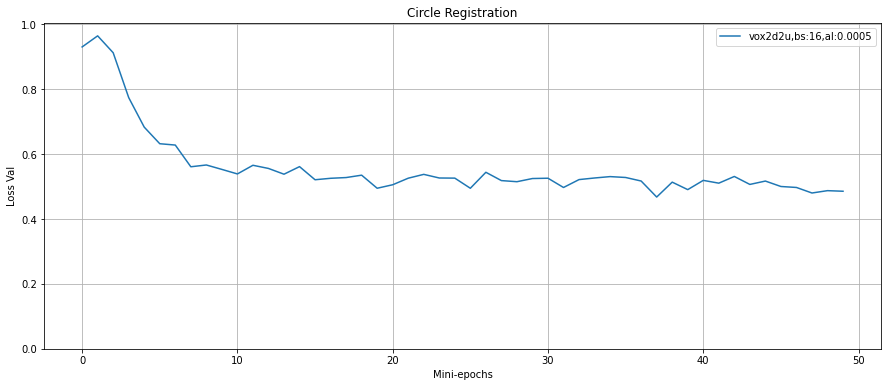

In [11]:
train_datas3 = np.load("griddata/vox2d2u-train-bs32.npy")
names3 = np.load("griddata/vox2d2u-names-bs32.npy")

compare_lines(train_datas3, names3)

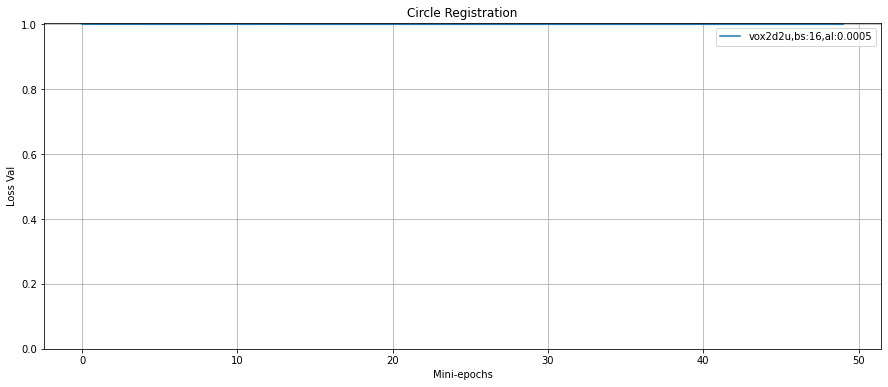

In [12]:
val_datas3 = np.load("griddata/vox2d2u-val-bs32.npy")

compare_lines(val_datas3, names3)

In [13]:
nf_enc = [128, 128, 128]
nf_dec = [256, 256, 128 ,128]
conv_num = [1,3,3,3,3,1]

model4 = cvpr2018_net(vol_size, nf_enc, nf_dec, conv_num=conv_num, full_size=False)

train_datas4, val_datas4, names4 = run_gridsearch(mod_name="vox2d2u-ext",
                                                   vol_s=vol_size, 
                                                   nf_e=nf_enc, 
                                                   nf_d=nf_dec,
                                                   alpha_list=alphas, 
                                                   batch_list=batch_sizes, 
                                                   num_iters=iterations,
                                                   conv_num=conv_num)

np.save("griddata/vox2d2u-ext-train-bs32",train_datas4)
np.save("griddata/vox2d2u-ext-val-bs32",val_datas4)
np.save("griddata/vox2d2u-ext-names-bs32",names4)

Train Epoch: 0 | Loss: 0.027368 | Reconstruction Loss: 0.027368 | Dice Score: 0.961853
Val Epoch: 0 | Dice Score: 0.999901


/nfs02/users/vib9/anaconda3/envs/sln/lib/python3.6/site-packages/torch/nn/functional.py:3226: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


Val Epoch: 1 | Dice Score: 0.999901
Val Epoch: 2 | Dice Score: 0.999901
Val Epoch: 3 | Dice Score: 0.999901
Val Epoch: 4 | Dice Score: 0.999901
Val Epoch: 5 | Dice Score: 0.999901
Val Epoch: 6 | Dice Score: 0.999901
Val Epoch: 7 | Dice Score: 0.999901
Val Epoch: 8 | Dice Score: 0.999901
Val Epoch: 9 | Dice Score: 0.999901
Val Epoch: 10 | Dice Score: 0.999901
Val Epoch: 11 | Dice Score: 0.999901
Val Epoch: 12 | Dice Score: 0.999901
Val Epoch: 13 | Dice Score: 0.999901
Val Epoch: 14 | Dice Score: 0.999901
Val Epoch: 15 | Dice Score: 0.999901
Val Epoch: 16 | Dice Score: 0.999901
Val Epoch: 17 | Dice Score: 0.999901
Val Epoch: 18 | Dice Score: 0.999901
Val Epoch: 19 | Dice Score: 0.999901
Val Epoch: 20 | Dice Score: 0.999901
Val Epoch: 21 | Dice Score: 0.999901
Val Epoch: 22 | Dice Score: 0.999901
Val Epoch: 23 | Dice Score: 0.999901
Val Epoch: 24 | Dice Score: 0.999901
Val Epoch: 25 | Dice Score: 0.999901
Val Epoch: 26 | Dice Score: 0.999901
Val Epoch: 27 | Dice Score: 0.999901
Val Epoch:

Train Epoch: 68 | Loss: 0.015595 | Reconstruction Loss: 0.014938 | Dice Score: 0.940681
Train Epoch: 69 | Loss: 0.015339 | Reconstruction Loss: 0.014727 | Dice Score: 0.947765
Train Epoch: 70 | Loss: 0.015457 | Reconstruction Loss: 0.015124 | Dice Score: 0.918047
Train Epoch: 71 | Loss: 0.015578 | Reconstruction Loss: 0.014597 | Dice Score: 0.935575
Train Epoch: 72 | Loss: 0.016169 | Reconstruction Loss: 0.015013 | Dice Score: 0.953969
Train Epoch: 73 | Loss: 0.015765 | Reconstruction Loss: 0.014699 | Dice Score: 0.938228
Train Epoch: 74 | Loss: 0.014050 | Reconstruction Loss: 0.013357 | Dice Score: 0.819283
Train Epoch: 75 | Loss: 0.015639 | Reconstruction Loss: 0.015127 | Dice Score: 0.975114
Train Epoch: 76 | Loss: 0.015679 | Reconstruction Loss: 0.015351 | Dice Score: 0.929176
Train Epoch: 77 | Loss: 0.015969 | Reconstruction Loss: 0.015598 | Dice Score: 0.978601
Train Epoch: 78 | Loss: 0.014922 | Reconstruction Loss: 0.014432 | Dice Score: 0.901139
Train Epoch: 79 | Loss: 0.015232

Train Epoch: 148 | Loss: 0.016016 | Reconstruction Loss: 0.015422 | Dice Score: 0.999807
Train Epoch: 149 | Loss: 0.015964 | Reconstruction Loss: 0.015450 | Dice Score: 0.999806
Train Epoch: 150 | Loss: 0.015681 | Reconstruction Loss: 0.015248 | Dice Score: 0.995588
Train Epoch: 151 | Loss: 0.014023 | Reconstruction Loss: 0.013699 | Dice Score: 0.835719
Train Epoch: 152 | Loss: 0.014944 | Reconstruction Loss: 0.014621 | Dice Score: 0.923472
Train Epoch: 153 | Loss: 0.014363 | Reconstruction Loss: 0.014029 | Dice Score: 0.870858
Train Epoch: 154 | Loss: 0.014542 | Reconstruction Loss: 0.014169 | Dice Score: 0.891257
Train Epoch: 155 | Loss: 0.014792 | Reconstruction Loss: 0.014383 | Dice Score: 0.916913
Train Epoch: 156 | Loss: 0.014526 | Reconstruction Loss: 0.014091 | Dice Score: 0.866775
Train Epoch: 157 | Loss: 0.015435 | Reconstruction Loss: 0.014930 | Dice Score: 0.938246
Train Epoch: 158 | Loss: 0.015200 | Reconstruction Loss: 0.014652 | Dice Score: 0.926411
Train Epoch: 159 | Lo

Train Epoch: 227 | Loss: 0.014185 | Reconstruction Loss: 0.013629 | Dice Score: 0.811783
Train Epoch: 228 | Loss: 0.015996 | Reconstruction Loss: 0.015346 | Dice Score: 0.996325
Train Epoch: 229 | Loss: 0.014028 | Reconstruction Loss: 0.013439 | Dice Score: 0.757204
Train Epoch: 230 | Loss: 0.014322 | Reconstruction Loss: 0.013830 | Dice Score: 0.811811
Train Epoch: 231 | Loss: 0.014267 | Reconstruction Loss: 0.013682 | Dice Score: 0.834205
Train Epoch: 232 | Loss: 0.013792 | Reconstruction Loss: 0.013193 | Dice Score: 0.795310
Train Epoch: 233 | Loss: 0.013275 | Reconstruction Loss: 0.012678 | Dice Score: 0.729337
Train Epoch: 234 | Loss: 0.013807 | Reconstruction Loss: 0.013293 | Dice Score: 0.767057
Train Epoch: 235 | Loss: 0.014653 | Reconstruction Loss: 0.014139 | Dice Score: 0.842855
Train Epoch: 236 | Loss: 0.014062 | Reconstruction Loss: 0.013470 | Dice Score: 0.817942
Train Epoch: 237 | Loss: 0.014239 | Reconstruction Loss: 0.013722 | Dice Score: 0.803587
Train Epoch: 238 | Lo

Train Epoch: 306 | Loss: 0.012555 | Reconstruction Loss: 0.011831 | Dice Score: 0.630458
Train Epoch: 307 | Loss: 0.011627 | Reconstruction Loss: 0.010743 | Dice Score: 0.547295
Train Epoch: 308 | Loss: 0.010980 | Reconstruction Loss: 0.010005 | Dice Score: 0.494621
Train Epoch: 309 | Loss: 0.009994 | Reconstruction Loss: 0.009016 | Dice Score: 0.445285
Train Epoch: 310 | Loss: 0.012984 | Reconstruction Loss: 0.011900 | Dice Score: 0.659244
Train Epoch: 311 | Loss: 0.010757 | Reconstruction Loss: 0.009732 | Dice Score: 0.500985
Train Epoch: 312 | Loss: 0.011105 | Reconstruction Loss: 0.010183 | Dice Score: 0.500279
Train Epoch: 313 | Loss: 0.010454 | Reconstruction Loss: 0.009455 | Dice Score: 0.493793
Train Epoch: 314 | Loss: 0.010936 | Reconstruction Loss: 0.009705 | Dice Score: 0.515147
Train Epoch: 315 | Loss: 0.011618 | Reconstruction Loss: 0.010250 | Dice Score: 0.501340
Train Epoch: 316 | Loss: 0.009920 | Reconstruction Loss: 0.008742 | Dice Score: 0.498210
Train Epoch: 317 | Lo

Val Epoch: 0 | Dice Score: 0.999805
Val Epoch: 1 | Dice Score: 0.999805
Val Epoch: 2 | Dice Score: 0.999805
Val Epoch: 3 | Dice Score: 0.999805
Val Epoch: 4 | Dice Score: 0.999805
Val Epoch: 5 | Dice Score: 0.999805
Val Epoch: 6 | Dice Score: 0.999805
Val Epoch: 7 | Dice Score: 0.999805
Val Epoch: 8 | Dice Score: 0.999805
Val Epoch: 9 | Dice Score: 0.999805
Val Epoch: 10 | Dice Score: 0.999805
Val Epoch: 11 | Dice Score: 0.999805
Val Epoch: 12 | Dice Score: 0.999805
Val Epoch: 13 | Dice Score: 0.999805
Val Epoch: 14 | Dice Score: 0.999805
Val Epoch: 15 | Dice Score: 0.999805
Val Epoch: 16 | Dice Score: 0.999805
Val Epoch: 17 | Dice Score: 0.999805
Val Epoch: 18 | Dice Score: 0.999805
Val Epoch: 19 | Dice Score: 0.999805
Val Epoch: 20 | Dice Score: 0.999805
Val Epoch: 21 | Dice Score: 0.999805
Val Epoch: 22 | Dice Score: 0.999805
Val Epoch: 23 | Dice Score: 0.999805
Val Epoch: 24 | Dice Score: 0.999805
Val Epoch: 25 | Dice Score: 0.999805
Val Epoch: 26 | Dice Score: 0.999805
Val Epoch: 

Train Epoch: 451 | Loss: 0.007277 | Reconstruction Loss: 0.006164 | Dice Score: 0.223819
Train Epoch: 452 | Loss: 0.007328 | Reconstruction Loss: 0.006345 | Dice Score: 0.279809
Train Epoch: 453 | Loss: 0.007449 | Reconstruction Loss: 0.006245 | Dice Score: 0.273713
Train Epoch: 454 | Loss: 0.006488 | Reconstruction Loss: 0.005531 | Dice Score: 0.220355
Train Epoch: 455 | Loss: 0.008211 | Reconstruction Loss: 0.006665 | Dice Score: 0.258448
Train Epoch: 456 | Loss: 0.005797 | Reconstruction Loss: 0.004747 | Dice Score: 0.167602
Train Epoch: 457 | Loss: 0.007329 | Reconstruction Loss: 0.005892 | Dice Score: 0.231992
Train Epoch: 458 | Loss: 0.007894 | Reconstruction Loss: 0.006736 | Dice Score: 0.315137
Train Epoch: 459 | Loss: 0.010343 | Reconstruction Loss: 0.009015 | Dice Score: 0.431976
Train Epoch: 460 | Loss: 0.009025 | Reconstruction Loss: 0.007595 | Dice Score: 0.308939
Train Epoch: 461 | Loss: 0.006202 | Reconstruction Loss: 0.005050 | Dice Score: 0.179299
Train Epoch: 462 | Lo

Train Epoch: 530 | Loss: 0.008275 | Reconstruction Loss: 0.006414 | Dice Score: 0.270077
Train Epoch: 531 | Loss: 0.007985 | Reconstruction Loss: 0.006786 | Dice Score: 0.260525
Train Epoch: 532 | Loss: 0.007695 | Reconstruction Loss: 0.006444 | Dice Score: 0.284168
Train Epoch: 533 | Loss: 0.008496 | Reconstruction Loss: 0.007116 | Dice Score: 0.308297
Train Epoch: 534 | Loss: 0.004480 | Reconstruction Loss: 0.003127 | Dice Score: 0.127953
Train Epoch: 535 | Loss: 0.008125 | Reconstruction Loss: 0.006960 | Dice Score: 0.326736
Train Epoch: 536 | Loss: 0.007706 | Reconstruction Loss: 0.006263 | Dice Score: 0.292280
Train Epoch: 537 | Loss: 0.008984 | Reconstruction Loss: 0.007468 | Dice Score: 0.329816
Train Epoch: 538 | Loss: 0.008042 | Reconstruction Loss: 0.006436 | Dice Score: 0.271105
Train Epoch: 539 | Loss: 0.006911 | Reconstruction Loss: 0.005387 | Dice Score: 0.214952
Train Epoch: 540 | Loss: 0.007962 | Reconstruction Loss: 0.006325 | Dice Score: 0.276175
Train Epoch: 541 | Lo

Train Epoch: 609 | Loss: 0.005969 | Reconstruction Loss: 0.004658 | Dice Score: 0.178402
Train Epoch: 610 | Loss: 0.006530 | Reconstruction Loss: 0.005267 | Dice Score: 0.236071
Train Epoch: 611 | Loss: 0.007074 | Reconstruction Loss: 0.005509 | Dice Score: 0.211922
Train Epoch: 612 | Loss: 0.004810 | Reconstruction Loss: 0.003612 | Dice Score: 0.130919
Train Epoch: 613 | Loss: 0.006880 | Reconstruction Loss: 0.005355 | Dice Score: 0.216003
Train Epoch: 614 | Loss: 0.004256 | Reconstruction Loss: 0.003072 | Dice Score: 0.126402
Train Epoch: 615 | Loss: 0.004048 | Reconstruction Loss: 0.002808 | Dice Score: 0.094009
Train Epoch: 616 | Loss: 0.007424 | Reconstruction Loss: 0.005713 | Dice Score: 0.223634
Train Epoch: 617 | Loss: 0.006148 | Reconstruction Loss: 0.004791 | Dice Score: 0.183342
Train Epoch: 618 | Loss: 0.007040 | Reconstruction Loss: 0.005514 | Dice Score: 0.210453
Train Epoch: 619 | Loss: 0.008570 | Reconstruction Loss: 0.007063 | Dice Score: 0.311837
Train Epoch: 620 | Lo

Train Epoch: 688 | Loss: 0.006269 | Reconstruction Loss: 0.004366 | Dice Score: 0.192260
Train Epoch: 689 | Loss: 0.007875 | Reconstruction Loss: 0.006154 | Dice Score: 0.272979
Train Epoch: 690 | Loss: 0.005992 | Reconstruction Loss: 0.004224 | Dice Score: 0.158984
Train Epoch: 691 | Loss: 0.006188 | Reconstruction Loss: 0.004535 | Dice Score: 0.164405
Train Epoch: 692 | Loss: 0.006644 | Reconstruction Loss: 0.005037 | Dice Score: 0.186137
Train Epoch: 693 | Loss: 0.008025 | Reconstruction Loss: 0.006589 | Dice Score: 0.290178
Train Epoch: 694 | Loss: 0.005942 | Reconstruction Loss: 0.004716 | Dice Score: 0.174263
Train Epoch: 695 | Loss: 0.005347 | Reconstruction Loss: 0.003992 | Dice Score: 0.160370
Train Epoch: 696 | Loss: 0.004159 | Reconstruction Loss: 0.002970 | Dice Score: 0.088342
Train Epoch: 697 | Loss: 0.004319 | Reconstruction Loss: 0.002941 | Dice Score: 0.102973
Train Epoch: 698 | Loss: 0.008661 | Reconstruction Loss: 0.006915 | Dice Score: 0.288270
Train Epoch: 699 | Lo

Train Epoch: 767 | Loss: 0.005149 | Reconstruction Loss: 0.004119 | Dice Score: 0.155097
Train Epoch: 768 | Loss: 0.007149 | Reconstruction Loss: 0.005737 | Dice Score: 0.276740
Val Epoch: 0 | Dice Score: 0.935320
Val Epoch: 1 | Dice Score: 0.962672
Val Epoch: 2 | Dice Score: 0.999805
Val Epoch: 3 | Dice Score: 0.999805
Val Epoch: 4 | Dice Score: 0.999805
Val Epoch: 5 | Dice Score: 0.997466
Val Epoch: 6 | Dice Score: 0.999805
Val Epoch: 7 | Dice Score: 0.999805
Val Epoch: 8 | Dice Score: 0.999805
Val Epoch: 9 | Dice Score: 0.953378
Val Epoch: 10 | Dice Score: 0.999805
Val Epoch: 11 | Dice Score: 0.999805
Val Epoch: 12 | Dice Score: 0.999805
Val Epoch: 13 | Dice Score: 0.999805
Val Epoch: 14 | Dice Score: 0.999805
Val Epoch: 15 | Dice Score: 0.999805
Val Epoch: 16 | Dice Score: 0.954502
Val Epoch: 17 | Dice Score: 0.999805
Val Epoch: 18 | Dice Score: 0.999805
Val Epoch: 19 | Dice Score: 0.999805
Val Epoch: 20 | Dice Score: 0.999805
Val Epoch: 21 | Dice Score: 0.950714
Val Epoch: 22 | Di

Train Epoch: 833 | Loss: 0.004745 | Reconstruction Loss: 0.003538 | Dice Score: 0.152610
Train Epoch: 834 | Loss: 0.005523 | Reconstruction Loss: 0.003721 | Dice Score: 0.152516
Train Epoch: 835 | Loss: 0.005843 | Reconstruction Loss: 0.004092 | Dice Score: 0.158414
Train Epoch: 836 | Loss: 0.006195 | Reconstruction Loss: 0.004663 | Dice Score: 0.187770
Train Epoch: 837 | Loss: 0.008388 | Reconstruction Loss: 0.006065 | Dice Score: 0.265917
Train Epoch: 838 | Loss: 0.007862 | Reconstruction Loss: 0.006105 | Dice Score: 0.227420
Train Epoch: 839 | Loss: 0.010001 | Reconstruction Loss: 0.008253 | Dice Score: 0.345176
Train Epoch: 840 | Loss: 0.007667 | Reconstruction Loss: 0.005748 | Dice Score: 0.251756
Train Epoch: 841 | Loss: 0.008420 | Reconstruction Loss: 0.007263 | Dice Score: 0.286018
Train Epoch: 842 | Loss: 0.003993 | Reconstruction Loss: 0.002914 | Dice Score: 0.100385
Train Epoch: 843 | Loss: 0.005795 | Reconstruction Loss: 0.004452 | Dice Score: 0.168376
Train Epoch: 844 | Lo

Train Epoch: 912 | Loss: 0.006722 | Reconstruction Loss: 0.005371 | Dice Score: 0.204661
Train Epoch: 913 | Loss: 0.003662 | Reconstruction Loss: 0.002493 | Dice Score: 0.113491
Train Epoch: 914 | Loss: 0.008646 | Reconstruction Loss: 0.007002 | Dice Score: 0.290781
Train Epoch: 915 | Loss: 0.004751 | Reconstruction Loss: 0.003433 | Dice Score: 0.129097
Train Epoch: 916 | Loss: 0.005890 | Reconstruction Loss: 0.004214 | Dice Score: 0.157217
Train Epoch: 917 | Loss: 0.004917 | Reconstruction Loss: 0.003504 | Dice Score: 0.140882
Train Epoch: 918 | Loss: 0.007313 | Reconstruction Loss: 0.005936 | Dice Score: 0.357613
Train Epoch: 919 | Loss: 0.006758 | Reconstruction Loss: 0.005083 | Dice Score: 0.203729
Train Epoch: 920 | Loss: 0.004964 | Reconstruction Loss: 0.003544 | Dice Score: 0.168743
Train Epoch: 921 | Loss: 0.007548 | Reconstruction Loss: 0.005957 | Dice Score: 0.266798
Train Epoch: 922 | Loss: 0.008263 | Reconstruction Loss: 0.006556 | Dice Score: 0.269925
Train Epoch: 923 | Lo

Train Epoch: 991 | Loss: 0.005091 | Reconstruction Loss: 0.003411 | Dice Score: 0.125687
Train Epoch: 992 | Loss: 0.003740 | Reconstruction Loss: 0.002378 | Dice Score: 0.084186
Train Epoch: 993 | Loss: 0.004332 | Reconstruction Loss: 0.003124 | Dice Score: 0.123592
Train Epoch: 994 | Loss: 0.005824 | Reconstruction Loss: 0.004290 | Dice Score: 0.146935
Train Epoch: 995 | Loss: 0.007234 | Reconstruction Loss: 0.005953 | Dice Score: 0.215045
Train Epoch: 996 | Loss: 0.005566 | Reconstruction Loss: 0.004085 | Dice Score: 0.153297
Train Epoch: 997 | Loss: 0.007722 | Reconstruction Loss: 0.006079 | Dice Score: 0.261975
Train Epoch: 998 | Loss: 0.005141 | Reconstruction Loss: 0.003617 | Dice Score: 0.122268
Train Epoch: 999 | Loss: 0.005915 | Reconstruction Loss: 0.003916 | Dice Score: 0.132062
Train Epoch: 1000 | Loss: 0.004127 | Reconstruction Loss: 0.002496 | Dice Score: 0.085033
Train Epoch: 1001 | Loss: 0.006086 | Reconstruction Loss: 0.004912 | Dice Score: 0.176464
Train Epoch: 1002 |

Train Epoch: 1070 | Loss: 0.006128 | Reconstruction Loss: 0.004771 | Dice Score: 0.201713
Train Epoch: 1071 | Loss: 0.005215 | Reconstruction Loss: 0.003284 | Dice Score: 0.124872
Train Epoch: 1072 | Loss: 0.005486 | Reconstruction Loss: 0.004031 | Dice Score: 0.153038
Train Epoch: 1073 | Loss: 0.004511 | Reconstruction Loss: 0.003052 | Dice Score: 0.147747
Train Epoch: 1074 | Loss: 0.005058 | Reconstruction Loss: 0.003399 | Dice Score: 0.120980
Train Epoch: 1075 | Loss: 0.007226 | Reconstruction Loss: 0.005034 | Dice Score: 0.192898
Train Epoch: 1076 | Loss: 0.004808 | Reconstruction Loss: 0.003810 | Dice Score: 0.149393
Train Epoch: 1077 | Loss: 0.004746 | Reconstruction Loss: 0.003236 | Dice Score: 0.137548
Train Epoch: 1078 | Loss: 0.006246 | Reconstruction Loss: 0.004640 | Dice Score: 0.179421
Train Epoch: 1079 | Loss: 0.007143 | Reconstruction Loss: 0.005362 | Dice Score: 0.211995
Train Epoch: 1080 | Loss: 0.005995 | Reconstruction Loss: 0.004201 | Dice Score: 0.142200
Train Epoc

Train Epoch: 1148 | Loss: 0.005689 | Reconstruction Loss: 0.003882 | Dice Score: 0.129952
Train Epoch: 1149 | Loss: 0.005488 | Reconstruction Loss: 0.003772 | Dice Score: 0.139006
Train Epoch: 1150 | Loss: 0.005610 | Reconstruction Loss: 0.004042 | Dice Score: 0.137195
Train Epoch: 1151 | Loss: 0.004831 | Reconstruction Loss: 0.003190 | Dice Score: 0.100781
Train Epoch: 1152 | Loss: 0.004279 | Reconstruction Loss: 0.003048 | Dice Score: 0.111802
Val Epoch: 0 | Dice Score: 0.956979
Val Epoch: 1 | Dice Score: 0.970906
Val Epoch: 2 | Dice Score: 0.999413
Val Epoch: 3 | Dice Score: 0.968569
Val Epoch: 4 | Dice Score: 0.946064
Val Epoch: 5 | Dice Score: 0.999804
Val Epoch: 6 | Dice Score: 0.932123
Val Epoch: 7 | Dice Score: 0.962565
Val Epoch: 8 | Dice Score: 0.999804
Val Epoch: 9 | Dice Score: 0.999804
Val Epoch: 10 | Dice Score: 0.999804
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.936481
Val Epoch: 13 | Dice Score: 0.996285
Val Epoch: 14 | Dice Score: 0.957247
Val E

Val Epoch: 23 | Dice Score: 0.999805
Val Epoch: 24 | Dice Score: 0.999805
Val Epoch: 25 | Dice Score: 0.999805
Val Epoch: 26 | Dice Score: 0.901323
Val Epoch: 27 | Dice Score: 0.970667
Val Epoch: 28 | Dice Score: 0.965352
Val Epoch: 29 | Dice Score: 0.999805
Val Epoch: 30 | Dice Score: 0.956159
Val Epoch: 31 | Dice Score: 0.964231
Train Epoch: 1217 | Loss: 0.004633 | Reconstruction Loss: 0.003075 | Dice Score: 0.166332
Train Epoch: 1218 | Loss: 0.007448 | Reconstruction Loss: 0.005651 | Dice Score: 0.220065
Train Epoch: 1219 | Loss: 0.005988 | Reconstruction Loss: 0.004581 | Dice Score: 0.165756
Train Epoch: 1220 | Loss: 0.005298 | Reconstruction Loss: 0.004026 | Dice Score: 0.172559
Train Epoch: 1221 | Loss: 0.003844 | Reconstruction Loss: 0.002355 | Dice Score: 0.078022
Train Epoch: 1222 | Loss: 0.005366 | Reconstruction Loss: 0.004032 | Dice Score: 0.152148
Train Epoch: 1223 | Loss: 0.004112 | Reconstruction Loss: 0.002930 | Dice Score: 0.128269
Train Epoch: 1224 | Loss: 0.004863 | 

Train Epoch: 1292 | Loss: 0.004002 | Reconstruction Loss: 0.002905 | Dice Score: 0.129301
Train Epoch: 1293 | Loss: 0.003958 | Reconstruction Loss: 0.002682 | Dice Score: 0.089797
Train Epoch: 1294 | Loss: 0.003970 | Reconstruction Loss: 0.002335 | Dice Score: 0.076332
Train Epoch: 1295 | Loss: 0.006990 | Reconstruction Loss: 0.005072 | Dice Score: 0.215705
Train Epoch: 1296 | Loss: 0.005261 | Reconstruction Loss: 0.003726 | Dice Score: 0.171252
Train Epoch: 1297 | Loss: 0.008164 | Reconstruction Loss: 0.006572 | Dice Score: 0.284349
Train Epoch: 1298 | Loss: 0.005983 | Reconstruction Loss: 0.004430 | Dice Score: 0.169781
Train Epoch: 1299 | Loss: 0.005369 | Reconstruction Loss: 0.003628 | Dice Score: 0.131681
Train Epoch: 1300 | Loss: 0.006586 | Reconstruction Loss: 0.004678 | Dice Score: 0.187293
Train Epoch: 1301 | Loss: 0.006475 | Reconstruction Loss: 0.004794 | Dice Score: 0.190476
Train Epoch: 1302 | Loss: 0.004955 | Reconstruction Loss: 0.003652 | Dice Score: 0.115700
Train Epoc

Train Epoch: 1370 | Loss: 0.003911 | Reconstruction Loss: 0.002758 | Dice Score: 0.099363
Train Epoch: 1371 | Loss: 0.007704 | Reconstruction Loss: 0.005671 | Dice Score: 0.212214
Train Epoch: 1372 | Loss: 0.005349 | Reconstruction Loss: 0.003901 | Dice Score: 0.156730
Train Epoch: 1373 | Loss: 0.009707 | Reconstruction Loss: 0.007877 | Dice Score: 0.351348
Train Epoch: 1374 | Loss: 0.005549 | Reconstruction Loss: 0.003909 | Dice Score: 0.155362
Train Epoch: 1375 | Loss: 0.007630 | Reconstruction Loss: 0.005881 | Dice Score: 0.312580
Train Epoch: 1376 | Loss: 0.005223 | Reconstruction Loss: 0.003582 | Dice Score: 0.133299
Train Epoch: 1377 | Loss: 0.005515 | Reconstruction Loss: 0.004118 | Dice Score: 0.167792
Train Epoch: 1378 | Loss: 0.005814 | Reconstruction Loss: 0.003984 | Dice Score: 0.140119
Train Epoch: 1379 | Loss: 0.006219 | Reconstruction Loss: 0.004150 | Dice Score: 0.169098
Train Epoch: 1380 | Loss: 0.005268 | Reconstruction Loss: 0.003986 | Dice Score: 0.179530
Train Epoc

Train Epoch: 1448 | Loss: 0.006812 | Reconstruction Loss: 0.005161 | Dice Score: 0.214799
Train Epoch: 1449 | Loss: 0.005200 | Reconstruction Loss: 0.003841 | Dice Score: 0.166749
Train Epoch: 1450 | Loss: 0.004811 | Reconstruction Loss: 0.003218 | Dice Score: 0.135121
Train Epoch: 1451 | Loss: 0.006523 | Reconstruction Loss: 0.004853 | Dice Score: 0.206398
Train Epoch: 1452 | Loss: 0.006544 | Reconstruction Loss: 0.005168 | Dice Score: 0.240387
Train Epoch: 1453 | Loss: 0.006612 | Reconstruction Loss: 0.005144 | Dice Score: 0.226755
Train Epoch: 1454 | Loss: 0.004805 | Reconstruction Loss: 0.003557 | Dice Score: 0.164954
Train Epoch: 1455 | Loss: 0.004621 | Reconstruction Loss: 0.003016 | Dice Score: 0.114021
Train Epoch: 1456 | Loss: 0.004293 | Reconstruction Loss: 0.002655 | Dice Score: 0.094495
Train Epoch: 1457 | Loss: 0.004704 | Reconstruction Loss: 0.003221 | Dice Score: 0.135674
Train Epoch: 1458 | Loss: 0.006526 | Reconstruction Loss: 0.004456 | Dice Score: 0.198922
Train Epoc

Train Epoch: 1526 | Loss: 0.004407 | Reconstruction Loss: 0.003026 | Dice Score: 0.115360
Train Epoch: 1527 | Loss: 0.004508 | Reconstruction Loss: 0.003143 | Dice Score: 0.098558
Train Epoch: 1528 | Loss: 0.007177 | Reconstruction Loss: 0.005108 | Dice Score: 0.199887
Train Epoch: 1529 | Loss: 0.003364 | Reconstruction Loss: 0.002207 | Dice Score: 0.092289
Train Epoch: 1530 | Loss: 0.005552 | Reconstruction Loss: 0.004414 | Dice Score: 0.157934
Train Epoch: 1531 | Loss: 0.007436 | Reconstruction Loss: 0.005690 | Dice Score: 0.234105
Train Epoch: 1532 | Loss: 0.005183 | Reconstruction Loss: 0.003871 | Dice Score: 0.184622
Train Epoch: 1533 | Loss: 0.005989 | Reconstruction Loss: 0.004253 | Dice Score: 0.150083
Train Epoch: 1534 | Loss: 0.004629 | Reconstruction Loss: 0.003082 | Dice Score: 0.126773
Train Epoch: 1535 | Loss: 0.005649 | Reconstruction Loss: 0.003787 | Dice Score: 0.132491
Train Epoch: 1536 | Loss: 0.007079 | Reconstruction Loss: 0.005444 | Dice Score: 0.206333
Val Epoch:

Val Epoch: 8 | Dice Score: 0.996280
Val Epoch: 9 | Dice Score: 0.975378
Val Epoch: 10 | Dice Score: 0.999804
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.999804
Val Epoch: 13 | Dice Score: 0.999804
Val Epoch: 14 | Dice Score: 0.962842
Val Epoch: 15 | Dice Score: 0.993153
Val Epoch: 16 | Dice Score: 0.969668
Val Epoch: 17 | Dice Score: 0.999804
Val Epoch: 18 | Dice Score: 0.999804
Val Epoch: 19 | Dice Score: 0.953457
Val Epoch: 20 | Dice Score: 0.999804
Val Epoch: 21 | Dice Score: 0.999804
Val Epoch: 22 | Dice Score: 0.982688
Val Epoch: 23 | Dice Score: 0.999019
Val Epoch: 24 | Dice Score: 0.999804
Val Epoch: 25 | Dice Score: 0.991220
Val Epoch: 26 | Dice Score: 0.914762
Val Epoch: 27 | Dice Score: 0.999804
Val Epoch: 28 | Dice Score: 0.999804
Val Epoch: 29 | Dice Score: 0.966255
Val Epoch: 30 | Dice Score: 0.993546
Val Epoch: 31 | Dice Score: 0.963934
Train Epoch: 1601 | Loss: 0.006854 | Reconstruction Loss: 0.005202 | Dice Score: 0.210002
Train Epoch: 1602 | Loss

Train Epoch: 1670 | Loss: 0.005161 | Reconstruction Loss: 0.003411 | Dice Score: 0.143206
Train Epoch: 1671 | Loss: 0.006388 | Reconstruction Loss: 0.005038 | Dice Score: 0.211449
Train Epoch: 1672 | Loss: 0.004191 | Reconstruction Loss: 0.002658 | Dice Score: 0.106257
Train Epoch: 1673 | Loss: 0.005172 | Reconstruction Loss: 0.003527 | Dice Score: 0.131953
Train Epoch: 1674 | Loss: 0.005109 | Reconstruction Loss: 0.003443 | Dice Score: 0.120493
Train Epoch: 1675 | Loss: 0.005601 | Reconstruction Loss: 0.003900 | Dice Score: 0.156937
Train Epoch: 1676 | Loss: 0.004181 | Reconstruction Loss: 0.002883 | Dice Score: 0.098643
Train Epoch: 1677 | Loss: 0.006987 | Reconstruction Loss: 0.005138 | Dice Score: 0.222547
Train Epoch: 1678 | Loss: 0.006072 | Reconstruction Loss: 0.004366 | Dice Score: 0.148934
Train Epoch: 1679 | Loss: 0.005223 | Reconstruction Loss: 0.003835 | Dice Score: 0.147162
Train Epoch: 1680 | Loss: 0.005356 | Reconstruction Loss: 0.003971 | Dice Score: 0.159290
Train Epoc

Train Epoch: 1748 | Loss: 0.006233 | Reconstruction Loss: 0.004669 | Dice Score: 0.203814
Train Epoch: 1749 | Loss: 0.004344 | Reconstruction Loss: 0.003161 | Dice Score: 0.149328
Train Epoch: 1750 | Loss: 0.004319 | Reconstruction Loss: 0.002828 | Dice Score: 0.120795
Train Epoch: 1751 | Loss: 0.005455 | Reconstruction Loss: 0.003964 | Dice Score: 0.151311
Train Epoch: 1752 | Loss: 0.004855 | Reconstruction Loss: 0.003340 | Dice Score: 0.135498
Train Epoch: 1753 | Loss: 0.003433 | Reconstruction Loss: 0.002184 | Dice Score: 0.089803
Train Epoch: 1754 | Loss: 0.004920 | Reconstruction Loss: 0.003529 | Dice Score: 0.158320
Train Epoch: 1755 | Loss: 0.005069 | Reconstruction Loss: 0.003724 | Dice Score: 0.199605
Train Epoch: 1756 | Loss: 0.005083 | Reconstruction Loss: 0.003332 | Dice Score: 0.135038
Train Epoch: 1757 | Loss: 0.004527 | Reconstruction Loss: 0.002973 | Dice Score: 0.138914
Train Epoch: 1758 | Loss: 0.006012 | Reconstruction Loss: 0.004468 | Dice Score: 0.165811
Train Epoc

Train Epoch: 1826 | Loss: 0.004998 | Reconstruction Loss: 0.003445 | Dice Score: 0.163166
Train Epoch: 1827 | Loss: 0.004059 | Reconstruction Loss: 0.002840 | Dice Score: 0.124084
Train Epoch: 1828 | Loss: 0.005787 | Reconstruction Loss: 0.004396 | Dice Score: 0.176452
Train Epoch: 1829 | Loss: 0.004719 | Reconstruction Loss: 0.003291 | Dice Score: 0.149824
Train Epoch: 1830 | Loss: 0.006541 | Reconstruction Loss: 0.004845 | Dice Score: 0.259185
Train Epoch: 1831 | Loss: 0.006379 | Reconstruction Loss: 0.004637 | Dice Score: 0.190377
Train Epoch: 1832 | Loss: 0.004736 | Reconstruction Loss: 0.002859 | Dice Score: 0.117326
Train Epoch: 1833 | Loss: 0.005675 | Reconstruction Loss: 0.003840 | Dice Score: 0.147375
Train Epoch: 1834 | Loss: 0.006424 | Reconstruction Loss: 0.004670 | Dice Score: 0.235254
Train Epoch: 1835 | Loss: 0.006837 | Reconstruction Loss: 0.005340 | Dice Score: 0.250212
Train Epoch: 1836 | Loss: 0.004328 | Reconstruction Loss: 0.003023 | Dice Score: 0.149598
Train Epoc

Train Epoch: 1904 | Loss: 0.006024 | Reconstruction Loss: 0.004327 | Dice Score: 0.165216
Train Epoch: 1905 | Loss: 0.004677 | Reconstruction Loss: 0.003160 | Dice Score: 0.111519
Train Epoch: 1906 | Loss: 0.005902 | Reconstruction Loss: 0.004458 | Dice Score: 0.164832
Train Epoch: 1907 | Loss: 0.003255 | Reconstruction Loss: 0.002143 | Dice Score: 0.081944
Train Epoch: 1908 | Loss: 0.006865 | Reconstruction Loss: 0.005261 | Dice Score: 0.197762
Train Epoch: 1909 | Loss: 0.005554 | Reconstruction Loss: 0.004007 | Dice Score: 0.139339
Train Epoch: 1910 | Loss: 0.005018 | Reconstruction Loss: 0.003284 | Dice Score: 0.107720
Train Epoch: 1911 | Loss: 0.004811 | Reconstruction Loss: 0.003336 | Dice Score: 0.116421
Train Epoch: 1912 | Loss: 0.004503 | Reconstruction Loss: 0.003361 | Dice Score: 0.120095
Train Epoch: 1913 | Loss: 0.003219 | Reconstruction Loss: 0.001998 | Dice Score: 0.064326
Train Epoch: 1914 | Loss: 0.004978 | Reconstruction Loss: 0.003565 | Dice Score: 0.139272
Train Epoc

Train Epoch: 1982 | Loss: 0.004682 | Reconstruction Loss: 0.003475 | Dice Score: 0.167110
Train Epoch: 1983 | Loss: 0.005055 | Reconstruction Loss: 0.003626 | Dice Score: 0.185391
Train Epoch: 1984 | Loss: 0.006192 | Reconstruction Loss: 0.004807 | Dice Score: 0.189431
Val Epoch: 0 | Dice Score: 0.976609
Val Epoch: 1 | Dice Score: 0.999804
Val Epoch: 2 | Dice Score: 0.977748
Val Epoch: 3 | Dice Score: 0.999804
Val Epoch: 4 | Dice Score: 0.999804
Val Epoch: 5 | Dice Score: 0.980430
Val Epoch: 6 | Dice Score: 0.971330
Val Epoch: 7 | Dice Score: 0.914004
Val Epoch: 8 | Dice Score: 0.984250
Val Epoch: 9 | Dice Score: 0.911289
Val Epoch: 10 | Dice Score: 0.949230
Val Epoch: 11 | Dice Score: 0.953670
Val Epoch: 12 | Dice Score: 0.954632
Val Epoch: 13 | Dice Score: 0.979332
Val Epoch: 14 | Dice Score: 0.999804
Val Epoch: 15 | Dice Score: 0.921660
Val Epoch: 16 | Dice Score: 0.971319
Val Epoch: 17 | Dice Score: 0.946720
Val Epoch: 18 | Dice Score: 0.999804
Val Epoch: 19 | Dice Score: 0.999804


Val Epoch: 27 | Dice Score: 0.929365
Val Epoch: 28 | Dice Score: 0.999805
Val Epoch: 29 | Dice Score: 0.968354
Val Epoch: 30 | Dice Score: 0.938092
Val Epoch: 31 | Dice Score: 0.937063
Train Epoch: 2049 | Loss: 0.004550 | Reconstruction Loss: 0.003013 | Dice Score: 0.105420
Train Epoch: 2050 | Loss: 0.004953 | Reconstruction Loss: 0.003323 | Dice Score: 0.118283
Train Epoch: 2051 | Loss: 0.005944 | Reconstruction Loss: 0.004597 | Dice Score: 0.197474
Train Epoch: 2052 | Loss: 0.005920 | Reconstruction Loss: 0.004262 | Dice Score: 0.160868
Train Epoch: 2053 | Loss: 0.005114 | Reconstruction Loss: 0.003701 | Dice Score: 0.153160
Train Epoch: 2054 | Loss: 0.006428 | Reconstruction Loss: 0.004525 | Dice Score: 0.176839
Train Epoch: 2055 | Loss: 0.005183 | Reconstruction Loss: 0.003641 | Dice Score: 0.131128
Train Epoch: 2056 | Loss: 0.003315 | Reconstruction Loss: 0.002410 | Dice Score: 0.092212
Train Epoch: 2057 | Loss: 0.005766 | Reconstruction Loss: 0.004504 | Dice Score: 0.168384
Train

Train Epoch: 2125 | Loss: 0.005617 | Reconstruction Loss: 0.003934 | Dice Score: 0.148363
Train Epoch: 2126 | Loss: 0.004207 | Reconstruction Loss: 0.002777 | Dice Score: 0.098732
Train Epoch: 2127 | Loss: 0.005624 | Reconstruction Loss: 0.004231 | Dice Score: 0.161157
Train Epoch: 2128 | Loss: 0.007028 | Reconstruction Loss: 0.005365 | Dice Score: 0.225258
Train Epoch: 2129 | Loss: 0.005587 | Reconstruction Loss: 0.003958 | Dice Score: 0.154456
Train Epoch: 2130 | Loss: 0.006526 | Reconstruction Loss: 0.004899 | Dice Score: 0.181530
Train Epoch: 2131 | Loss: 0.004931 | Reconstruction Loss: 0.003259 | Dice Score: 0.116263
Train Epoch: 2132 | Loss: 0.004380 | Reconstruction Loss: 0.002943 | Dice Score: 0.094582
Train Epoch: 2133 | Loss: 0.003103 | Reconstruction Loss: 0.002050 | Dice Score: 0.081252
Train Epoch: 2134 | Loss: 0.004574 | Reconstruction Loss: 0.003230 | Dice Score: 0.133326
Train Epoch: 2135 | Loss: 0.004370 | Reconstruction Loss: 0.002719 | Dice Score: 0.095854
Train Epoc

Train Epoch: 2203 | Loss: 0.005105 | Reconstruction Loss: 0.003788 | Dice Score: 0.166026
Train Epoch: 2204 | Loss: 0.004943 | Reconstruction Loss: 0.003508 | Dice Score: 0.130932
Train Epoch: 2205 | Loss: 0.004232 | Reconstruction Loss: 0.002922 | Dice Score: 0.116267
Train Epoch: 2206 | Loss: 0.004063 | Reconstruction Loss: 0.002769 | Dice Score: 0.116987
Train Epoch: 2207 | Loss: 0.003942 | Reconstruction Loss: 0.002431 | Dice Score: 0.117115
Train Epoch: 2208 | Loss: 0.005080 | Reconstruction Loss: 0.003560 | Dice Score: 0.153062
Train Epoch: 2209 | Loss: 0.003847 | Reconstruction Loss: 0.002447 | Dice Score: 0.100480
Train Epoch: 2210 | Loss: 0.005164 | Reconstruction Loss: 0.003653 | Dice Score: 0.137480
Train Epoch: 2211 | Loss: 0.004951 | Reconstruction Loss: 0.003636 | Dice Score: 0.146962
Train Epoch: 2212 | Loss: 0.005408 | Reconstruction Loss: 0.003914 | Dice Score: 0.163835
Train Epoch: 2213 | Loss: 0.006749 | Reconstruction Loss: 0.005086 | Dice Score: 0.215869
Train Epoc

Train Epoch: 2281 | Loss: 0.004654 | Reconstruction Loss: 0.002971 | Dice Score: 0.123334
Train Epoch: 2282 | Loss: 0.004380 | Reconstruction Loss: 0.003421 | Dice Score: 0.172707
Train Epoch: 2283 | Loss: 0.008723 | Reconstruction Loss: 0.007149 | Dice Score: 0.305328
Train Epoch: 2284 | Loss: 0.005294 | Reconstruction Loss: 0.003725 | Dice Score: 0.159170
Train Epoch: 2285 | Loss: 0.005324 | Reconstruction Loss: 0.003730 | Dice Score: 0.142902
Train Epoch: 2286 | Loss: 0.005904 | Reconstruction Loss: 0.004414 | Dice Score: 0.178403
Train Epoch: 2287 | Loss: 0.006719 | Reconstruction Loss: 0.005067 | Dice Score: 0.230168
Train Epoch: 2288 | Loss: 0.005620 | Reconstruction Loss: 0.004044 | Dice Score: 0.167126
Train Epoch: 2289 | Loss: 0.005006 | Reconstruction Loss: 0.003858 | Dice Score: 0.163755
Train Epoch: 2290 | Loss: 0.003294 | Reconstruction Loss: 0.002184 | Dice Score: 0.071514
Train Epoch: 2291 | Loss: 0.005185 | Reconstruction Loss: 0.003979 | Dice Score: 0.167654
Train Epoc

Train Epoch: 2359 | Loss: 0.006770 | Reconstruction Loss: 0.004961 | Dice Score: 0.171804
Train Epoch: 2360 | Loss: 0.004439 | Reconstruction Loss: 0.003034 | Dice Score: 0.110276
Train Epoch: 2361 | Loss: 0.005873 | Reconstruction Loss: 0.004353 | Dice Score: 0.194662
Train Epoch: 2362 | Loss: 0.002874 | Reconstruction Loss: 0.001898 | Dice Score: 0.072731
Train Epoch: 2363 | Loss: 0.004426 | Reconstruction Loss: 0.002942 | Dice Score: 0.112574
Train Epoch: 2364 | Loss: 0.006205 | Reconstruction Loss: 0.004778 | Dice Score: 0.222038
Train Epoch: 2365 | Loss: 0.004366 | Reconstruction Loss: 0.003146 | Dice Score: 0.138211
Train Epoch: 2366 | Loss: 0.003855 | Reconstruction Loss: 0.002495 | Dice Score: 0.117452
Train Epoch: 2367 | Loss: 0.006376 | Reconstruction Loss: 0.004827 | Dice Score: 0.201651
Train Epoch: 2368 | Loss: 0.005737 | Reconstruction Loss: 0.004311 | Dice Score: 0.185358
Val Epoch: 0 | Dice Score: 0.947699
Val Epoch: 1 | Dice Score: 0.999804
Val Epoch: 2 | Dice Score: 0

Val Epoch: 10 | Dice Score: 0.855783
Val Epoch: 11 | Dice Score: 0.999804
Val Epoch: 12 | Dice Score: 0.923378
Val Epoch: 13 | Dice Score: 0.999804
Val Epoch: 14 | Dice Score: 0.999804
Val Epoch: 15 | Dice Score: 0.883006
Val Epoch: 16 | Dice Score: 0.941188
Val Epoch: 17 | Dice Score: 0.876137
Val Epoch: 18 | Dice Score: 0.984678
Val Epoch: 19 | Dice Score: 0.999804
Val Epoch: 20 | Dice Score: 0.954415
Val Epoch: 21 | Dice Score: 0.999804
Val Epoch: 22 | Dice Score: 0.967891
Val Epoch: 23 | Dice Score: 0.987746
Val Epoch: 24 | Dice Score: 0.953741
Val Epoch: 25 | Dice Score: 0.999804
Val Epoch: 26 | Dice Score: 0.954874
Val Epoch: 27 | Dice Score: 0.960154
Val Epoch: 28 | Dice Score: 0.951077
Val Epoch: 29 | Dice Score: 0.999020
Val Epoch: 30 | Dice Score: 0.906291
Val Epoch: 31 | Dice Score: 0.854497
Train Epoch: 2433 | Loss: 0.005502 | Reconstruction Loss: 0.004044 | Dice Score: 0.149894
Train Epoch: 2434 | Loss: 0.004876 | Reconstruction Loss: 0.003745 | Dice Score: 0.158693
Train 

Train Epoch: 2502 | Loss: 0.005236 | Reconstruction Loss: 0.003720 | Dice Score: 0.157168
Train Epoch: 2503 | Loss: 0.005062 | Reconstruction Loss: 0.003621 | Dice Score: 0.142195
Train Epoch: 2504 | Loss: 0.005418 | Reconstruction Loss: 0.003912 | Dice Score: 0.134058
Train Epoch: 2505 | Loss: 0.004707 | Reconstruction Loss: 0.003294 | Dice Score: 0.123292
Train Epoch: 2506 | Loss: 0.006791 | Reconstruction Loss: 0.005154 | Dice Score: 0.194669
Train Epoch: 2507 | Loss: 0.004882 | Reconstruction Loss: 0.003598 | Dice Score: 0.129622
Train Epoch: 2508 | Loss: 0.004750 | Reconstruction Loss: 0.003420 | Dice Score: 0.139028
Train Epoch: 2509 | Loss: 0.004877 | Reconstruction Loss: 0.003729 | Dice Score: 0.143610
Train Epoch: 2510 | Loss: 0.005393 | Reconstruction Loss: 0.004158 | Dice Score: 0.165211
Train Epoch: 2511 | Loss: 0.002813 | Reconstruction Loss: 0.001847 | Dice Score: 0.064583
Train Epoch: 2512 | Loss: 0.005452 | Reconstruction Loss: 0.003978 | Dice Score: 0.154982
Train Epoc

Train Epoch: 2580 | Loss: 0.005041 | Reconstruction Loss: 0.003757 | Dice Score: 0.143166
Train Epoch: 2581 | Loss: 0.005925 | Reconstruction Loss: 0.004535 | Dice Score: 0.201178
Train Epoch: 2582 | Loss: 0.006981 | Reconstruction Loss: 0.005469 | Dice Score: 0.233625
Train Epoch: 2583 | Loss: 0.004292 | Reconstruction Loss: 0.003175 | Dice Score: 0.129475
Train Epoch: 2584 | Loss: 0.005524 | Reconstruction Loss: 0.004006 | Dice Score: 0.147961
Train Epoch: 2585 | Loss: 0.004128 | Reconstruction Loss: 0.002867 | Dice Score: 0.108316
Train Epoch: 2586 | Loss: 0.005813 | Reconstruction Loss: 0.004461 | Dice Score: 0.190085
Train Epoch: 2587 | Loss: 0.003089 | Reconstruction Loss: 0.001989 | Dice Score: 0.080740
Train Epoch: 2588 | Loss: 0.005310 | Reconstruction Loss: 0.003909 | Dice Score: 0.149564
Train Epoch: 2589 | Loss: 0.004409 | Reconstruction Loss: 0.002957 | Dice Score: 0.124080
Train Epoch: 2590 | Loss: 0.004289 | Reconstruction Loss: 0.003016 | Dice Score: 0.121979
Train Epoc

Train Epoch: 2658 | Loss: 0.006872 | Reconstruction Loss: 0.005115 | Dice Score: 0.220297
Train Epoch: 2659 | Loss: 0.005203 | Reconstruction Loss: 0.003824 | Dice Score: 0.207249
Train Epoch: 2660 | Loss: 0.005086 | Reconstruction Loss: 0.004031 | Dice Score: 0.174860
Train Epoch: 2661 | Loss: 0.005853 | Reconstruction Loss: 0.004620 | Dice Score: 0.240200
Train Epoch: 2662 | Loss: 0.006388 | Reconstruction Loss: 0.005043 | Dice Score: 0.207962
Train Epoch: 2663 | Loss: 0.005084 | Reconstruction Loss: 0.003868 | Dice Score: 0.183623
Train Epoch: 2664 | Loss: 0.005951 | Reconstruction Loss: 0.004438 | Dice Score: 0.177238
Train Epoch: 2665 | Loss: 0.004310 | Reconstruction Loss: 0.002999 | Dice Score: 0.118459
Train Epoch: 2666 | Loss: 0.003660 | Reconstruction Loss: 0.002519 | Dice Score: 0.096532
Train Epoch: 2667 | Loss: 0.004559 | Reconstruction Loss: 0.003290 | Dice Score: 0.122549
Train Epoch: 2668 | Loss: 0.004341 | Reconstruction Loss: 0.003212 | Dice Score: 0.124062
Train Epoc

Train Epoch: 2736 | Loss: 0.003220 | Reconstruction Loss: 0.002147 | Dice Score: 0.077278
Train Epoch: 2737 | Loss: 0.003694 | Reconstruction Loss: 0.002569 | Dice Score: 0.120323
Train Epoch: 2738 | Loss: 0.005510 | Reconstruction Loss: 0.003779 | Dice Score: 0.142215
Train Epoch: 2739 | Loss: 0.006331 | Reconstruction Loss: 0.004760 | Dice Score: 0.187740
Train Epoch: 2740 | Loss: 0.004466 | Reconstruction Loss: 0.003214 | Dice Score: 0.137578
Train Epoch: 2741 | Loss: 0.005382 | Reconstruction Loss: 0.004105 | Dice Score: 0.162157
Train Epoch: 2742 | Loss: 0.005039 | Reconstruction Loss: 0.003643 | Dice Score: 0.145982
Train Epoch: 2743 | Loss: 0.005078 | Reconstruction Loss: 0.003797 | Dice Score: 0.134333
Train Epoch: 2744 | Loss: 0.004876 | Reconstruction Loss: 0.003520 | Dice Score: 0.163729
Train Epoch: 2745 | Loss: 0.004010 | Reconstruction Loss: 0.002633 | Dice Score: 0.129461
Train Epoch: 2746 | Loss: 0.005101 | Reconstruction Loss: 0.003801 | Dice Score: 0.163964
Train Epoc

Train Epoch: 2814 | Loss: 0.002821 | Reconstruction Loss: 0.001866 | Dice Score: 0.068283
Train Epoch: 2815 | Loss: 0.004150 | Reconstruction Loss: 0.002771 | Dice Score: 0.104874
Train Epoch: 2816 | Loss: 0.007523 | Reconstruction Loss: 0.005892 | Dice Score: 0.243730
Val Epoch: 0 | Dice Score: 0.982351
Val Epoch: 1 | Dice Score: 0.927940
Val Epoch: 2 | Dice Score: 0.952281
Val Epoch: 3 | Dice Score: 0.999804
Val Epoch: 4 | Dice Score: 0.972859
Val Epoch: 5 | Dice Score: 0.915681
Val Epoch: 6 | Dice Score: 0.999411
Val Epoch: 7 | Dice Score: 0.909260
Val Epoch: 8 | Dice Score: 0.996289
Val Epoch: 9 | Dice Score: 0.999804
Val Epoch: 10 | Dice Score: 0.957312
Val Epoch: 11 | Dice Score: 0.800000
Val Epoch: 12 | Dice Score: 0.806910
Val Epoch: 13 | Dice Score: 0.903639
Val Epoch: 14 | Dice Score: 0.939251
Val Epoch: 15 | Dice Score: 0.907215
Val Epoch: 16 | Dice Score: 0.868186
Val Epoch: 17 | Dice Score: 0.999804
Val Epoch: 18 | Dice Score: 0.984657
Val Epoch: 19 | Dice Score: 0.891907


Val Epoch: 27 | Dice Score: 0.970014
Val Epoch: 28 | Dice Score: 0.999804
Val Epoch: 29 | Dice Score: 0.999804
Val Epoch: 30 | Dice Score: 0.968502
Val Epoch: 31 | Dice Score: 0.999804
Train Epoch: 2881 | Loss: 0.005600 | Reconstruction Loss: 0.004069 | Dice Score: 0.167674
Train Epoch: 2882 | Loss: 0.005105 | Reconstruction Loss: 0.003684 | Dice Score: 0.156078
Train Epoch: 2883 | Loss: 0.005382 | Reconstruction Loss: 0.003763 | Dice Score: 0.142720
Train Epoch: 2884 | Loss: 0.003048 | Reconstruction Loss: 0.001944 | Dice Score: 0.068965
Train Epoch: 2885 | Loss: 0.004003 | Reconstruction Loss: 0.002591 | Dice Score: 0.099265
Train Epoch: 2886 | Loss: 0.003456 | Reconstruction Loss: 0.002262 | Dice Score: 0.092917
Train Epoch: 2887 | Loss: 0.005372 | Reconstruction Loss: 0.004047 | Dice Score: 0.161540
Train Epoch: 2888 | Loss: 0.006080 | Reconstruction Loss: 0.004657 | Dice Score: 0.170295
Train Epoch: 2889 | Loss: 0.005428 | Reconstruction Loss: 0.004012 | Dice Score: 0.148512
Train

Train Epoch: 2957 | Loss: 0.004802 | Reconstruction Loss: 0.003549 | Dice Score: 0.160454
Train Epoch: 2958 | Loss: 0.005420 | Reconstruction Loss: 0.003835 | Dice Score: 0.143471
Train Epoch: 2959 | Loss: 0.003585 | Reconstruction Loss: 0.002517 | Dice Score: 0.123675
Train Epoch: 2960 | Loss: 0.004163 | Reconstruction Loss: 0.002993 | Dice Score: 0.130136
Train Epoch: 2961 | Loss: 0.004841 | Reconstruction Loss: 0.003541 | Dice Score: 0.149525
Train Epoch: 2962 | Loss: 0.004422 | Reconstruction Loss: 0.003052 | Dice Score: 0.143922
Train Epoch: 2963 | Loss: 0.004239 | Reconstruction Loss: 0.002935 | Dice Score: 0.128855
Train Epoch: 2964 | Loss: 0.004601 | Reconstruction Loss: 0.003211 | Dice Score: 0.124611
Train Epoch: 2965 | Loss: 0.004458 | Reconstruction Loss: 0.003178 | Dice Score: 0.120526
Train Epoch: 2966 | Loss: 0.004331 | Reconstruction Loss: 0.003132 | Dice Score: 0.113223
Train Epoch: 2967 | Loss: 0.004216 | Reconstruction Loss: 0.003083 | Dice Score: 0.120816
Train Epoc

Train Epoch: 3035 | Loss: 0.005076 | Reconstruction Loss: 0.003438 | Dice Score: 0.129587
Train Epoch: 3036 | Loss: 0.004186 | Reconstruction Loss: 0.002907 | Dice Score: 0.105521
Train Epoch: 3037 | Loss: 0.003513 | Reconstruction Loss: 0.002384 | Dice Score: 0.088931
Train Epoch: 3038 | Loss: 0.005187 | Reconstruction Loss: 0.003764 | Dice Score: 0.142996
Train Epoch: 3039 | Loss: 0.004738 | Reconstruction Loss: 0.003330 | Dice Score: 0.130793
Train Epoch: 3040 | Loss: 0.003876 | Reconstruction Loss: 0.002643 | Dice Score: 0.084838
Train Epoch: 3041 | Loss: 0.004158 | Reconstruction Loss: 0.003055 | Dice Score: 0.110171
Train Epoch: 3042 | Loss: 0.004752 | Reconstruction Loss: 0.003344 | Dice Score: 0.134401
Train Epoch: 3043 | Loss: 0.004159 | Reconstruction Loss: 0.002931 | Dice Score: 0.125393
Train Epoch: 3044 | Loss: 0.004275 | Reconstruction Loss: 0.002755 | Dice Score: 0.115752
Train Epoch: 3045 | Loss: 0.004322 | Reconstruction Loss: 0.003082 | Dice Score: 0.132077
Train Epoc

Train Epoch: 3113 | Loss: 0.004477 | Reconstruction Loss: 0.003163 | Dice Score: 0.129043
Train Epoch: 3114 | Loss: 0.004230 | Reconstruction Loss: 0.003071 | Dice Score: 0.156483
Train Epoch: 3115 | Loss: 0.005181 | Reconstruction Loss: 0.003866 | Dice Score: 0.182799
Train Epoch: 3116 | Loss: 0.005582 | Reconstruction Loss: 0.004263 | Dice Score: 0.173390
Train Epoch: 3117 | Loss: 0.004427 | Reconstruction Loss: 0.002917 | Dice Score: 0.099858
Train Epoch: 3118 | Loss: 0.005868 | Reconstruction Loss: 0.004541 | Dice Score: 0.185293
Train Epoch: 3119 | Loss: 0.005615 | Reconstruction Loss: 0.004380 | Dice Score: 0.212710
Train Epoch: 3120 | Loss: 0.004253 | Reconstruction Loss: 0.003074 | Dice Score: 0.125315
Train Epoch: 3121 | Loss: 0.005084 | Reconstruction Loss: 0.003919 | Dice Score: 0.166140
Train Epoch: 3122 | Loss: 0.003932 | Reconstruction Loss: 0.002913 | Dice Score: 0.108210
Train Epoch: 3123 | Loss: 0.004694 | Reconstruction Loss: 0.003417 | Dice Score: 0.115365
Train Epoc

Train Epoch: 3191 | Loss: 0.005465 | Reconstruction Loss: 0.003822 | Dice Score: 0.156071
Train Epoch: 3192 | Loss: 0.004660 | Reconstruction Loss: 0.003257 | Dice Score: 0.146346
Train Epoch: 3193 | Loss: 0.005825 | Reconstruction Loss: 0.004172 | Dice Score: 0.173982
Train Epoch: 3194 | Loss: 0.004159 | Reconstruction Loss: 0.002947 | Dice Score: 0.115353
Train Epoch: 3195 | Loss: 0.006946 | Reconstruction Loss: 0.005659 | Dice Score: 0.246420
Train Epoch: 3196 | Loss: 0.005457 | Reconstruction Loss: 0.004247 | Dice Score: 0.222835
Train Epoch: 3197 | Loss: 0.006739 | Reconstruction Loss: 0.005236 | Dice Score: 0.233590
Train Epoch: 3198 | Loss: 0.004692 | Reconstruction Loss: 0.003176 | Dice Score: 0.141579
Train Epoch: 3199 | Loss: 0.004708 | Reconstruction Loss: 0.003441 | Dice Score: 0.146785


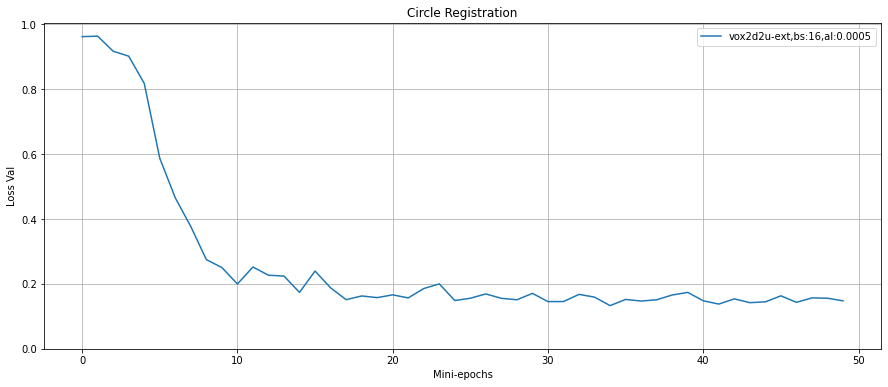

In [14]:
train_datas4 = np.load("griddata/vox2d2u-ext-train-bs32.npy")
names4 = np.load("griddata/vox2d2u-ext-names-bs32.npy")

compare_lines(train_datas4, names4)

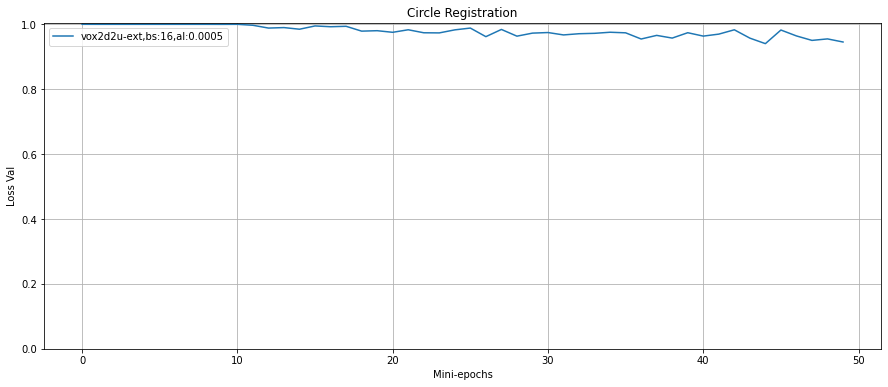

In [15]:
val_datas4 = np.load("griddata/vox2d2u-ext-val-bs32.npy")

compare_lines(val_datas4, names4)

In [2]:
from circle_utils import *
import numpy as np
import torch

In [4]:
nf_enc = [128, 128, 128, 128, 128]
nf_dec = [128, 128, 128, 128, 128]
super_size = 256
vol_size = [128,128]
num_iters = 20480
al = 0.0005
bs = 16

mod_data = torch.load("saved_models/sln2d2u,bs:16,al:0.0005")
mod_data2 = torch.load("saved_models/ae2d2u,bs:16,al:0.0005")

'''
mod = sln_load_model(mod_data, 
                     vol_size=vol_size, 
                     nf_enc=nf_enc, 
                     nf_dec=nf_dec, 
                     super_size=super_size,
                     retrain_flow=True)
'''
                

mod2 = sln_load_model(mod_data2, 
                     vol_size=vol_size, 
                     nf_enc=nf_enc, 
                     nf_dec=nf_dec, 
                     super_size=super_size,
                     retrain_flow=True,
                     mode='ae')


(256, 256, 3, 3)


ValueError: 